In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import datetime as dt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pylab import rcParams
sns.set_style("whitegrid", {'axes.grid' : True})


In [2]:
def get_uniq(df):
    print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
    for i in df.columns.to_list():
        print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df[i].unique()))+'\033[0m')
        print(df[i].unique())
        print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m')


In [3]:
def get_nan(df):
    df_null = pd.concat([df.isna().sum().to_frame(name='count_missig_value'), 
           df.isna().mean().to_frame(name='pct_missig_value')], axis=1)
    df_null['pct_missig_value'] = np.round(df_null['pct_missig_value']*100, 2)
    print(df_null)
    

In [4]:
def get_types(df):
    for t in set(df.dtypes):
        print('\033[34m\033[1m' + "Переменные типа" + '\033[0m', t)
        print(df.select_dtypes(include = [t]).describe(), '\n')
        

In [5]:
# df1 = pd.read_excel('gelen.xlsx', sheet_name='gelen')
# df2 = pd.read_excel('ozer.xlsx', sheet_name='ozer')


In [6]:
df1 = pd.read_excel('https://raw.githubusercontent.com/edwan70/Datasets/main/gelen.xlsx', sheet_name='gelen')
df2 = pd.read_excel('https://raw.githubusercontent.com/edwan70/Datasets/main/ozer.xlsx', sheet_name='ozer')


In [7]:
rename_dic = dict(zip(df1.columns,
['id', 'receiver_id', 'ДатаВремя', 'object_id', 'channel_id',
                        'round_value', 'Значение', 'description', 'unit']))

df1.rename(columns=rename_dic, inplace = True)


In [8]:
df1


id  receiver_id                 ДатаВремя  object_id  \
0       26517633           28   2023-01-20 15:37:39.000   MonObj37   
1       26517654           28   2023-01-20 15:40:03.000   MonObj37   
2       26517663           28   2023-01-20 15:40:54.000   MonObj37   
3       26517670           28   2023-01-20 15:41:46.000   MonObj37   
4       26517678           28   2023-01-20 15:42:31.000   MonObj37   
...          ...          ...                       ...        ...   
164591  26846198           31   2023-02-20 16:03:24.000   MonObj38   
164592  26846204           31   2023-02-20 16:04:12.000   MonObj38   
164593  26846210           31   2023-02-20 16:05:07.000   MonObj38   
164594  26846212           31   2023-02-20 16:05:49.000   MonObj38   
164595  26846216           31   2023-02-20 16:06:44.000   MonObj38   

        channel_id  round_value  Значение               description  unit  
0                7          -41     -41.3   Мощность приёма, Radio1    dB  
1                7          -39     -39.8   Мощность приёма, Radio1    dB  
2                7          -40     -40.7   Мощность приёма, Radio1    dB  
3                7          -41     -41.3   Мощность приёма, Radio1    dB  
4                7          -40     -40.7   Мощность приёма, Radio1    dB  
...            ...          ...       ...                       ...   ...  
164591           8          -51     -51.4   Мощность приёма, Radio2    dB  
164592           8          -42     -42.9   Мощность приёма, Radio2    dB  
164593           8          -40     -40.1   Мощность приёма, Radio2    dB  
164594           8          -44     -44.2   Мощность приёма, Radio2    dB  
164595           8          -41     -41.0   Мощность приёма, Radio2    dB  

[164596 rows x 9 columns]

In [9]:
rename_dic = dict(zip(df2.columns,
['id', 'receiver_id', 'ДатаВремя', 'object_id', 'channel_id',
                        'round_value', 'Значение', 'description', 'unit']))

df2.rename(columns=rename_dic, inplace = True)


In [10]:
df2


id  receiver_id                 ДатаВремя  object_id  channel_id  \
0      26517747           13   2023-01-20 15:53:02.000   MonObj25           7   
1      26517755           13   2023-01-20 15:53:53.000   MonObj25           7   
2      26518502           13   2023-01-20 17:22:23.000   MonObj25           7   
3      26518592           13   2023-01-20 17:31:27.000   MonObj25           7   
4      26518603           13   2023-01-20 17:32:25.000   MonObj25           7   
...         ...          ...                       ...        ...         ...   
45618  26845012           24   2023-02-20 13:16:01.000   MonObj26           8   
45619  26845020           24   2023-02-20 13:16:47.000   MonObj26           8   
45620  26845025           24   2023-02-20 13:17:44.000   MonObj26           8   
45621  26846143           24   2023-02-20 15:54:42.000   MonObj26           8   
45622  26846149           24   2023-02-20 15:55:30.000   MonObj26           8   

       round_value  Значение               description  unit  
0              -44     -44.2   Мощность приёма, Radio1    dB  
1              -44     -44.8   Мощность приёма, Radio1    dB  
2              -44     -44.8   Мощность приёма, Radio1    dB  
3              -44     -44.2   Мощность приёма, Radio1    dB  
4              -44     -44.8   Мощность приёма, Radio1    dB  
...            ...       ...                       ...   ...  
45618          -37     -37.6   Мощность приёма, Radio2    dB  
45619          -38     -38.2   Мощность приёма, Radio2    dB  
45620          -37     -37.6   Мощность приёма, Radio2    dB  
45621          -36     -36.9   Мощность приёма, Radio2    dB  
45622          -37     -37.3   Мощность приёма, Radio2    dB  

[45623 rows x 9 columns]

In [11]:
get_nan(df1)


             count_missig_value  pct_missig_value
id                            0               0.0
receiver_id                   0               0.0
ДатаВремя                     0               0.0
object_id                     0               0.0
channel_id                    0               0.0
round_value                   0               0.0
Значение                      0               0.0
description                   0               0.0
unit                          0               0.0


In [12]:
get_nan(df2)


             count_missig_value  pct_missig_value
id                            0               0.0
receiver_id                   0               0.0
ДатаВремя                     0               0.0
object_id                     0               0.0
channel_id                    0               0.0
round_value                   0               0.0
Значение                      0               0.0
description                   0               0.0
unit                          0               0.0


In [13]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           164596 non-null  int64  
 1   receiver_id  164596 non-null  int64  
 2   ДатаВремя    164596 non-null  object 
 3   object_id    164596 non-null  object 
 4   channel_id   164596 non-null  int64  
 5   round_value  164596 non-null  int64  
 6   Значение     164596 non-null  float64
 7   description  164596 non-null  object 
 8   unit         164596 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 11.3+ MB


In [14]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45623 entries, 0 to 45622
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           45623 non-null  int64  
 1   receiver_id  45623 non-null  int64  
 2   ДатаВремя    45623 non-null  object 
 3   object_id    45623 non-null  object 
 4   channel_id   45623 non-null  int64  
 5   round_value  45623 non-null  int64  
 6   Значение     45623 non-null  float64
 7   description  45623 non-null  object 
 8   unit         45623 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 3.1+ MB


In [15]:
get_types(df1)


Переменные типа float64
            Значение
count  164596.000000
mean      -43.403142
std         2.786982
min       -63.600000
25%       -45.100000
50%       -43.200000
75%       -41.300000
max       -35.400000 

Переменные типа int64
                 id    receiver_id     channel_id    round_value
count  1.645960e+05  164596.000000  164596.000000  164596.000000
mean   2.668973e+07      29.499174       7.502855     -42.972302
std    9.428938e+04       1.116259       0.499993       2.782578
min    2.651762e+07      28.000000       7.000000     -63.000000
25%    2.661095e+07      29.000000       7.000000     -45.000000
50%    2.669373e+07      29.000000       8.000000     -43.000000
75%    2.677311e+07      30.000000       8.000000     -41.000000
max    2.684622e+07      31.000000       8.000000     -35.000000 

Переменные типа object
                       ДатаВремя  object_id               description    unit
count                     164596     164596                    164596  1645

In [16]:
get_types(df2)


Переменные типа float64
           Значение
count  45623.000000
mean     -39.037650
std        3.395815
min      -64.900000
25%      -40.100000
50%      -39.100000
75%      -36.900000
max      -33.200000 

Переменные типа int64
                 id   receiver_id    channel_id   round_value
count  4.562300e+04  45623.000000  45623.000000  45623.000000
mean   2.666220e+07     17.851873      9.749337    -38.622515
std    8.673150e+04      3.073683      1.555495      3.412422
min    2.651762e+07     13.000000      7.000000    -64.000000
25%    2.658568e+07     16.000000      8.000000    -40.000000
50%    2.666246e+07     18.000000     10.000000    -39.000000
75%    2.672131e+07     19.000000     11.000000    -36.000000
max    2.684623e+07     24.000000     12.000000    -33.000000 

Переменные типа object
                       ДатаВремя  object_id               description   unit
count                      45623      45623                     45623  45623
unique                     36724   

In [17]:
df1.duplicated().sum()


0

In [18]:
df2.duplicated().sum()


0

In [19]:
df1.reset_index(inplace = True)
df1.drop(columns=['index'], inplace = True)
df1


id  receiver_id                 ДатаВремя  object_id  \
0       26517633           28   2023-01-20 15:37:39.000   MonObj37   
1       26517654           28   2023-01-20 15:40:03.000   MonObj37   
2       26517663           28   2023-01-20 15:40:54.000   MonObj37   
3       26517670           28   2023-01-20 15:41:46.000   MonObj37   
4       26517678           28   2023-01-20 15:42:31.000   MonObj37   
...          ...          ...                       ...        ...   
164591  26846198           31   2023-02-20 16:03:24.000   MonObj38   
164592  26846204           31   2023-02-20 16:04:12.000   MonObj38   
164593  26846210           31   2023-02-20 16:05:07.000   MonObj38   
164594  26846212           31   2023-02-20 16:05:49.000   MonObj38   
164595  26846216           31   2023-02-20 16:06:44.000   MonObj38   

        channel_id  round_value  Значение               description  unit  
0                7          -41     -41.3   Мощность приёма, Radio1    dB  
1                7          -39     -39.8   Мощность приёма, Radio1    dB  
2                7          -40     -40.7   Мощность приёма, Radio1    dB  
3                7          -41     -41.3   Мощность приёма, Radio1    dB  
4                7          -40     -40.7   Мощность приёма, Radio1    dB  
...            ...          ...       ...                       ...   ...  
164591           8          -51     -51.4   Мощность приёма, Radio2    dB  
164592           8          -42     -42.9   Мощность приёма, Radio2    dB  
164593           8          -40     -40.1   Мощность приёма, Radio2    dB  
164594           8          -44     -44.2   Мощность приёма, Radio2    dB  
164595           8          -41     -41.0   Мощность приёма, Radio2    dB  

[164596 rows x 9 columns]

In [20]:
df2.reset_index(inplace = True)
df2.drop(columns=['index'], inplace = True)
df2


id  receiver_id                 ДатаВремя  object_id  channel_id  \
0      26517747           13   2023-01-20 15:53:02.000   MonObj25           7   
1      26517755           13   2023-01-20 15:53:53.000   MonObj25           7   
2      26518502           13   2023-01-20 17:22:23.000   MonObj25           7   
3      26518592           13   2023-01-20 17:31:27.000   MonObj25           7   
4      26518603           13   2023-01-20 17:32:25.000   MonObj25           7   
...         ...          ...                       ...        ...         ...   
45618  26845012           24   2023-02-20 13:16:01.000   MonObj26           8   
45619  26845020           24   2023-02-20 13:16:47.000   MonObj26           8   
45620  26845025           24   2023-02-20 13:17:44.000   MonObj26           8   
45621  26846143           24   2023-02-20 15:54:42.000   MonObj26           8   
45622  26846149           24   2023-02-20 15:55:30.000   MonObj26           8   

       round_value  Значение               description  unit  
0              -44     -44.2   Мощность приёма, Radio1    dB  
1              -44     -44.8   Мощность приёма, Radio1    dB  
2              -44     -44.8   Мощность приёма, Radio1    dB  
3              -44     -44.2   Мощность приёма, Radio1    dB  
4              -44     -44.8   Мощность приёма, Radio1    dB  
...            ...       ...                       ...   ...  
45618          -37     -37.6   Мощность приёма, Radio2    dB  
45619          -38     -38.2   Мощность приёма, Radio2    dB  
45620          -37     -37.6   Мощность приёма, Radio2    dB  
45621          -36     -36.9   Мощность приёма, Radio2    dB  
45622          -37     -37.3   Мощность приёма, Radio2    dB  

[45623 rows x 9 columns]

In [21]:
df1["ДатаВремя"] = pd.to_datetime(df1["ДатаВремя"])
df1['Дата'] = df1['ДатаВремя'].dt.strftime('%Y-%m')
df1["ДатаВремя"].describe()


count                  164596
unique                 104923
top       2023-02-05 17:30:15
freq                        4
first     2023-01-20 15:35:54
last      2023-02-20 16:06:47
Name: ДатаВремя, dtype: object

In [22]:
df2["ДатаВремя"] = pd.to_datetime(df2["ДатаВремя"])
df2['Дата'] = df2['ДатаВремя'].dt.strftime('%Y-%m')
df2["ДатаВремя"].describe()


count                   45623
unique                  36724
top       2023-02-01 05:58:57
freq                        4
first     2023-01-20 15:36:26
last      2023-02-20 16:08:43
Name: ДатаВремя, dtype: object

In [23]:
df1


id  receiver_id           ДатаВремя  object_id  channel_id  \
0       26517633           28 2023-01-20 15:37:39   MonObj37           7   
1       26517654           28 2023-01-20 15:40:03   MonObj37           7   
2       26517663           28 2023-01-20 15:40:54   MonObj37           7   
3       26517670           28 2023-01-20 15:41:46   MonObj37           7   
4       26517678           28 2023-01-20 15:42:31   MonObj37           7   
...          ...          ...                 ...        ...         ...   
164591  26846198           31 2023-02-20 16:03:24   MonObj38           8   
164592  26846204           31 2023-02-20 16:04:12   MonObj38           8   
164593  26846210           31 2023-02-20 16:05:07   MonObj38           8   
164594  26846212           31 2023-02-20 16:05:49   MonObj38           8   
164595  26846216           31 2023-02-20 16:06:44   MonObj38           8   

        round_value  Значение               description  unit     Дата  
0               -41     -41.3   Мощность приёма, Radio1    dB  2023-01  
1               -39     -39.8   Мощность приёма, Radio1    dB  2023-01  
2               -40     -40.7   Мощность приёма, Radio1    dB  2023-01  
3               -41     -41.3   Мощность приёма, Radio1    dB  2023-01  
4               -40     -40.7   Мощность приёма, Radio1    dB  2023-01  
...             ...       ...                       ...   ...      ...  
164591          -51     -51.4   Мощность приёма, Radio2    dB  2023-02  
164592          -42     -42.9   Мощность приёма, Radio2    dB  2023-02  
164593          -40     -40.1   Мощность приёма, Radio2    dB  2023-02  
164594          -44     -44.2   Мощность приёма, Radio2    dB  2023-02  
164595          -41     -41.0   Мощность приёма, Radio2    dB  2023-02  

[164596 rows x 10 columns]

In [24]:
df2


id  receiver_id           ДатаВремя  object_id  channel_id  \
0      26517747           13 2023-01-20 15:53:02   MonObj25           7   
1      26517755           13 2023-01-20 15:53:53   MonObj25           7   
2      26518502           13 2023-01-20 17:22:23   MonObj25           7   
3      26518592           13 2023-01-20 17:31:27   MonObj25           7   
4      26518603           13 2023-01-20 17:32:25   MonObj25           7   
...         ...          ...                 ...        ...         ...   
45618  26845012           24 2023-02-20 13:16:01   MonObj26           8   
45619  26845020           24 2023-02-20 13:16:47   MonObj26           8   
45620  26845025           24 2023-02-20 13:17:44   MonObj26           8   
45621  26846143           24 2023-02-20 15:54:42   MonObj26           8   
45622  26846149           24 2023-02-20 15:55:30   MonObj26           8   

       round_value  Значение               description  unit     Дата  
0              -44     -44.2   Мощность приёма, Radio1    dB  2023-01  
1              -44     -44.8   Мощность приёма, Radio1    dB  2023-01  
2              -44     -44.8   Мощность приёма, Radio1    dB  2023-01  
3              -44     -44.2   Мощность приёма, Radio1    dB  2023-01  
4              -44     -44.8   Мощность приёма, Radio1    dB  2023-01  
...            ...       ...                       ...   ...      ...  
45618          -37     -37.6   Мощность приёма, Radio2    dB  2023-02  
45619          -38     -38.2   Мощность приёма, Radio2    dB  2023-02  
45620          -37     -37.6   Мощность приёма, Radio2    dB  2023-02  
45621          -36     -36.9   Мощность приёма, Radio2    dB  2023-02  
45622          -37     -37.3   Мощность приёма, Radio2    dB  2023-02  

[45623 rows x 10 columns]

In [25]:
df1['Значение'].describe()


count    164596.000000
mean        -43.403142
std           2.786982
min         -63.600000
25%         -45.100000
50%         -43.200000
75%         -41.300000
max         -35.400000
Name: Значение, dtype: float64

In [26]:
df2['Значение'].describe()


count    45623.000000
mean       -39.037650
std          3.395815
min        -64.900000
25%        -40.100000
50%        -39.100000
75%        -36.900000
max        -33.200000
Name: Значение, dtype: float64

In [27]:
get_uniq(df1)


Уникальные значения

Признак id имеет 164596 следующих уникальных значений:
[26517633 26517654 26517663 ... 26846210 26846212 26846216]
---------------------------------------------------------------------------------
Признак receiver_id имеет 4 следующих уникальных значений:
[28 29 30 31]
---------------------------------------------------------------------------------
Признак ДатаВремя имеет 104923 следующих уникальных значений:
['2023-01-20T15:37:39.000000000' '2023-01-20T15:40:03.000000000'
 '2023-01-20T15:40:54.000000000' ... '2023-02-20T15:59:47.000000000'
 '2023-02-20T16:02:29.000000000' '2023-02-20T16:03:24.000000000']
---------------------------------------------------------------------------------
Признак object_id имеет 2 следующих уникальных значений:
[' MonObj37' ' MonObj38']
---------------------------------------------------------------------------------
Признак channel_id имеет 2 следующих уникальных значений:
[7 8]
------------------------------------------------------

In [28]:
get_uniq(df2) 


Уникальные значения

Признак id имеет 45623 следующих уникальных значений:
[26517747 26517755 26518502 ... 26845025 26846143 26846149]
---------------------------------------------------------------------------------
Признак receiver_id имеет 12 следующих уникальных значений:
[13 14 15 16 17 18 19 20 21 22 23 24]
---------------------------------------------------------------------------------
Признак ДатаВремя имеет 36724 следующих уникальных значений:
['2023-01-20T15:53:02.000000000' '2023-01-20T15:53:53.000000000'
 '2023-01-20T17:22:23.000000000' ... '2023-02-20T13:17:44.000000000'
 '2023-02-20T15:54:42.000000000' '2023-02-20T15:55:30.000000000']
---------------------------------------------------------------------------------
Признак object_id имеет 4 следующих уникальных значений:
[' MonObj25' ' MonObj28' ' MonObj27' ' MonObj26']
---------------------------------------------------------------------------------
Признак channel_id имеет 6 следующих уникальных значений:
[ 7  8  9 10 

In [29]:
def get_agg(df):
    pd.set_option("display.precision", 1)
    np.set_printoptions(precision=1)
    print(df[['Значение', 'Интервал в секундах']].agg([np.mean, np.median, np.min, np.max]))
    

### РРЛ Центр - Геленджик

In [30]:
df_cen_gelen1 = df1[(df1['object_id'] == ' MonObj37') &
                    (df1['receiver_id'] == 28) & 
                    (df1['channel_id'] == 7)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_cen_gelen1 = df_cen_gelen1.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_cen_gelen1['Интервал']=0 # создаем непустой столбец для расчета
df_cen_gelen1['Интервал в секундах']=0
for i in range (1, len(df_cen_gelen1)): # находим интервал между измерениями
    df_cen_gelen1['Интервал'][i] = (df_cen_gelen1['ДатаВремя'][i]-df_cen_gelen1['ДатаВремя'][i-1])
    df_cen_gelen1['Интервал в секундах'][i] = (df_cen_gelen1['ДатаВремя'][i]-df_cen_gelen1['ДатаВремя'][i-1]) \
    .total_seconds()
df_cen_gelen1['Интервал в секундах']=df_cen_gelen1['Интервал в секундах'].astype(int)
df_cen_gelen1 = df_cen_gelen1.sort_values(['Интервал в секундах'],ascending=False).reset_index().drop(columns=['index'])
df_cen_gelen1


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0               28 2023-01-27 06:26:36   MonObj37           7     -39.8   
1               28 2023-01-27 05:21:08   MonObj37           7     -40.4   
2               28 2023-01-26 22:59:50   MonObj37           7     -41.0   
3               28 2023-01-27 04:42:24   MonObj37           7     -41.0   
4               28 2023-01-25 09:19:14   MonObj37           7     -40.7   
...            ...                 ...        ...         ...       ...   
40897           28 2023-01-24 07:33:03   MonObj37           7     -47.3   
40898           28 2023-02-05 07:32:12   MonObj37           7     -41.6   
40899           28 2023-01-28 07:35:52   MonObj37           7     -39.5   
40900           28 2023-02-09 07:39:06   MonObj37           7     -44.5   
40901           28 2023-01-20 15:37:39   MonObj37           7     -41.3   

                    description  unit         Интервал  Интервал в секундах  
0       Мощность приёма, Radio1    dB  0 days 00:34:05                 2045  
1       Мощность приёма, Radio1    dB  0 days 00:31:11                 1871  
2       Мощность приёма, Radio1    dB  0 days 00:15:32                  932  
3       Мощность приёма, Radio1    dB  0 days 00:15:15                  915  
4       Мощность приёма, Radio1    dB  0 days 00:15:04                  904  
...                         ...   ...              ...                  ...  
40897   Мощность приёма, Radio1    dB  0 days 00:00:36                   36  
40898   Мощность приёма, Radio1    dB  0 days 00:00:29                   29  
40899   Мощность приёма, Radio1    dB  0 days 00:00:22                   22  
40900   Мощность приёма, Radio1    dB  0 days 00:00:20                   20  
40901   Мощность приёма, Radio1    dB                0                    0  

[40902 rows x 9 columns]

In [31]:
get_agg(df_cen_gelen1)


        Значение  Интервал в секундах
mean       -43.6                 65.5
median     -43.2                 53.0
amin       -61.4                  0.0
amax       -37.6               2045.0


In [32]:
df_cen_gelen1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40902 entries, 0 to 40901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   receiver_id          40902 non-null  int64         
 1   ДатаВремя            40902 non-null  datetime64[ns]
 2   object_id            40902 non-null  object        
 3   channel_id           40902 non-null  int64         
 4   Значение             40902 non-null  float64       
 5   description          40902 non-null  object        
 6   unit                 40902 non-null  object        
 7   Интервал             40902 non-null  object        
 8   Интервал в секундах  40902 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(4)
memory usage: 2.7+ MB


In [33]:
df_cen_gelen1.to_csv('cen_gelen1.csv', index=False) # Центр - Геленджик 1


In [34]:
df_cen_gelen2 = df1[(df1['object_id'] == ' MonObj37') &
                    (df1['receiver_id'] == 29) & 
                    (df1['channel_id'] == 8)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_cen_gelen2 = df_cen_gelen2.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_cen_gelen2['Интервал']=0 # создаем непустой столбец для расчета
df_cen_gelen2['Интервал в секундах']=0
for i in range (1, len(df_cen_gelen2)): # находим интервал между измерениями
    df_cen_gelen2['Интервал'][i] = (df_cen_gelen2['ДатаВремя'][i]-df_cen_gelen2['ДатаВремя'][i-1])
    df_cen_gelen2['Интервал в секундах'][i] = (df_cen_gelen2['ДатаВремя'][i]-df_cen_gelen2['ДатаВремя'][i-1]) \
    .total_seconds()
df_cen_gelen2['Интервал в секундах']=df_cen_gelen2['Интервал в секундах'].astype(int)
df_cen_gelen2 = df_cen_gelen2.sort_values(['Интервал в секундах'],ascending=False).reset_index().drop(columns=['index'])
df_cen_gelen2


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0               29 2023-01-27 00:23:58   MonObj37           8     -40.1   
1               29 2023-01-24 22:06:45   MonObj37           8     -40.4   
2               29 2023-01-27 04:30:32   MonObj37           8     -40.7   
3               29 2023-01-27 08:04:43   MonObj37           8     -41.6   
4               29 2023-01-27 05:54:27   MonObj37           8     -40.1   
...            ...                 ...        ...         ...       ...   
41694           29 2023-02-03 17:51:16   MonObj37           8     -44.5   
41695           29 2023-02-05 07:32:34   MonObj37           8     -45.4   
41696           29 2023-02-06 07:21:32   MonObj37           8     -43.8   
41697           29 2023-02-09 07:39:06   MonObj37           8     -43.5   
41698           29 2023-01-20 15:40:03   MonObj37           8     -39.8   

                    description  unit         Интервал  Интервал в секундах  
0       Мощность приёма, Radio2    dB  0 days 00:22:30                 1350  
1       Мощность приёма, Radio2    dB  0 days 00:20:50                 1250  
2       Мощность приёма, Radio2    dB  0 days 00:18:47                 1127  
3       Мощность приёма, Radio2    dB  0 days 00:17:55                 1075  
4       Мощность приёма, Radio2    dB  0 days 00:13:46                  826  
...                         ...   ...              ...                  ...  
41694   Мощность приёма, Radio2    dB  0 days 00:00:26                   26  
41695   Мощность приёма, Radio2    dB  0 days 00:00:22                   22  
41696   Мощность приёма, Radio2    dB  0 days 00:00:21                   21  
41697   Мощность приёма, Radio2    dB  0 days 00:00:20                   20  
41698   Мощность приёма, Radio2    dB                0                    0  

[41699 rows x 9 columns]

In [35]:
get_agg(df_cen_gelen2)


        Значение  Интервал в секундах
mean       -45.2                 64.3
median     -44.8                 53.0
amin       -63.6                  0.0
amax       -38.5               1350.0


In [36]:
df_cen_gelen2.to_csv('cen_gelen2.csv', index=False) # Центр - Геленджик 2


In [37]:
df_gelen_cen1 = df1[(df1['object_id'] == ' MonObj38') &
                    (df1['receiver_id'] == 30) & 
                    (df1['channel_id'] == 7)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_gelen_cen1 = df_gelen_cen1.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_gelen_cen1['Интервал']=0 # создаем непустой столбец для расчета
df_gelen_cen1['Интервал в секундах']=0
for i in range (1, len(df_gelen_cen1)): # находим интервал между измерениями
    df_gelen_cen1['Интервал'][i] = (df_gelen_cen1['ДатаВремя'][i]-df_gelen_cen1['ДатаВремя'][i-1])
    df_gelen_cen1['Интервал в секундах'][i] = (df_gelen_cen1['ДатаВремя'][i]-df_gelen_cen1['ДатаВремя'][i-1]) \
    .total_seconds()
df_gelen_cen1['Интервал в секундах']=df_gelen_cen1['Интервал в секундах'].astype(int)
df_gelen_cen1 = df_gelen_cen1.sort_values(['Интервал в секундах'],ascending=False).reset_index().drop(columns=['index'])
df_gelen_cen1


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0               30 2023-02-12 00:03:40   MonObj38           7     -40.4   
1               30 2023-02-01 12:55:31   MonObj38           7     -39.5   
2               30 2023-01-26 19:00:11   MonObj38           7     -39.5   
3               30 2023-01-27 11:10:48   MonObj38           7     -41.3   
4               30 2023-01-27 02:28:24   MonObj38           7     -39.1   
...            ...                 ...        ...         ...       ...   
40921           30 2023-01-29 07:08:14   MonObj38           7     -40.1   
40922           30 2023-02-05 07:32:35   MonObj38           7     -40.7   
40923           30 2023-02-02 07:15:10   MonObj38           7     -38.5   
40924           30 2023-02-18 07:56:02   MonObj38           7     -43.2   
40925           30 2023-01-20 15:36:40   MonObj38           7     -48.9   

                    description  unit         Интервал  Интервал в секундах  
0       Мощность приёма, Radio1    dB  0 days 00:17:04                 1024  
1       Мощность приёма, Radio1    dB  0 days 00:13:56                  836  
2       Мощность приёма, Radio1    dB  0 days 00:12:00                  720  
3       Мощность приёма, Radio1    dB  0 days 00:11:32                  692  
4       Мощность приёма, Radio1    dB  0 days 00:11:19                  679  
...                         ...   ...              ...                  ...  
40921   Мощность приёма, Radio1    dB  0 days 00:00:32                   32  
40922   Мощность приёма, Radio1    dB  0 days 00:00:22                   22  
40923   Мощность приёма, Radio1    dB  0 days 00:00:21                   21  
40924   Мощность приёма, Radio1    dB  0 days 00:00:20                   20  
40925   Мощность приёма, Radio1    dB                0                    0  

[40926 rows x 9 columns]

In [38]:
get_agg(df_gelen_cen1)


        Значение  Интервал в секундах
mean       -42.5                 65.5
median     -42.0                 53.0
amin       -62.4                  0.0
amax       -36.6               1024.0


In [39]:
df_gelen_cen1.to_csv('gelen_cen1.csv', index=False) # Геленджик - Центр 1


In [40]:
df_gelen_cen2 = df1[(df1['object_id'] == ' MonObj38') &
                    (df1['receiver_id'] == 31) & 
                    (df1['channel_id'] == 8)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_gelen_cen2 = df_gelen_cen2.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_gelen_cen2['Интервал']=0 # создаем непустой столбец для расчета
df_gelen_cen2['Интервал в секундах']=0
for i in range (1, len(df_gelen_cen2)): # находим интервал между измерениями
    df_gelen_cen2['Интервал'][i] = (df_gelen_cen2['ДатаВремя'][i]-df_gelen_cen2['ДатаВремя'][i-1])
    df_gelen_cen2['Интервал в секундах'][i] = (df_gelen_cen2['ДатаВремя'][i]-df_gelen_cen2['ДатаВремя'][i-1]) \
    .total_seconds()
df_gelen_cen2['Интервал в секундах']=df_gelen_cen2['Интервал в секундах'].astype(int)
df_gelen_cen2 = df_gelen_cen2.sort_values(['Интервал в секундах'],ascending=False).reset_index().drop(columns=['index'])
df_gelen_cen2


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0               31 2023-01-26 10:29:36   MonObj38           8     -38.5   
1               31 2023-01-26 14:27:37   MonObj38           8     -39.5   
2               31 2023-01-27 05:04:58   MonObj38           8     -39.1   
3               31 2023-01-27 04:44:35   MonObj38           8     -38.8   
4               31 2023-01-27 07:27:05   MonObj38           8     -38.2   
...            ...                 ...        ...         ...       ...   
41064           31 2023-02-13 07:32:24   MonObj38           8     -43.5   
41065           31 2023-02-09 07:39:07   MonObj38           8     -42.0   
41066           31 2023-02-02 07:15:10   MonObj38           8     -51.1   
41067           31 2023-02-18 07:56:02   MonObj38           8     -42.0   
41068           31 2023-01-20 15:35:54   MonObj38           8     -38.2   

                    description  unit         Интервал  Интервал в секундах  
0       Мощность приёма, Radio2    dB  0 days 00:25:16                 1516  
1       Мощность приёма, Radio2    dB  0 days 00:24:19                 1459  
2       Мощность приёма, Radio2    dB  0 days 00:20:23                 1223  
3       Мощность приёма, Radio2    dB  0 days 00:20:17                 1217  
4       Мощность приёма, Radio2    dB  0 days 00:20:09                 1209  
...                         ...   ...              ...                  ...  
41064   Мощность приёма, Radio2    dB  0 days 00:00:36                   36  
41065   Мощность приёма, Radio2    dB  0 days 00:00:35                   35  
41066   Мощность приёма, Radio2    dB  0 days 00:00:21                   21  
41067   Мощность приёма, Radio2    dB  0 days 00:00:20                   20  
41068   Мощность приёма, Radio2    dB                0                    0  

[41069 rows x 9 columns]

In [41]:
get_agg(df_gelen_cen2)


        Значение  Интервал в секундах
mean       -42.3                 65.3
median     -42.0                 53.0
amin       -60.8                  0.0
amax       -35.4               1516.0


In [42]:
df_gelen_cen2.to_csv('gelen_cen2.csv', index=False) # Геленджик - Центр 2


In [43]:
spisok_df=[df_cen_gelen1, df_cen_gelen2, df_gelen_cen1, df_gelen_cen2]
spisok_title=['РРЛ Центр-Геленджик 1', 'РРЛ Центр-Геленджик 2', 'РРЛ Геленджик-Центр 1', 'РРЛ Геленджик-Центр 2']
colors=['y','gold','indianred','coral']


In [44]:
def get_plot():
    plt.figure(figsize=(14, 5))
    sns.lineplot(data = spisok_df[i], x = "ДатаВремя", y = "Значение", legend = 'auto', color = colors[i])\
                                                                         .set(title=spisok_title[i]);
plt.show()


In [45]:
def get_plot_int():
    plt.figure(figsize=(14, 5))
    sns.lineplot(data = spisok_df[i], x = "ДатаВремя", y = "Интервал в секундах", legend = 'auto', color = colors[i])\
                                                                         .set(title=spisok_title[i]);
plt.show()


### Уровни сигнала РРЛ Геленджик.

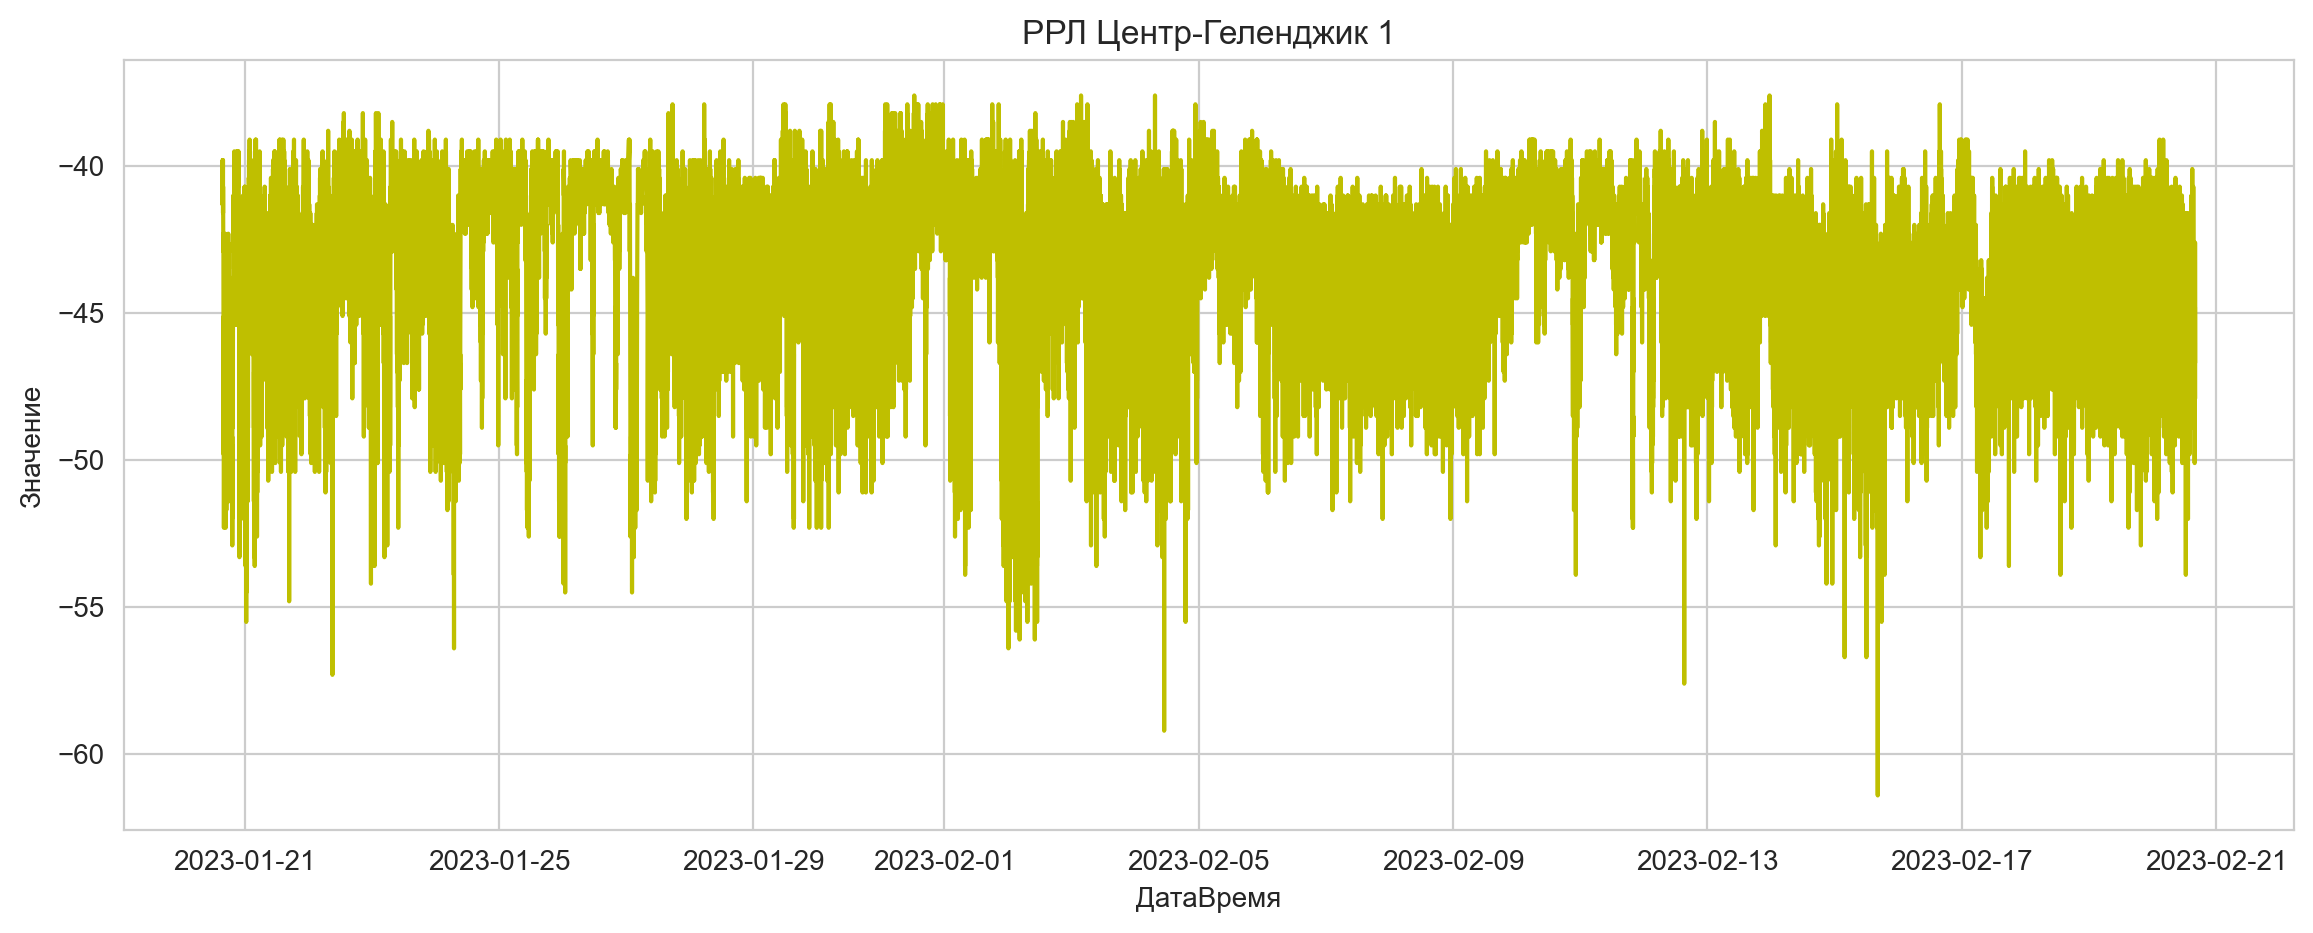

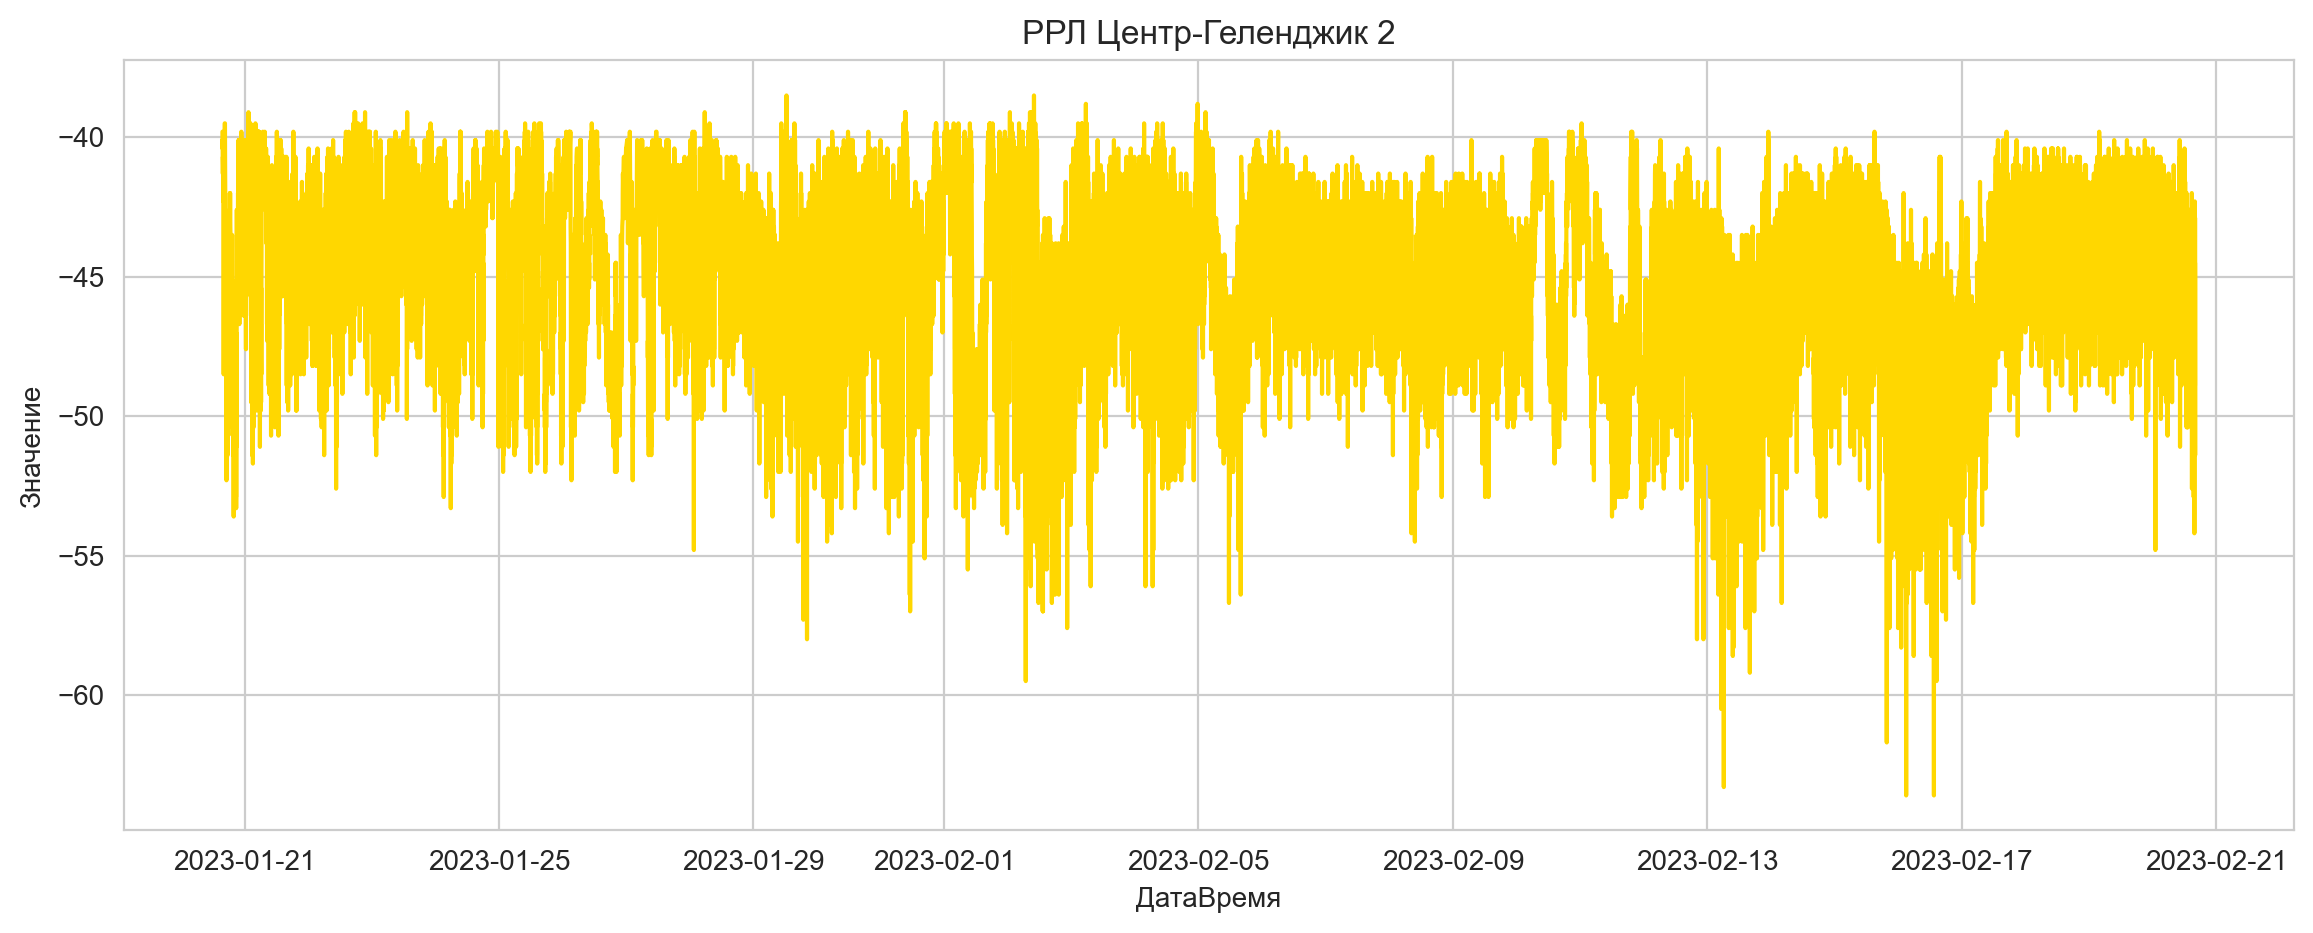

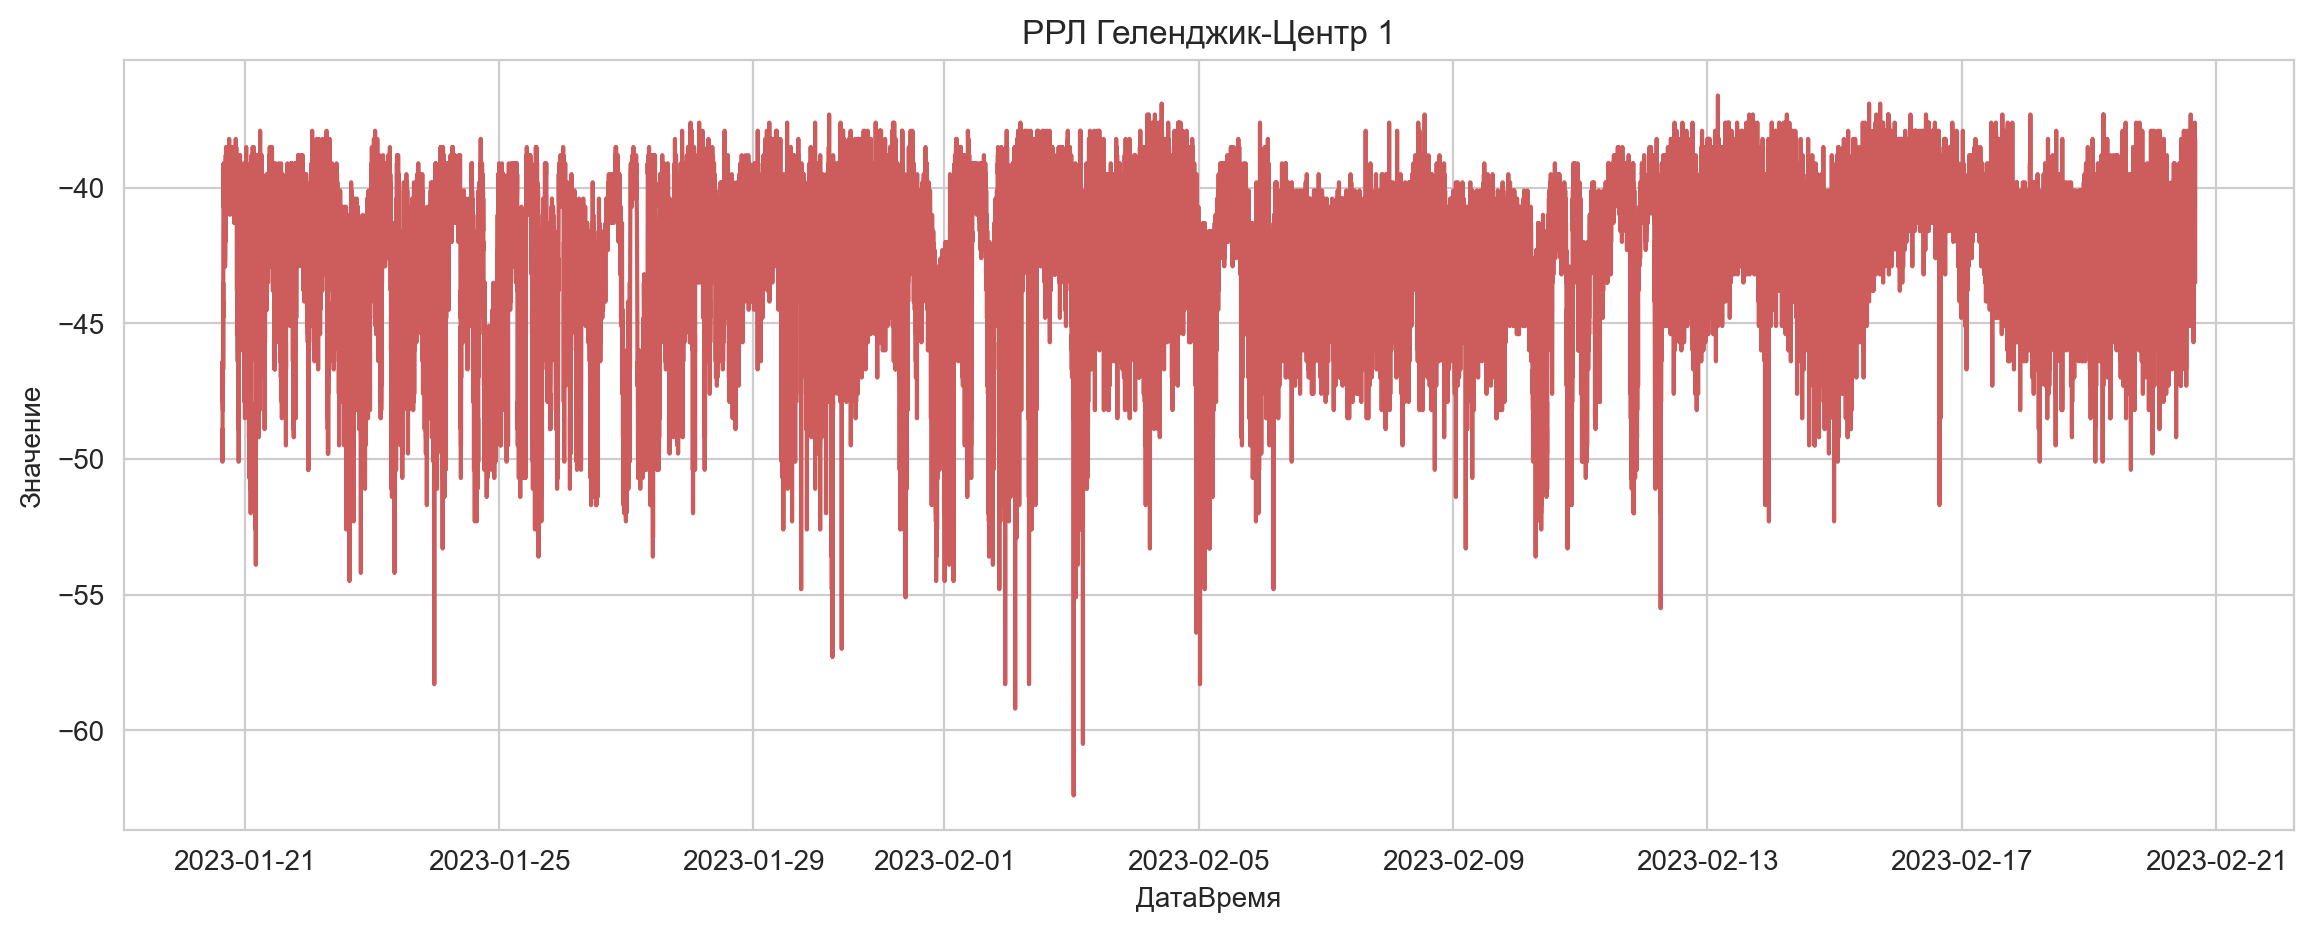

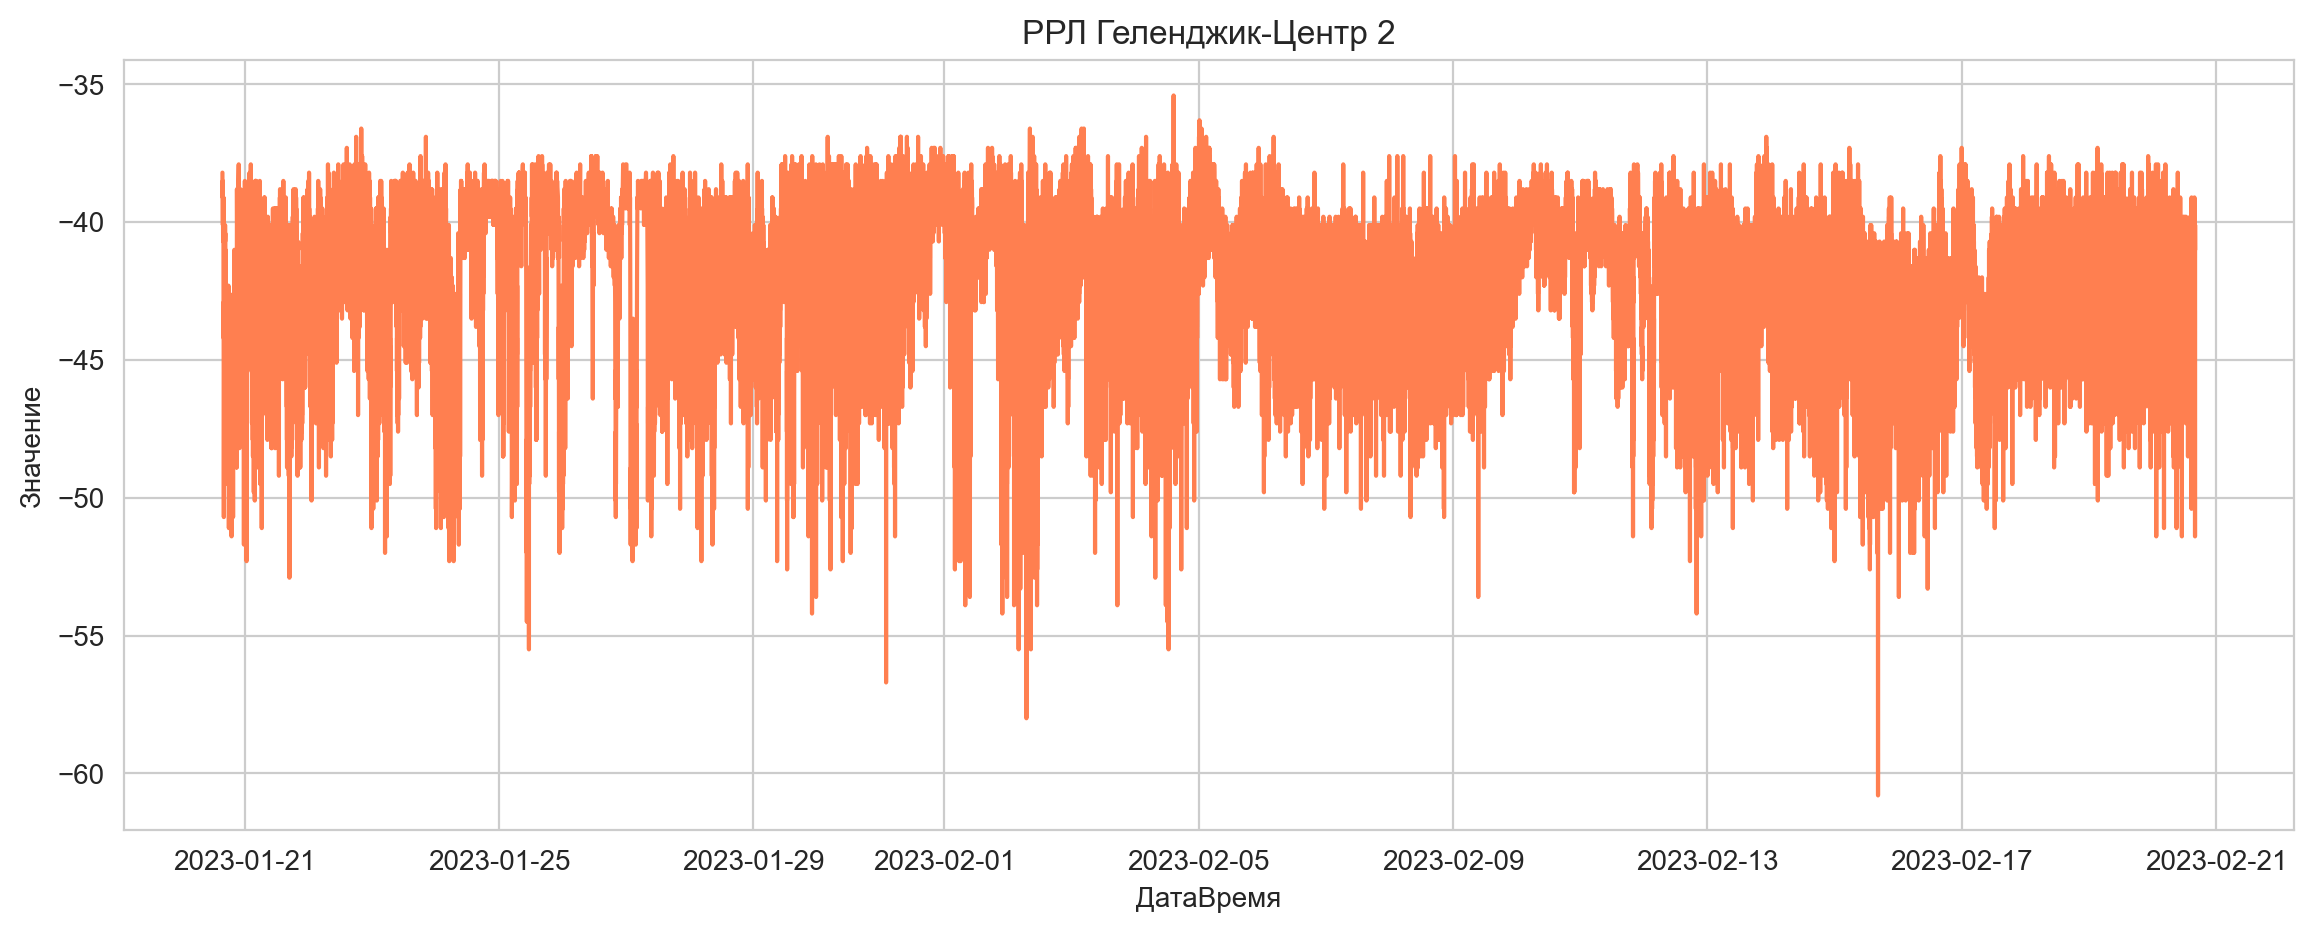

In [46]:
for i in range (0, len(spisok_df)):
    get_plot()
    

### Интервалы между записями в БД сигнала РРЛ.

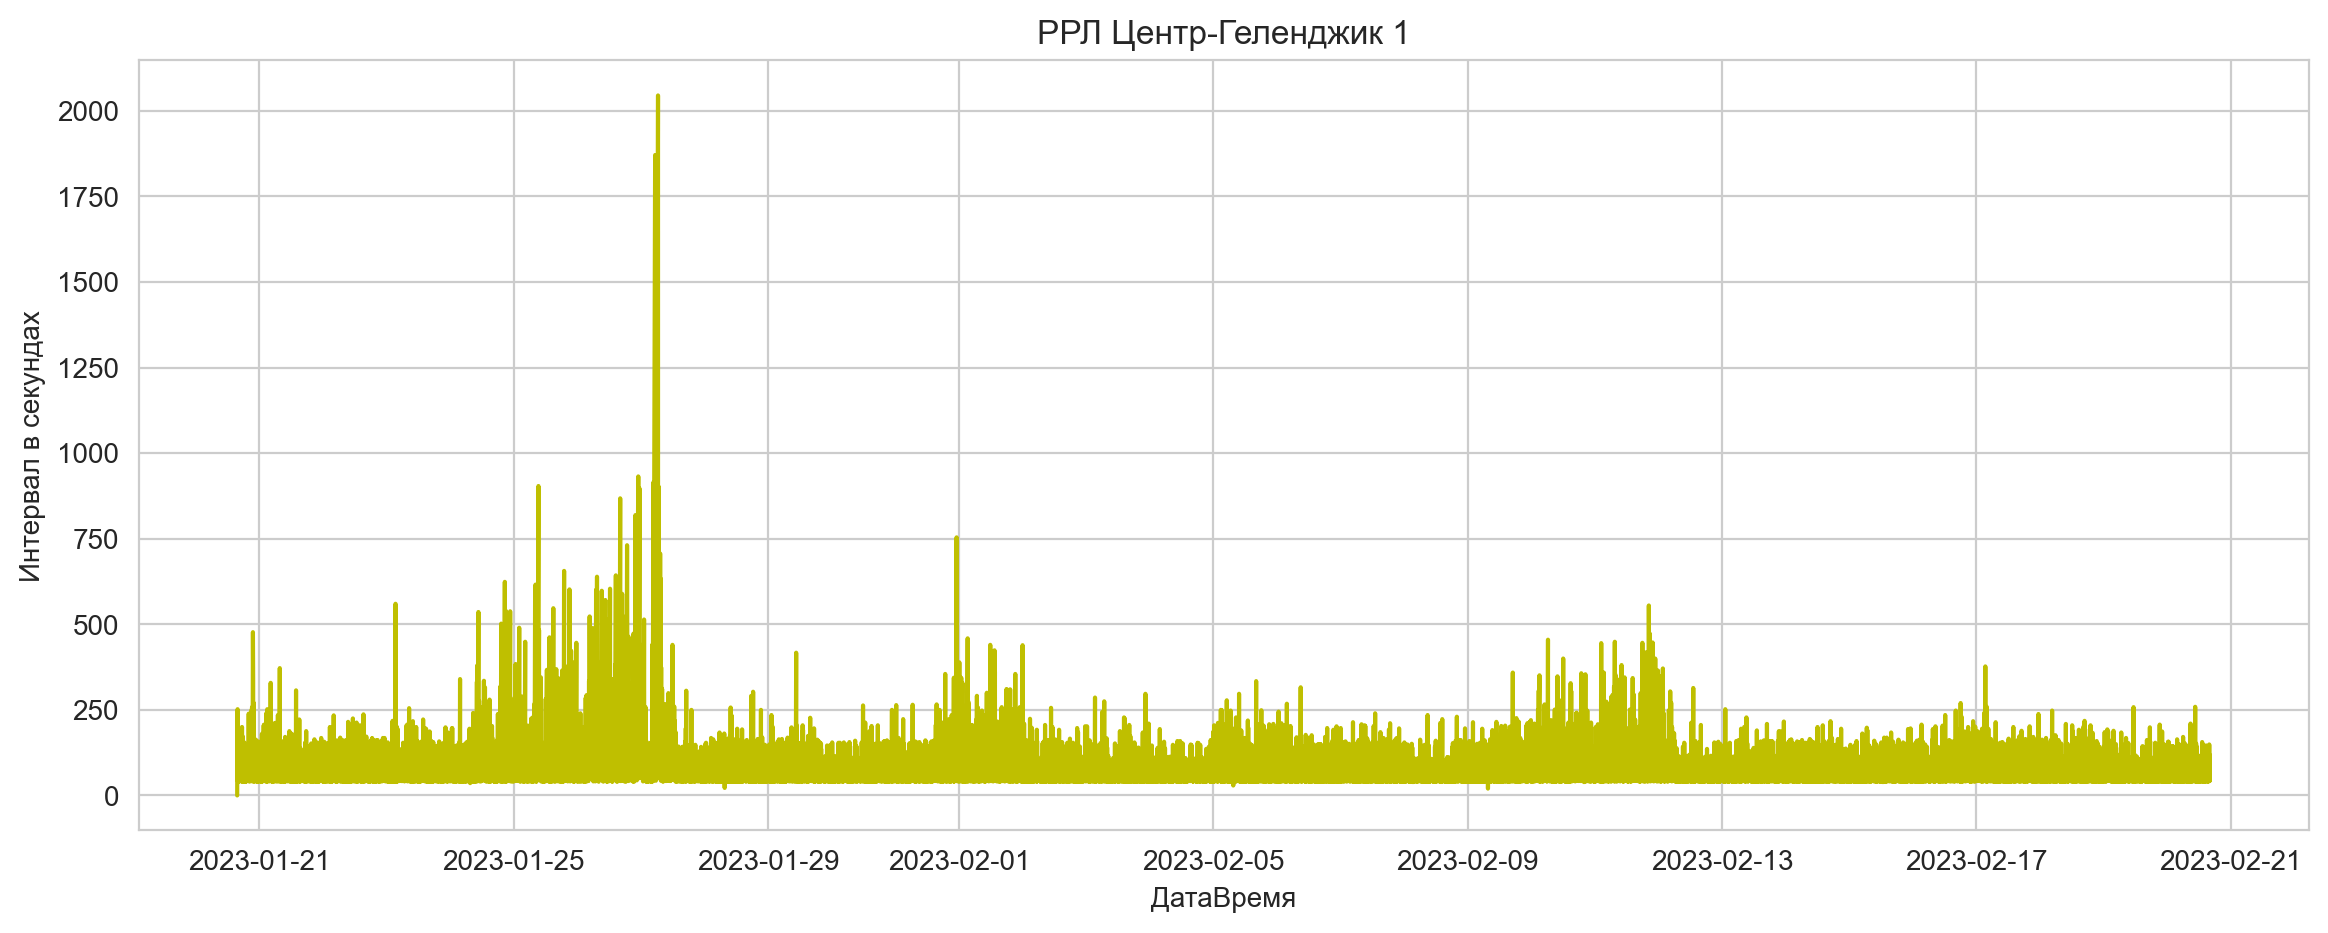

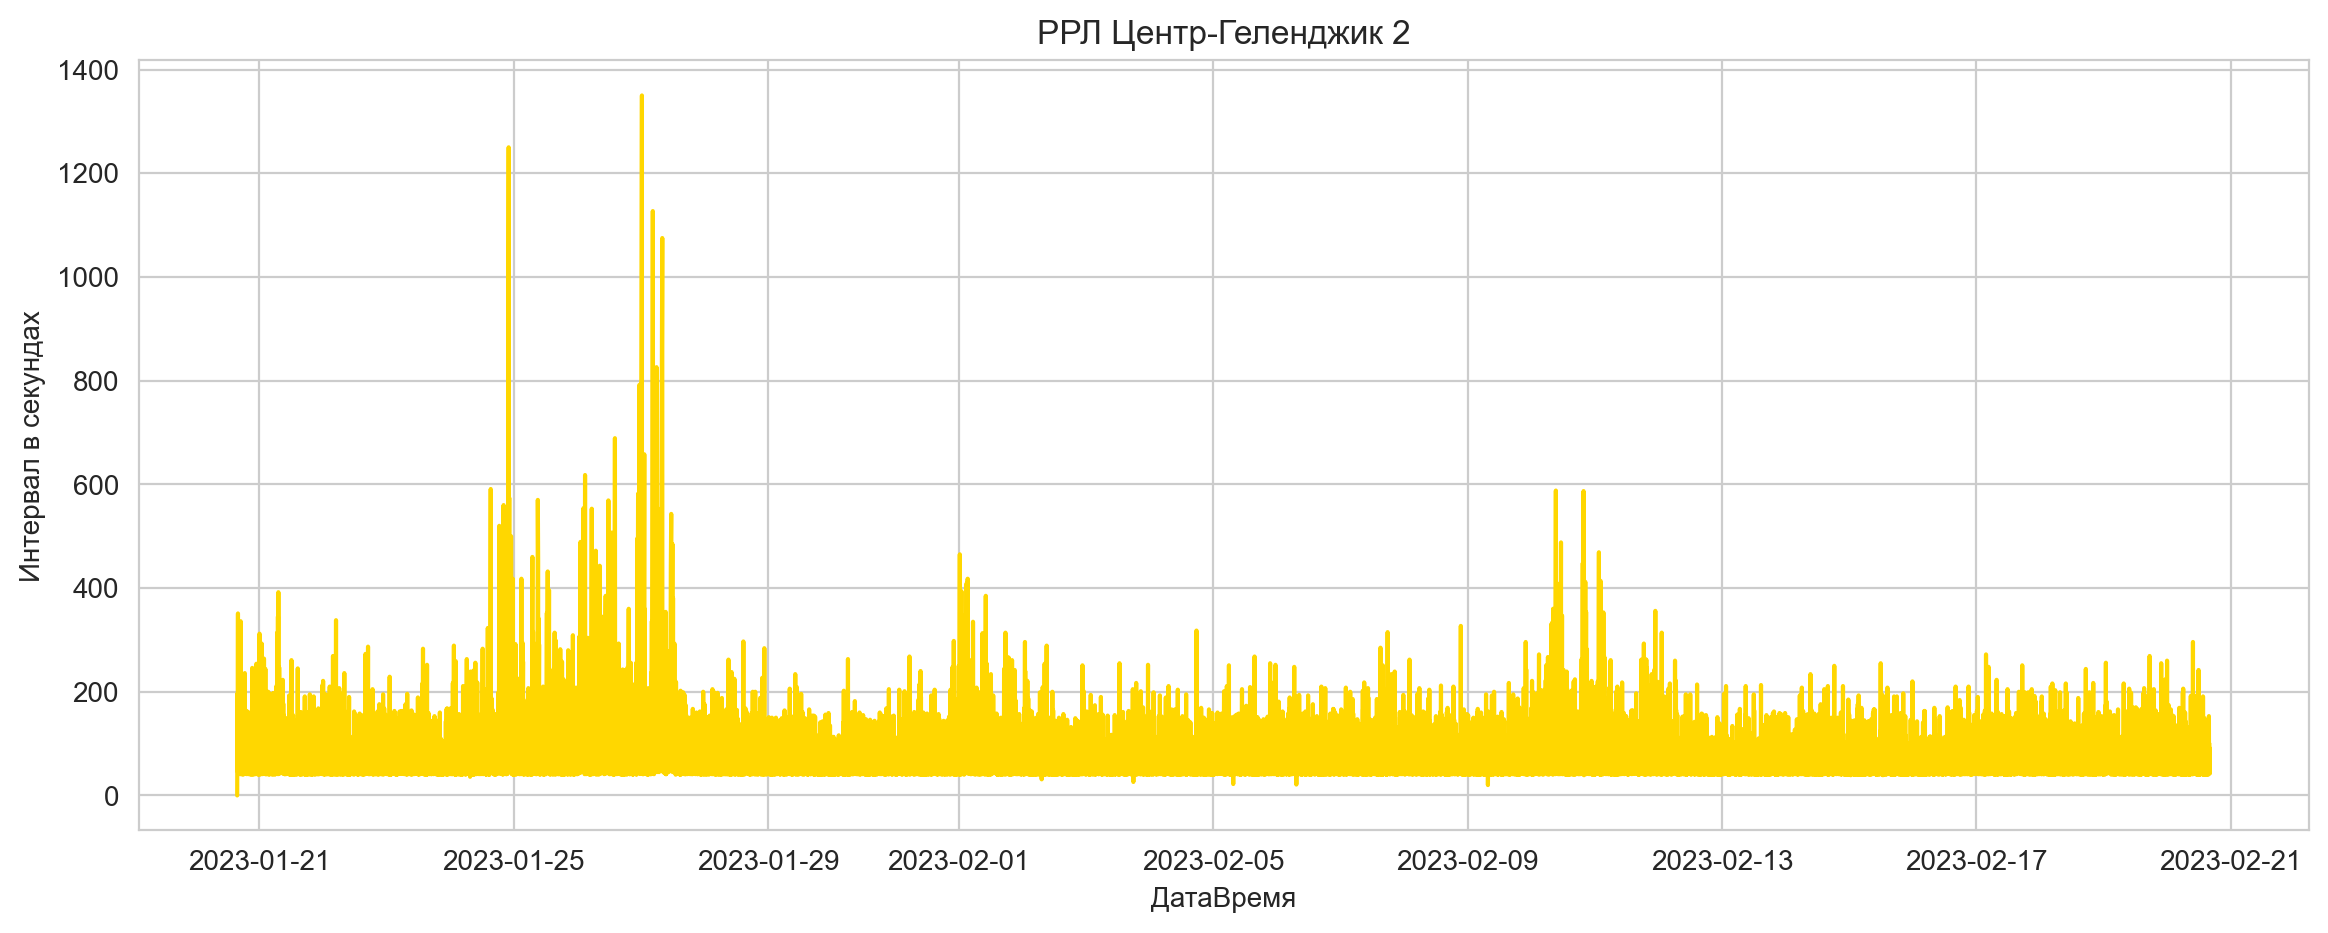

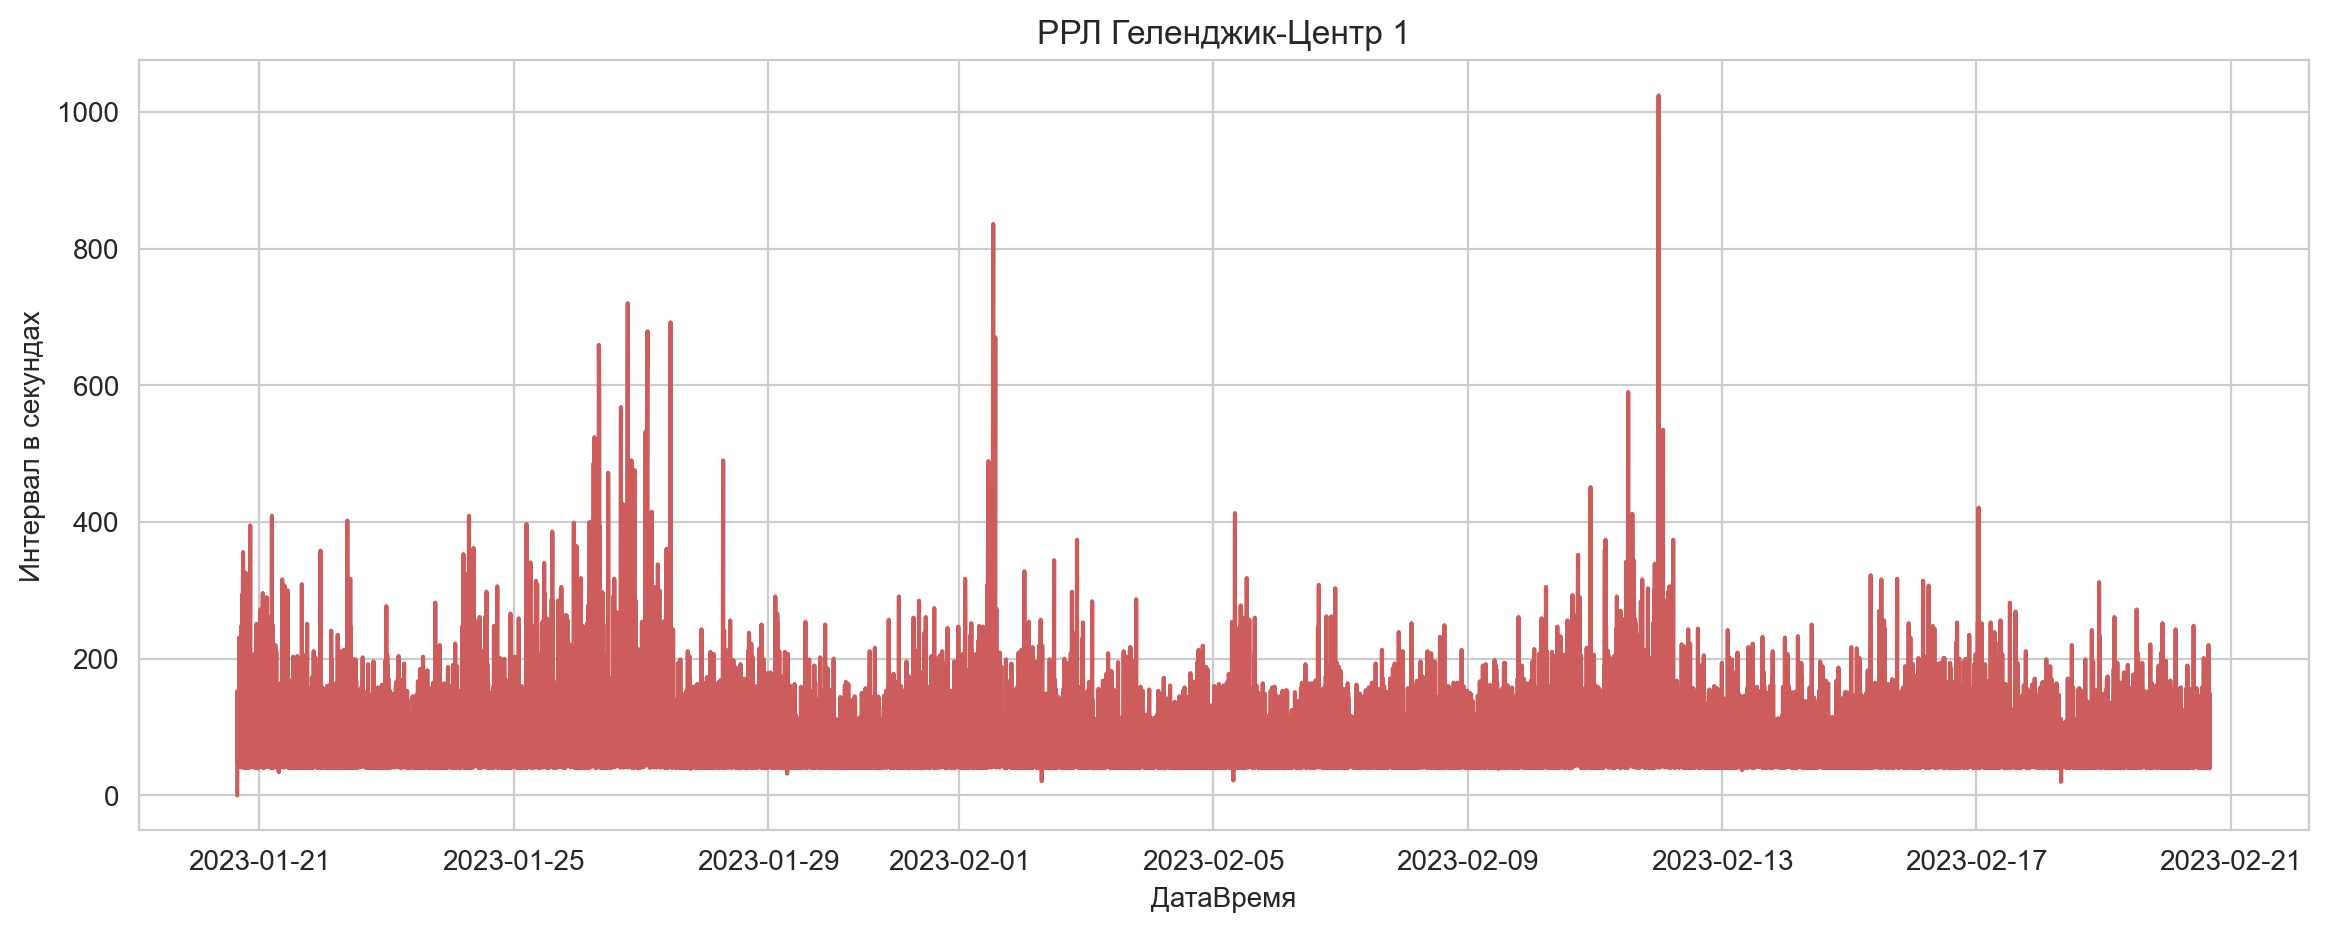

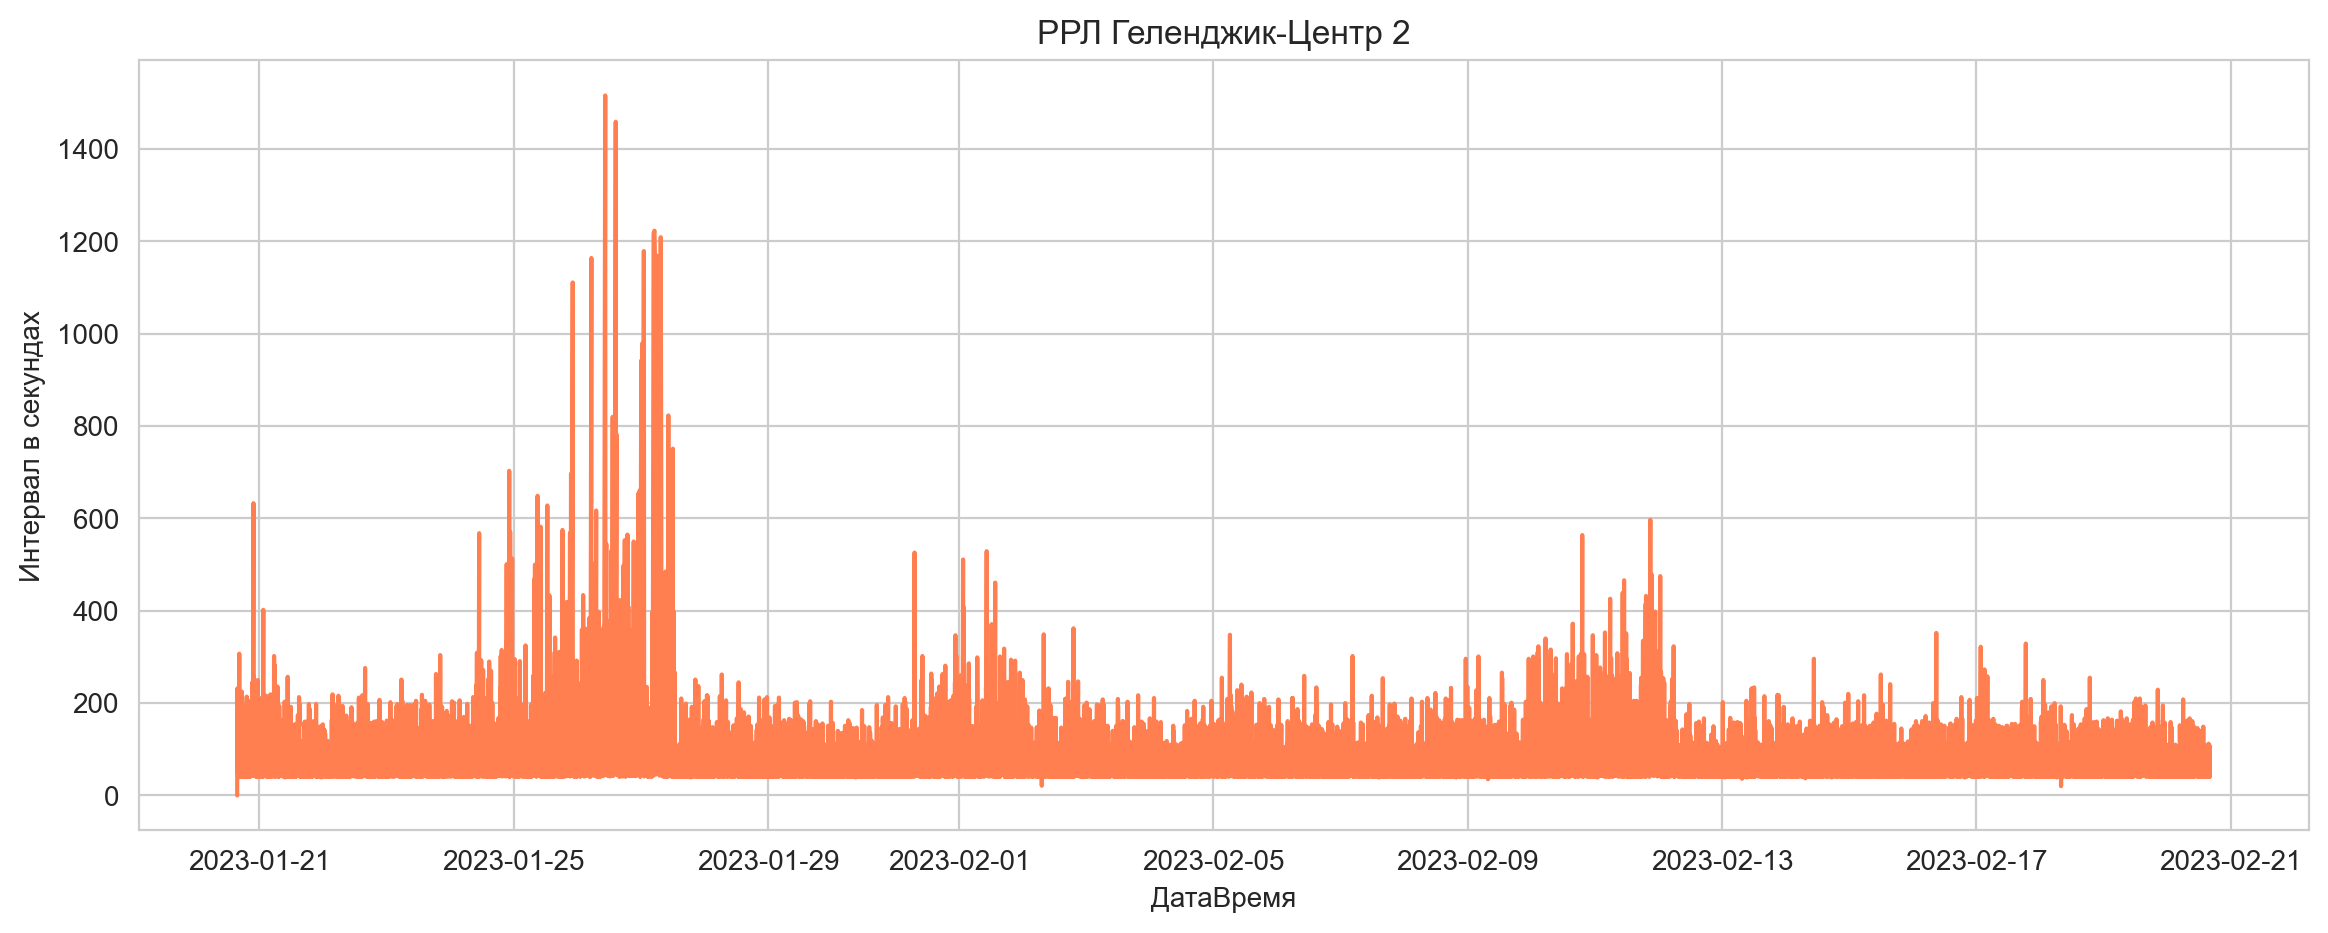

In [47]:
for i in range (0, len(spisok_df)):
    get_plot_int()
    

## РРЛ Центр - Ю. Озереевка

In [48]:
def get_agg1(df):
    pd.set_option("display.precision", 2)
    np.set_printoptions(precision=2)
    print(df[['Значение', 'Интервал в секундах','Интервал в часах']].agg([np.mean, np.median, np.min, np.max]))
    

### Пролёт Центр - КРТПЦ

In [49]:
df_cen_krtpc1 = df2[(df2['object_id'] == ' MonObj25') &
                    (df2['receiver_id'] == 13) & 
                    (df2['channel_id'] == 7)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_cen_krtpc1 = df_cen_krtpc1.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_cen_krtpc1['Интервал']=0 # создаем непустой столбец для расчета
df_cen_krtpc1['Интервал в секундах']=0
df_cen_krtpc1['Интервал в часах']=0
for i in range (1, len(df_cen_krtpc1)): # находим интервал между измерениями
    df_cen_krtpc1['Интервал'][i] = (df_cen_krtpc1['ДатаВремя'][i]-df_cen_krtpc1['ДатаВремя'][i-1])
    df_cen_krtpc1['Интервал в секундах'][i] = (df_cen_krtpc1['ДатаВремя'][i]-df_cen_krtpc1['ДатаВремя'][i-1]) \
    .total_seconds()
df_cen_krtpc1['Интервал в часах']=df_cen_krtpc1['Интервал в секундах']/3600
df_cen_krtpc1['Интервал в секундах']=df_cen_krtpc1['Интервал в секундах'].astype(int)
df_cen_krtpc1['Интервал в часах']=df_cen_krtpc1['Интервал в часах'].astype(int)
df_cen_krtpc1 = df_cen_krtpc1.sort_values(['Интервал в секундах'],ascending=False).reset_index().drop(columns=['index'])
df_cen_krtpc1


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0              13 2023-02-10 23:41:31   MonObj25           7     -45.7   
1              13 2023-02-13 22:52:55   MonObj25           7     -45.1   
2              13 2023-02-14 10:40:23   MonObj25           7     -46.0   
3              13 2023-02-16 16:37:21   MonObj25           7     -45.7   
4              13 2023-02-17 01:49:18   MonObj25           7     -45.1   
...           ...                 ...        ...         ...       ...   
3012           13 2023-02-09 20:54:14   MonObj25           7     -45.4   
3013           13 2023-01-31 05:34:59   MonObj25           7     -45.1   
3014           13 2023-01-27 08:04:01   MonObj25           7     -45.4   
3015           13 2023-02-14 15:06:53   MonObj25           7     -49.2   
3016           13 2023-01-20 15:53:02   MonObj25           7     -44.2   

                   description  unit         Интервал  Интервал в секундах  \
0      Мощность приёма, Radio1    dB  0 days 19:22:13                69733   
1      Мощность приёма, Radio1    dB  0 days 17:00:14                61214   
2      Мощность приёма, Radio1    dB  0 days 11:47:28                42448   
3      Мощность приёма, Radio1    dB  0 days 11:10:11                40211   
4      Мощность приёма, Radio1    dB  0 days 09:11:57                33117   
...                        ...   ...              ...                  ...   
3012   Мощность приёма, Radio1    dB  0 days 00:00:40                   40   
3013   Мощность приёма, Radio1    dB  0 days 00:00:40                   40   
3014   Мощность приёма, Radio1    dB  0 days 00:00:40                   40   
3015   Мощность приёма, Radio1    dB  0 days 00:00:40                   40   
3016   Мощность приёма, Radio1    dB                0                    0   

      Интервал в часах  
0                   19  
1                   17  
2                   11  
3                   11  
4                    9  
...                ...  
3012                 0  
3013                 0  
3014                 0  
3015                 0  
3016                 0  

[3017 rows x 10 columns]

In [50]:
get_agg1(df_cen_krtpc1)


        Значение  Интервал в секундах  Интервал в часах
mean       -45.6               884.14              0.13
median     -45.4               149.00              0.00
amin       -63.9                 0.00              0.00
amax       -42.6             69733.00             19.00


In [51]:
df_cen_krtpc1.to_csv('cen_krtpc1.csv', index=False) # Центр - КРТПЦ 1


In [52]:
df_cen_krtpc2 = df2[(df2['object_id'] == ' MonObj25') &
                    (df2['receiver_id'] == 14) & 
                    (df2['channel_id'] == 8)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_cen_krtpc2 = df_cen_krtpc2.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_cen_krtpc2['Интервал']=0 # создаем непустой столбец для расчета
df_cen_krtpc2['Интервал в секундах']=0
df_cen_krtpc2['Интервал в часах']=0
for i in range (1, len(df_cen_krtpc2)): # находим интервал между измерениями
    df_cen_krtpc2['Интервал'][i] = (df_cen_krtpc2['ДатаВремя'][i]-df_cen_krtpc2['ДатаВремя'][i-1])
    df_cen_krtpc2['Интервал в секундах'][i] = (df_cen_krtpc2['ДатаВремя'][i]-df_cen_krtpc2['ДатаВремя'][i-1]) \
    .total_seconds()
df_cen_krtpc2['Интервал в часах']=df_cen_krtpc2['Интервал в секундах']/3600
df_cen_krtpc2['Интервал в секундах']=df_cen_krtpc2['Интервал в секундах'].astype(int)
df_cen_krtpc2['Интервал в часах']=df_cen_krtpc2['Интервал в часах'].astype(int)
df_cen_krtpc2 = df_cen_krtpc2.sort_values(['Интервал в секундах'],ascending=False).reset_index().drop(columns=['index'])
df_cen_krtpc2


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0              14 2023-02-16 12:30:22   MonObj25           8     -39.5   
1              14 2023-02-15 07:45:43   MonObj25           8     -42.0   
2              14 2023-02-15 22:52:00   MonObj25           8     -40.4   
3              14 2023-02-13 22:55:57   MonObj25           8     -40.4   
4              14 2023-02-14 10:40:23   MonObj25           8     -40.7   
...           ...                 ...        ...         ...       ...   
3443           14 2023-02-08 12:57:47   MonObj25           8     -40.1   
3444           14 2023-01-20 15:53:02   MonObj25           8     -40.1   
3445           14 2023-01-26 00:16:21   MonObj25           8     -39.5   
3446           14 2023-02-08 23:15:33   MonObj25           8     -40.4   
3447           14 2023-01-20 15:52:22   MonObj25           8     -40.7   

                   description  unit         Интервал  Интервал в секундах  \
0      Мощность приёма, Radio2    dB  0 days 13:32:32                48752   
1      Мощность приёма, Radio2    dB  0 days 12:42:19                45739   
2      Мощность приёма, Radio2    dB  0 days 12:41:33                45693   
3      Мощность приёма, Radio2    dB  0 days 12:22:30                44550   
4      Мощность приёма, Radio2    dB  0 days 11:44:26                42266   
...                        ...   ...              ...                  ...   
3443   Мощность приёма, Radio2    dB  0 days 00:00:40                   40   
3444   Мощность приёма, Radio2    dB  0 days 00:00:40                   40   
3445   Мощность приёма, Radio2    dB  0 days 00:00:40                   40   
3446   Мощность приёма, Radio2    dB  0 days 00:00:40                   40   
3447   Мощность приёма, Radio2    dB                0                    0   

      Интервал в часах  
0                   13  
1                   12  
2                   12  
3                   12  
4                   11  
...                ...  
3443                 0  
3444                 0  
3445                 0  
3446                 0  
3447                 0  

[3448 rows x 10 columns]

In [53]:
get_agg1(df_cen_krtpc2)


        Значение  Интервал в секундах  Интервал в часах
mean      -40.63               773.84              0.11
median    -40.40               143.00              0.00
amin      -58.60                 0.00              0.00
amax      -37.90             48752.00             13.00


In [54]:
df_cen_krtpc2.to_csv('cen_krtpc2.csv', index=False) # Центр - КРТПЦ 2


In [55]:
df_krtpc_cen1 = df2[(df2['object_id'] == ' MonObj28') &
                    (df2['receiver_id'] == 15) & 
                    (df2['channel_id'] == 9)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_krtpc_cen1 = df_krtpc_cen1.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_krtpc_cen1['Интервал']=0 # создаем непустой столбец для расчета
df_krtpc_cen1['Интервал в секундах']=0
df_krtpc_cen1['Интервал в часах']=0
for i in range (1, len(df_krtpc_cen1)): # находим интервал между измерениями
    df_krtpc_cen1['Интервал'][i] = (df_krtpc_cen1['ДатаВремя'][i]-df_krtpc_cen1['ДатаВремя'][i-1])
    df_krtpc_cen1['Интервал в секундах'][i] = (df_krtpc_cen1['ДатаВремя'][i]-df_krtpc_cen1['ДатаВремя'][i-1]) \
    .total_seconds()
df_krtpc_cen1['Интервал в часах']=df_krtpc_cen1['Интервал в секундах']/3600
df_krtpc_cen1['Интервал в секундах']=df_krtpc_cen1['Интервал в секундах'].astype(int)
df_krtpc_cen1['Интервал в часах']=df_krtpc_cen1['Интервал в часах'].astype(int)
df_krtpc_cen1 = df_krtpc_cen1.sort_values(['Интервал в секундах'],ascending=False).reset_index().drop(columns=['index'])
df_krtpc_cen1


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0              15 2023-02-13 21:12:52   MonObj28           9     -43.5   
1              15 2023-01-31 05:49:44   MonObj28           9     -42.9   
2              15 2023-01-31 23:17:55   MonObj28           9     -42.6   
3              15 2023-02-10 18:05:09   MonObj28           9     -43.5   
4              15 2023-02-15 21:01:30   MonObj28           9     -43.5   
...           ...                 ...        ...         ...       ...   
2851           15 2023-02-07 02:49:14   MonObj28           9     -44.2   
2852           15 2023-02-07 02:19:24   MonObj28           9     -44.5   
2853           15 2023-02-07 01:55:15   MonObj28           9     -44.5   
2854           15 2023-02-07 01:39:31   MonObj28           9     -44.8   
2855           15 2023-01-20 16:09:22   MonObj28           9     -43.5   

                   description  unit         Интервал  Интервал в секундах  \
0      Мощность приёма, Radio4    dB  0 days 22:50:49                82249   
1      Мощность приёма, Radio4    dB  0 days 12:48:32                46112   
2      Мощность приёма, Radio4    dB  0 days 12:31:00                45060   
3      Мощность приёма, Radio4    dB  0 days 11:55:27                42927   
4      Мощность приёма, Radio4    dB  0 days 11:10:06                40206   
...                        ...   ...              ...                  ...   
2851   Мощность приёма, Radio4    dB  0 days 00:00:44                   44   
2852   Мощность приёма, Radio4    dB  0 days 00:00:44                   44   
2853   Мощность приёма, Radio4    dB  0 days 00:00:44                   44   
2854   Мощность приёма, Radio4    dB  0 days 00:00:44                   44   
2855   Мощность приёма, Radio4    dB                0                    0   

      Интервал в часах  
0                   22  
1                   12  
2                   12  
3                   11  
4                   11  
...                ...  
2851                 0  
2852                 0  
2853                 0  
2854                 0  
2855                 0  

[2856 rows x 10 columns]

In [56]:
get_agg1(df_krtpc_cen1)


        Значение  Интервал в секундах  Интервал в часах
mean      -44.07               936.88              0.14
median    -43.80               151.50              0.00
amin      -62.00                 0.00              0.00
amax      -41.00             82249.00             22.00


In [57]:
df_krtpc_cen1.to_csv('krtpc_cen1.csv', index=False) # КРТПЦ - Центр 1


In [58]:
df_krtpc_cen2 = df2[(df2['object_id'] == ' MonObj28') &
                    (df2['receiver_id'] == 16) & 
                    (df2['channel_id'] == 10)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_krtpc_cen2 = df_krtpc_cen2.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_krtpc_cen2['Интервал']=0 # создаем непустой столбец для расчета
df_krtpc_cen2['Интервал в секундах']=0
df_krtpc_cen2['Интервал в часах']=0
for i in range (1, len(df_krtpc_cen2)): # находим интервал между измерениями
    df_krtpc_cen2['Интервал'][i] = (df_krtpc_cen2['ДатаВремя'][i]-df_krtpc_cen2['ДатаВремя'][i-1])
    df_krtpc_cen2['Интервал в секундах'][i] = (df_krtpc_cen2['ДатаВремя'][i]-df_krtpc_cen2['ДатаВремя'][i-1]) \
    .total_seconds()
df_krtpc_cen2['Интервал в часах']=df_krtpc_cen2['Интервал в секундах']/3600
df_krtpc_cen2['Интервал в секундах']=df_krtpc_cen2['Интервал в секундах'].astype(int)
df_krtpc_cen2['Интервал в часах']=df_krtpc_cen2['Интервал в часах'].astype(int)
df_krtpc_cen2 = df_krtpc_cen2.sort_values(['Интервал в секундах'],ascending=False).reset_index().drop(columns=['index'])
df_krtpc_cen2


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0              16 2023-02-14 07:52:46   MonObj28          10     -40.1   
1              16 2023-02-17 06:01:04   MonObj28          10     -39.5   
2              16 2023-02-16 14:23:05   MonObj28          10     -40.1   
3              16 2023-02-10 22:03:05   MonObj28          10     -39.8   
4              16 2023-01-31 22:50:20   MonObj28          10     -39.5   
...           ...                 ...        ...         ...       ...   
6787           16 2023-02-05 22:18:00   MonObj28          10     -39.1   
6788           16 2023-01-31 05:44:21   MonObj28          10     -39.1   
6789           16 2023-02-09 04:18:46   MonObj28          10     -40.7   
6790           16 2023-02-07 14:11:10   MonObj28          10     -40.4   
6791           16 2023-01-20 16:09:22   MonObj28          10     -39.5   

                   description  unit         Интервал  Интервал в секундах  \
0      Мощность приёма, Radio5    dB  0 days 17:55:18                64518   
1      Мощность приёма, Radio5    dB  0 days 15:37:09                56229   
2      Мощность приёма, Radio5    dB  0 days 15:13:36                54816   
3      Мощность приёма, Radio5    dB  0 days 13:58:22                50302   
4      Мощность приёма, Radio5    dB  0 days 12:22:20                44540   
...                        ...   ...              ...                  ...   
6787   Мощность приёма, Radio5    dB  0 days 00:00:44                   44   
6788   Мощность приёма, Radio5    dB  0 days 00:00:44                   44   
6789   Мощность приёма, Radio5    dB  0 days 00:00:44                   44   
6790   Мощность приёма, Radio5    dB  0 days 00:00:41                   41   
6791   Мощность приёма, Radio5    dB                0                    0   

      Интервал в часах  
0                   17  
1                   15  
2                   15  
3                   13  
4                   12  
...                ...  
6787                 0  
6788                 0  
6789                 0  
6790                 0  
6791                 0  

[6792 rows x 10 columns]

In [59]:
get_agg1(df_krtpc_cen2)


        Значение  Интервал в секундах  Интервал в часах
mean      -39.59               393.45              0.04
median    -39.50                98.00              0.00
amin      -57.60                 0.00              0.00
amax      -36.90             64518.00             17.00


In [60]:
df_krtpc_cen2.to_csv('krtpc_cen2.csv', index=False) # КРТПЦ - Центр 2


### Пролёт КРТПЦ - Абрау

In [61]:
df_krtpc_abrau1 = df2[(df2['object_id'] == ' MonObj28') &
                    (df2['receiver_id'] == 17) & 
                    (df2['channel_id'] == 11)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_krtpc_abrau1 = df_krtpc_abrau1.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_krtpc_abrau1['Интервал']=0 # создаем непустой столбец для расчета
df_krtpc_abrau1['Интервал в секундах']=0
df_krtpc_abrau1['Интервал в часах']=0
for i in range (1, len(df_krtpc_abrau1)): # находим интервал между измерениями
    df_krtpc_abrau1['Интервал'][i] = (df_krtpc_abrau1['ДатаВремя'][i]-df_krtpc_abrau1['ДатаВремя'][i-1])
    df_krtpc_abrau1['Интервал в секундах'][i] = (df_krtpc_abrau1['ДатаВремя'][i]-df_krtpc_abrau1['ДатаВремя'][i-1]) \
    .total_seconds()
df_krtpc_abrau1['Интервал в часах']=df_krtpc_abrau1['Интервал в секундах']/3600
df_krtpc_abrau1['Интервал в секундах']=df_krtpc_abrau1['Интервал в секундах'].astype(int)
df_krtpc_abrau1['Интервал в часах']=df_krtpc_abrau1['Интервал в часах'].astype(int)
df_krtpc_abrau1 = df_krtpc_abrau1.sort_values(['Интервал в секундах'],ascending=False).reset_index() \
.drop(columns=['index'])
df_krtpc_abrau1


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0              17 2023-02-17 11:06:43   MonObj28          11     -43.2   
1              17 2023-02-15 11:50:22   MonObj28          11     -44.8   
2              17 2023-02-16 03:15:33   MonObj28          11     -43.2   
3              17 2023-02-13 15:38:28   MonObj28          11     -43.8   
4              17 2023-02-14 09:48:51   MonObj28          11     -46.0   
...           ...                 ...        ...         ...       ...   
6644           17 2023-01-21 18:29:44   MonObj28          11     -39.1   
6645           17 2023-02-02 20:50:38   MonObj28          11     -39.5   
6646           17 2023-01-20 17:35:30   MonObj28          11     -39.1   
6647           17 2023-01-31 18:37:54   MonObj28          11     -39.1   
6648           17 2023-01-20 16:08:03   MonObj28          11     -39.1   

                   description  unit         Интервал  Интервал в секундах  \
0      Мощность приема, Radio2    dB  1 days 04:35:37               102937   
1      Мощность приема, Radio2    dB  0 days 17:28:56                62936   
2      Мощность приема, Radio2    dB  0 days 13:21:45                48105   
3      Мощность приема, Radio2    dB  0 days 13:07:58                47278   
4      Мощность приема, Radio2    dB  0 days 11:00:02                39602   
...                        ...   ...              ...                  ...   
6644   Мощность приема, Radio2    dB  0 days 00:00:44                   44   
6645   Мощность приема, Radio2    dB  0 days 00:00:44                   44   
6646   Мощность приема, Radio2    dB  0 days 00:00:43                   43   
6647   Мощность приема, Radio2    dB  0 days 00:00:43                   43   
6648   Мощность приема, Radio2    dB                0                    0   

      Интервал в часах  
0                   28  
1                   17  
2                   13  
3                   13  
4                   11  
...                ...  
6644                 0  
6645                 0  
6646                 0  
6647                 0  
6648                 0  

[6649 rows x 10 columns]

In [62]:
get_agg1(df_krtpc_abrau1)


        Значение  Интервал в секундах  Интервал в часах
mean      -39.78               402.02              0.05
median    -39.50                95.00              0.00
amin      -62.70                 0.00              0.00
amax      -37.60            102937.00             28.00


In [63]:
df_krtpc_abrau1.to_csv('krtpc_abrau1.csv', index=False) # КРТПЦ - Абрау 1


In [64]:
df_krtpc_abrau2 = df2[(df2['object_id'] == ' MonObj28') &
                    (df2['receiver_id'] == 18) & 
                    (df2['channel_id'] == 12)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_krtpc_abrau2 = df_krtpc_abrau2.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_krtpc_abrau2['Интервал']=0 # создаем непустой столбец для расчета
df_krtpc_abrau2['Интервал в секундах']=0
df_krtpc_abrau2['Интервал в часах']=0
for i in range (1, len(df_krtpc_abrau2)): # находим интервал между измерениями
    df_krtpc_abrau2['Интервал'][i] = (df_krtpc_abrau2['ДатаВремя'][i]-df_krtpc_abrau2['ДатаВремя'][i-1])
    df_krtpc_abrau2['Интервал в секундах'][i] = (df_krtpc_abrau2['ДатаВремя'][i]-df_krtpc_abrau2['ДатаВремя'][i-1]) \
    .total_seconds()
df_krtpc_abrau2['Интервал в часах']=df_krtpc_abrau2['Интервал в секундах']/3600
df_krtpc_abrau2['Интервал в секундах']=df_krtpc_abrau2['Интервал в секундах'].astype(int)
df_krtpc_abrau2['Интервал в часах']=df_krtpc_abrau2['Интервал в часах'].astype(int)
df_krtpc_abrau2 = df_krtpc_abrau2.sort_values(['Интервал в секундах'],ascending=False).reset_index() \
.drop(columns=['index'])
df_krtpc_abrau2


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0              18 2023-02-14 04:51:29   MonObj28          12     -40.1   
1              18 2023-02-17 11:07:33   MonObj28          12     -40.1   
2              18 2023-02-16 03:17:16   MonObj28          12     -40.1   
3              18 2023-02-04 14:23:08   MonObj28          12     -35.7   
4              18 2023-02-03 09:52:06   MonObj28          12     -34.7   
...           ...                 ...        ...         ...       ...   
7566           18 2023-01-21 17:52:22   MonObj28          12     -35.1   
7567           18 2023-01-22 01:22:23   MonObj28          12     -35.1   
7568           18 2023-01-20 17:35:30   MonObj28          12     -34.7   
7569           18 2023-01-21 18:01:18   MonObj28          12     -35.1   
7570           18 2023-01-20 15:36:26   MonObj28          12     -34.7   

                   description  unit         Интервал  Интервал в секундах  \
0      Мощность приема, Radio3    dB  0 days 20:46:29                74789   
1      Мощность приема, Radio3    dB  0 days 20:26:04                73564   
2      Мощность приема, Radio3    dB  0 days 13:57:02                50222   
3      Мощность приема, Radio3    dB  0 days 11:43:23                42203   
4      Мощность приема, Radio3    dB  0 days 11:33:48                41628   
...                        ...   ...              ...                  ...   
7566   Мощность приема, Radio3    dB  0 days 00:00:43                   43   
7567   Мощность приема, Radio3    dB  0 days 00:00:43                   43   
7568   Мощность приема, Radio3    dB  0 days 00:00:43                   43   
7569   Мощность приема, Radio3    dB  0 days 00:00:43                   43   
7570   Мощность приема, Radio3    dB                0                    0   

      Интервал в часах  
0                   20  
1                   20  
2                   13  
3                   11  
4                   11  
...                ...  
7566                 0  
7567                 0  
7568                 0  
7569                 0  
7570                 0  

[7571 rows x 10 columns]

In [65]:
get_agg1(df_krtpc_abrau2)


        Значение  Интервал в секундах  Интервал в часах
mean      -35.39               352.86              0.04
median    -35.10                94.00              0.00
amin      -59.50                 0.00              0.00
amax      -33.20             74789.00             20.00


In [66]:
df_krtpc_abrau2.to_csv('krtpc_abrau2.csv', index=False) # КРТПЦ - Абрау 2


In [67]:
df_abrau_krtpc1 = df2[(df2['object_id'] == ' MonObj27') &
                    (df2['receiver_id'] == 19) & 
                    (df2['channel_id'] == 9)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_abrau_krtpc1 = df_abrau_krtpc1.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_abrau_krtpc1['Интервал']=0 # создаем непустой столбец для расчета
df_abrau_krtpc1['Интервал в секундах']=0
df_abrau_krtpc1['Интервал в часах']=0
for i in range (1, len(df_abrau_krtpc1)): # находим интервал между измерениями
    df_abrau_krtpc1['Интервал'][i] = (df_abrau_krtpc1['ДатаВремя'][i]-df_abrau_krtpc1['ДатаВремя'][i-1])
    df_abrau_krtpc1['Интервал в секундах'][i] = (df_abrau_krtpc1['ДатаВремя'][i]-df_abrau_krtpc1['ДатаВремя'][i-1]) \
    .total_seconds()
df_abrau_krtpc1['Интервал в часах']=df_abrau_krtpc1['Интервал в секундах']/3600
df_abrau_krtpc1['Интервал в секундах']=df_abrau_krtpc1['Интервал в секундах'].astype(int)
df_abrau_krtpc1['Интервал в часах']=df_abrau_krtpc1['Интервал в часах'].astype(int)
df_abrau_krtpc1 = df_abrau_krtpc1.sort_values(['Интервал в секундах'],ascending=False).reset_index() \
.drop(columns=['index'])
df_abrau_krtpc1


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0              19 2023-02-17 08:13:09   MonObj27           9     -39.5   
1              19 2023-02-13 21:49:00   MonObj27           9     -39.5   
2              19 2023-01-21 09:39:44   MonObj27           9     -38.5   
3              19 2023-01-28 07:11:40   MonObj27           9     -39.1   
4              19 2023-02-10 04:33:30   MonObj27           9     -39.5   
...           ...                 ...        ...         ...       ...   
4543           19 2023-02-11 04:04:49   MonObj27           9     -39.5   
4544           19 2023-02-13 03:49:18   MonObj27           9     -38.8   
4545           19 2023-02-12 21:46:59   MonObj27           9     -39.1   
4546           19 2023-02-12 11:00:23   MonObj27           9     -39.1   
4547           19 2023-01-20 17:16:13   MonObj27           9     -39.5   

                   description  unit         Интервал  Интервал в секундах  \
0      Мощность приёма, Radio4    dB  0 days 19:41:00                70860   
1      Мощность приёма, Radio4    dB  0 days 12:27:28                44848   
2      Мощность приёма, Radio4    dB  0 days 12:00:46                43246   
3      Мощность приёма, Radio4    dB  0 days 10:34:43                38083   
4      Мощность приёма, Radio4    dB  0 days 09:41:00                34860   
...                        ...   ...              ...                  ...   
4543   Мощность приёма, Radio4    dB  0 days 00:00:46                   46   
4544   Мощность приёма, Radio4    dB  0 days 00:00:45                   45   
4545   Мощность приёма, Radio4    dB  0 days 00:00:45                   45   
4546   Мощность приёма, Radio4    dB  0 days 00:00:45                   45   
4547   Мощность приёма, Radio4    dB                0                    0   

      Интервал в часах  
0                   19  
1                   12  
2                   12  
3                   10  
4                    9  
...                ...  
4543                 0  
4544                 0  
4545                 0  
4546                 0  
4547                 0  

[4548 rows x 10 columns]

In [68]:
get_agg1(df_abrau_krtpc1)


        Значение  Интервал в секундах  Интервал в часах
mean      -39.65               588.03              0.08
median    -39.50               107.00              0.00
amin      -64.90                 0.00              0.00
amax      -37.90             70860.00             19.00


In [69]:
df_abrau_krtpc1.to_csv('abrau_krtpc1.csv', index=False) # Абрау - КРТПЦ 1


In [70]:
df_abrau_krtpc2 = df2[(df2['object_id'] == ' MonObj27') &
                    (df2['receiver_id'] == 20) & 
                    (df2['channel_id'] == 10)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_abrau_krtpc2 = df_abrau_krtpc2.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_abrau_krtpc2['Интервал']=0 # создаем непустой столбец для расчета
df_abrau_krtpc2['Интервал в секундах']=0
df_abrau_krtpc2['Интервал в часах']=0
for i in range (1, len(df_abrau_krtpc2)): # находим интервал между измерениями
    df_abrau_krtpc2['Интервал'][i] = (df_abrau_krtpc2['ДатаВремя'][i]-df_abrau_krtpc2['ДатаВремя'][i-1])
    df_abrau_krtpc2['Интервал в секундах'][i] = (df_abrau_krtpc2['ДатаВремя'][i]-df_abrau_krtpc2['ДатаВремя'][i-1]) \
    .total_seconds()
df_abrau_krtpc2['Интервал в часах']=df_abrau_krtpc2['Интервал в секундах']/3600
df_abrau_krtpc2['Интервал в секундах']=df_abrau_krtpc2['Интервал в секундах'].astype(int)
df_abrau_krtpc2['Интервал в часах']=df_abrau_krtpc2['Интервал в часах'].astype(int)
df_abrau_krtpc2 = df_abrau_krtpc2.sort_values(['Интервал в секундах'],ascending=False).reset_index() \
.drop(columns=['index'])
df_abrau_krtpc2


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0              20 2023-01-28 13:44:10   MonObj27          10     -34.7   
1              20 2023-01-31 22:54:30   MonObj27          10     -35.1   
2              20 2023-01-21 10:24:57   MonObj27          10     -35.1   
3              20 2023-02-16 23:36:36   MonObj27          10     -35.1   
4              20 2023-01-23 09:18:34   MonObj27          10     -34.1   
...           ...                 ...        ...         ...       ...   
3884           20 2023-02-11 04:04:49   MonObj27          10     -35.1   
3885           20 2023-02-03 04:49:27   MonObj27          10     -34.7   
3886           20 2023-01-28 20:22:27   MonObj27          10     -35.1   
3887           20 2023-02-12 21:46:59   MonObj27          10     -34.7   
3888           20 2023-01-20 17:16:14   MonObj27          10     -35.1   

                   description  unit         Интервал  Интервал в секундах  \
0      Мощность приёма, Radio5    dB  0 days 17:07:13                61633   
1      Мощность приёма, Radio5    dB  0 days 12:59:36                46776   
2      Мощность приёма, Radio5    dB  0 days 12:51:36                46296   
3      Мощность приёма, Radio5    dB  0 days 11:43:54                42234   
4      Мощность приёма, Radio5    dB  0 days 11:19:49                40789   
...                        ...   ...              ...                  ...   
3884   Мощность приёма, Radio5    dB  0 days 00:00:46                   46   
3885   Мощность приёма, Radio5    dB  0 days 00:00:46                   46   
3886   Мощность приёма, Radio5    dB  0 days 00:00:46                   46   
3887   Мощность приёма, Radio5    dB  0 days 00:00:45                   45   
3888   Мощность приёма, Radio5    dB                0                    0   

      Интервал в часах  
0                   17  
1                   12  
2                   12  
3                   11  
4                   11  
...                ...  
3884                 0  
3885                 0  
3886                 0  
3887                 0  
3888                 0  

[3889 rows x 10 columns]

In [71]:
get_agg1(df_abrau_krtpc2)


        Значение  Интервал в секундах  Интервал в часах
mean      -35.43               687.47               0.1
median    -35.10               107.00               0.0
amin      -59.80                 0.00               0.0
amax      -33.20             61633.00              17.0


In [72]:
df_abrau_krtpc2.to_csv('abrau_krtpc2.csv', index=False) # Абрау - КРТПЦ 2


### Пролёт Абрау - Ю.Озереевка

In [73]:
df_abrau_ozer1 = df2[(df2['object_id'] == ' MonObj27') &
                    (df2['receiver_id'] == 21) & 
                    (df2['channel_id'] == 11)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_abrau_ozer1 = df_abrau_ozer1.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_abrau_ozer1['Интервал']=0 # создаем непустой столбец для расчета
df_abrau_ozer1['Интервал в секундах']=0
df_abrau_ozer1['Интервал в часах']=0
for i in range (1, len(df_abrau_ozer1)): # находим интервал между измерениями
    df_abrau_ozer1['Интервал'][i] = (df_abrau_ozer1['ДатаВремя'][i]-df_abrau_ozer1['ДатаВремя'][i-1])
    df_abrau_ozer1['Интервал в секундах'][i] = (df_abrau_ozer1['ДатаВремя'][i]-df_abrau_ozer1['ДатаВремя'][i-1]) \
    .total_seconds()
df_abrau_ozer1['Интервал в часах']=df_abrau_ozer1['Интервал в секундах']/3600
df_abrau_ozer1['Интервал в секундах']=df_abrau_ozer1['Интервал в секундах'].astype(int)
df_abrau_ozer1['Интервал в часах']=df_abrau_ozer1['Интервал в часах'].astype(int)
df_abrau_ozer1 = df_abrau_ozer1.sort_values(['Интервал в секундах'],ascending=False).reset_index() \
.drop(columns=['index'])
df_abrau_ozer1


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0             21 2023-02-12 04:40:58   MonObj27          11     -43.2   
1             21 2023-01-23 16:21:38   MonObj27          11     -42.0   
2             21 2023-02-17 08:04:56   MonObj27          11     -42.3   
3             21 2023-01-28 14:22:08   MonObj27          11     -42.6   
4             21 2023-02-06 16:25:33   MonObj27          11     -41.3   
..           ...                 ...        ...         ...       ...   
179           21 2023-02-12 17:53:58   MonObj27          11     -44.5   
180           21 2023-02-03 19:32:29   MonObj27          11     -43.5   
181           21 2023-02-14 15:32:13   MonObj27          11     -44.8   
182           21 2023-01-20 20:46:22   MonObj27          11     -41.6   
183           21 2023-01-20 20:29:19   MonObj27          11     -42.0   

                  description  unit         Интервал  Интервал в секундах  \
0     Мощность приема, Radio2    dB  5 days 12:15:25               476125   
1     Мощность приема, Radio2    dB  2 days 19:00:50               241250   
2     Мощность приема, Radio2    dB  2 days 14:53:20               226400   
3     Мощность приема, Radio2    dB  2 days 14:08:22               223702   
4     Мощность приема, Radio2    dB  2 days 10:28:04               210484   
..                        ...   ...              ...                  ...   
179   Мощность приема, Radio2    dB  0 days 00:00:49                   49   
180   Мощность приема, Radio2    dB  0 days 00:00:47                   47   
181   Мощность приема, Radio2    dB  0 days 00:00:47                   47   
182   Мощность приема, Radio2    dB  0 days 00:00:46                   46   
183   Мощность приема, Radio2    dB                0                    0   

     Интервал в часах  
0                 132  
1                  67  
2                  62  
3                  62  
4                  58  
..                ...  
179                 0  
180                 0  
181                 0  
182                 0  
183                 0  

[184 rows x 10 columns]

In [74]:
get_agg1(df_abrau_ozer1)


        Значение  Интервал в секундах  Интервал в часах
mean       -43.5             14330.01               3.8
median     -43.2               169.50               0.0
amin       -48.5                 0.00               0.0
amax       -41.0            476125.00             132.0


In [75]:
df_abrau_ozer1.to_csv('abrau_ozer1.csv', index=False) # Абрау - Ю. Озереевка 1


In [76]:
df_abrau_ozer2 = df2[(df2['object_id'] == ' MonObj27') &
                    (df2['receiver_id'] == 22) & 
                    (df2['channel_id'] == 12)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_abrau_ozer2 = df_abrau_ozer2.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_abrau_ozer2['Интервал']=0 # создаем непустой столбец для расчета
df_abrau_ozer2['Интервал в секундах']=0
df_abrau_ozer2['Интервал в часах']=0
for i in range (1, len(df_abrau_ozer2)): # находим интервал между измерениями
    df_abrau_ozer2['Интервал'][i] = (df_abrau_ozer2['ДатаВремя'][i]-df_abrau_ozer2['ДатаВремя'][i-1])
    df_abrau_ozer2['Интервал в секундах'][i] = (df_abrau_ozer2['ДатаВремя'][i]-df_abrau_ozer2['ДатаВремя'][i-1]) \
    .total_seconds()
df_abrau_ozer2['Интервал в часах']=df_abrau_ozer2['Интервал в секундах']/3600
df_abrau_ozer2['Интервал в секундах']=df_abrau_ozer2['Интервал в секундах'].astype(int)
df_abrau_ozer2['Интервал в часах']=df_abrau_ozer2['Интервал в часах'].astype(int)
df_abrau_ozer2 = df_abrau_ozer2.sort_values(['Интервал в секундах'],ascending=False).reset_index() \
.drop(columns=['index'])
df_abrau_ozer2


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0             22 2023-02-12 04:30:38   MonObj27          12     -37.3   
1             22 2023-02-17 07:16:39   MonObj27          12     -37.3   
2             22 2023-02-01 01:47:50   MonObj27          12     -37.3   
3             22 2023-01-23 02:42:01   MonObj27          12     -37.3   
4             22 2023-02-14 13:28:25   MonObj27          12     -37.3   
..           ...                 ...        ...         ...       ...   
870           22 2023-02-01 05:30:53   MonObj27          12     -36.9   
871           22 2023-02-19 02:25:06   MonObj27          12     -36.9   
872           22 2023-01-26 04:45:58   MonObj27          12     -37.3   
873           22 2023-02-14 15:38:40   MonObj27          12     -39.8   
874           22 2023-01-20 20:21:34   MonObj27          12     -36.3   

                  description  unit         Интервал  Интервал в секундах  \
0     Мощность приема, Radio3    dB  3 days 13:49:25               308965   
1     Мощность приема, Radio3    dB  1 days 21:05:02               162302   
2     Мощность приема, Radio3    dB  1 days 17:34:32               149672   
3     Мощность приема, Radio3    dB  1 days 16:53:43               147223   
4     Мощность приема, Radio3    dB  1 days 16:10:36               144636   
..                        ...   ...              ...                  ...   
870   Мощность приема, Radio3    dB  0 days 00:00:47                   47   
871   Мощность приема, Radio3    dB  0 days 00:00:47                   47   
872   Мощность приема, Radio3    dB  0 days 00:00:46                   46   
873   Мощность приема, Radio3    dB  0 days 00:00:46                   46   
874   Мощность приема, Radio3    dB                0                    0   

     Интервал в часах  
0                  85  
1                  45  
2                  41  
3                  40  
4                  40  
..                ...  
870                 0  
871                 0  
872                 0  
873                 0  
874                 0  

[875 rows x 10 columns]

In [77]:
get_agg1(df_abrau_ozer2)


        Значение  Интервал в секундах  Интервал в часах
mean      -37.51              3031.82              0.72
median    -37.30               114.00              0.00
amin      -43.20                 0.00              0.00
amax      -36.30            308965.00             85.00


In [78]:
df_abrau_ozer2.to_csv('abrau_ozer2.csv', index=False) # Абрау - Ю. Озереевка 2


In [79]:
df_ozer_abrau1 = df2[(df2['object_id'] == ' MonObj26') &
                    (df2['receiver_id'] == 23) & 
                    (df2['channel_id'] == 7)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_ozer_abrau1 = df_ozer_abrau1.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_ozer_abrau1['Интервал']=0 # создаем непустой столбец для расчета
df_ozer_abrau1['Интервал в секундах']=0
df_ozer_abrau1['Интервал в часах']=0
for i in range (1, len(df_ozer_abrau1)): # находим интервал между измерениями
    df_ozer_abrau1['Интервал'][i] = (df_ozer_abrau1['ДатаВремя'][i]-df_ozer_abrau1['ДатаВремя'][i-1])
    df_ozer_abrau1['Интервал в секундах'][i] = (df_ozer_abrau1['ДатаВремя'][i]-df_ozer_abrau1['ДатаВремя'][i-1]) \
    .total_seconds()
df_ozer_abrau1['Интервал в часах']=df_ozer_abrau1['Интервал в секундах']/3600
df_ozer_abrau1['Интервал в секундах']=df_ozer_abrau1['Интервал в секундах'].astype(int)
df_ozer_abrau1['Интервал в часах']=df_ozer_abrau1['Интервал в часах'].astype(int)
df_ozer_abrau1 = df_ozer_abrau1.sort_values(['Интервал в секундах'],ascending=False).reset_index() \
.drop(columns=['index'])
df_ozer_abrau1


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0             23 2023-02-12 04:42:00   MonObj26           7     -44.2   
1             23 2023-01-28 07:29:20   MonObj26           7     -42.0   
2             23 2023-02-01 02:45:09   MonObj26           7     -41.6   
3             23 2023-02-17 07:38:06   MonObj26           7     -42.0   
4             23 2023-02-14 13:43:05   MonObj26           7     -43.2   
..           ...                 ...        ...         ...       ...   
217           23 2023-02-03 11:23:31   MonObj26           7     -45.4   
218           23 2023-02-03 12:11:05   MonObj26           7     -43.5   
219           23 2023-02-03 15:02:06   MonObj26           7     -42.9   
220           23 2023-02-04 05:39:37   MonObj26           7     -47.6   
221           23 2023-01-20 19:46:17   MonObj26           7     -41.6   

                  description  unit         Интервал  Интервал в секундах  \
0     Мощность приёма, Radio1    dB  7 days 22:44:50               686690   
1     Мощность приёма, Radio1    dB  4 days 09:31:16               379876   
2     Мощность приёма, Radio1    dB  2 days 13:41:29               222089   
3     Мощность приёма, Radio1    dB  2 days 13:32:15               221535   
4     Мощность приёма, Radio1    dB  1 days 17:48:10               150490   
..                        ...   ...              ...                  ...   
217   Мощность приёма, Radio1    dB  0 days 00:00:43                   43   
218   Мощность приёма, Radio1    dB  0 days 00:00:43                   43   
219   Мощность приёма, Radio1    dB  0 days 00:00:42                   42   
220   Мощность приёма, Radio1    dB  0 days 00:00:41                   41   
221   Мощность приёма, Radio1    dB                0                    0   

     Интервал в часах  
0                 190  
1                 105  
2                  61  
3                  61  
4                  41  
..                ...  
217                 0  
218                 0  
219                 0  
220                 0  
221                 0  

[222 rows x 10 columns]

In [80]:
get_agg1(df_ozer_abrau1)


        Значение  Интервал в секундах  Интервал в часах
mean      -43.61             11888.59              3.13
median    -43.20               187.50              0.00
amin      -48.90                 0.00              0.00
amax      -41.00            686690.00            190.00


In [81]:
df_ozer_abrau1.to_csv('ozer_abrau1.csv', index=False) # Ю. Озереевка - Абрау 1


In [82]:
df_ozer_abrau2 = df2[(df2['object_id'] == ' MonObj26') &
                    (df2['receiver_id'] == 24) & 
                    (df2['channel_id'] == 8)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_ozer_abrau2 = df_ozer_abrau2.sort_values(['ДатаВремя'],ascending=True).reset_index().drop(columns=['index'])
df_ozer_abrau2['Интервал']=0 # создаем непустой столбец для расчета
df_ozer_abrau2['Интервал в секундах']=0
df_ozer_abrau2['Интервал в часах']=0
for i in range (1, len(df_ozer_abrau2)): # находим интервал между измерениями
    df_ozer_abrau2['Интервал'][i] = (df_ozer_abrau2['ДатаВремя'][i]-df_ozer_abrau2['ДатаВремя'][i-1])
    df_ozer_abrau2['Интервал в секундах'][i] = (df_ozer_abrau2['ДатаВремя'][i]-df_ozer_abrau2['ДатаВремя'][i-1]) \
    .total_seconds()
df_ozer_abrau2['Интервал в часах']=df_ozer_abrau2['Интервал в секундах']/3600
df_ozer_abrau2['Интервал в секундах']=df_ozer_abrau2['Интервал в секундах'].astype(int)
df_ozer_abrau2['Интервал в часах']=df_ozer_abrau2['Интервал в часах'].astype(int)
df_ozer_abrau2 = df_ozer_abrau2.sort_values(['Интервал в секундах'],ascending=False).reset_index() \
.drop(columns=['index'])
df_ozer_abrau2


receiver_id           ДатаВремя  object_id  channel_id  Значение  \
0              24 2023-02-09 13:07:29   MonObj26           8     -36.9   
1              24 2023-02-16 13:45:31   MonObj26           8     -36.9   
2              24 2023-02-17 09:01:01   MonObj26           8     -39.5   
3              24 2023-01-27 08:21:44   MonObj26           8     -36.9   
4              24 2023-02-10 02:29:53   MonObj26           8     -36.9   
...           ...                 ...        ...         ...       ...   
5567           24 2023-01-21 20:36:52   MonObj26           8     -37.3   
5568           24 2023-02-05 07:32:19   MonObj26           8     -36.9   
5569           24 2023-01-21 09:00:19   MonObj26           8     -37.3   
5570           24 2023-01-28 07:34:58   MonObj26           8     -37.3   
5571           24 2023-01-20 17:02:59   MonObj26           8     -37.3   

                   description  unit         Интервал  Интервал в секундах  \
0      Мощность приёма, Radio2    dB  3 days 07:17:52               285472   
1      Мощность приёма, Radio2    dB  0 days 21:23:40                77020   
2      Мощность приёма, Radio2    dB  0 days 18:42:32                67352   
3      Мощность приёма, Radio2    dB  0 days 14:28:51                52131   
4      Мощность приёма, Radio2    dB  0 days 13:01:56                46916   
...                        ...   ...              ...                  ...   
5567   Мощность приёма, Radio2    dB  0 days 00:00:39                   39   
5568   Мощность приёма, Radio2    dB  0 days 00:00:39                   39   
5569   Мощность приёма, Radio2    dB  0 days 00:00:39                   39   
5570   Мощность приёма, Radio2    dB  0 days 00:00:29                   29   
5571   Мощность приёма, Radio2    dB                0                    0   

      Интервал в часах  
0                   79  
1                   21  
2                   18  
3                   14  
4                   13  
...                ...  
5567                 0  
5568                 0  
5569                 0  
5570                 0  
5571                 0  

[5572 rows x 10 columns]

In [83]:
get_agg1(df_ozer_abrau2)


        Значение  Интервал в секундах  Интервал в часах
mean      -37.25               479.96              0.07
median    -37.30                55.00              0.00
amin      -43.80                 0.00              0.00
amax      -36.60            285472.00             79.00


In [84]:
df_ozer_abrau2.to_csv('ozer_abrau2.csv', index=False) # Ю. Озереевка - Абрау 2


In [85]:
spisok_df1=[df_cen_krtpc1, df_cen_krtpc2, df_krtpc_cen1, df_krtpc_cen2]
spisok_df2=[df_krtpc_abrau1, df_krtpc_abrau2, df_abrau_krtpc1, df_abrau_krtpc2]
spisok_df3=[df_abrau_ozer1, df_abrau_ozer2, df_ozer_abrau1, df_ozer_abrau2]
spisok_title1=['РРЛ Центр-КРТПЦ 1', 'РРЛ Центр-КРТПЦ 2', 'РРЛ КРТПЦ-Центр 1', 'РРЛ КРТПЦ-Центр 2'] 
spisok_title2=['РРЛ КРТПЦ-Абрау 1', 'РРЛ КРТПЦ-Абрау 2', 'РРЛ Абрау-КРТПЦ 1', 'РРЛ Абрау-КРТПЦ 2']
spisok_title3=['РРЛ Абрау-Ю.Озереевка 1', 'РРЛ Абрау-Ю.Озереевка 2', 
               'РРЛ Ю.Озереевка-Абрау 1', 'РРЛ Ю.Озереевка-Абрау 2']
colors1=['g','g','b','b']
colors2=['brown','brown','gold','gold']
colors3=['indianred','indianred','coral','coral']


In [86]:
def get_plot1(df_spisok,list_colors,list_title):
    plt.figure(figsize=(14, 5))
    sns.lineplot(data = df_spisok[i], x = "ДатаВремя", y = "Значение", legend = 'auto', color = list_colors[i])\
                                                                         .set(title=list_title[i]);
    plt.show()
    

In [87]:
def get_plot1_int(df_spisok,list_colors,list_title):
    plt.figure(figsize=(14, 5))
    sns.lineplot(data = df_spisok[i], x = "ДатаВремя", y = "Интервал в часах", legend = 'auto', color = list_colors[i])\
                                                                         .set(title=list_title[i]);
    plt.show()
    

### Уровни сигнала РРЛ между ЦСУДС и КРТПЦ.

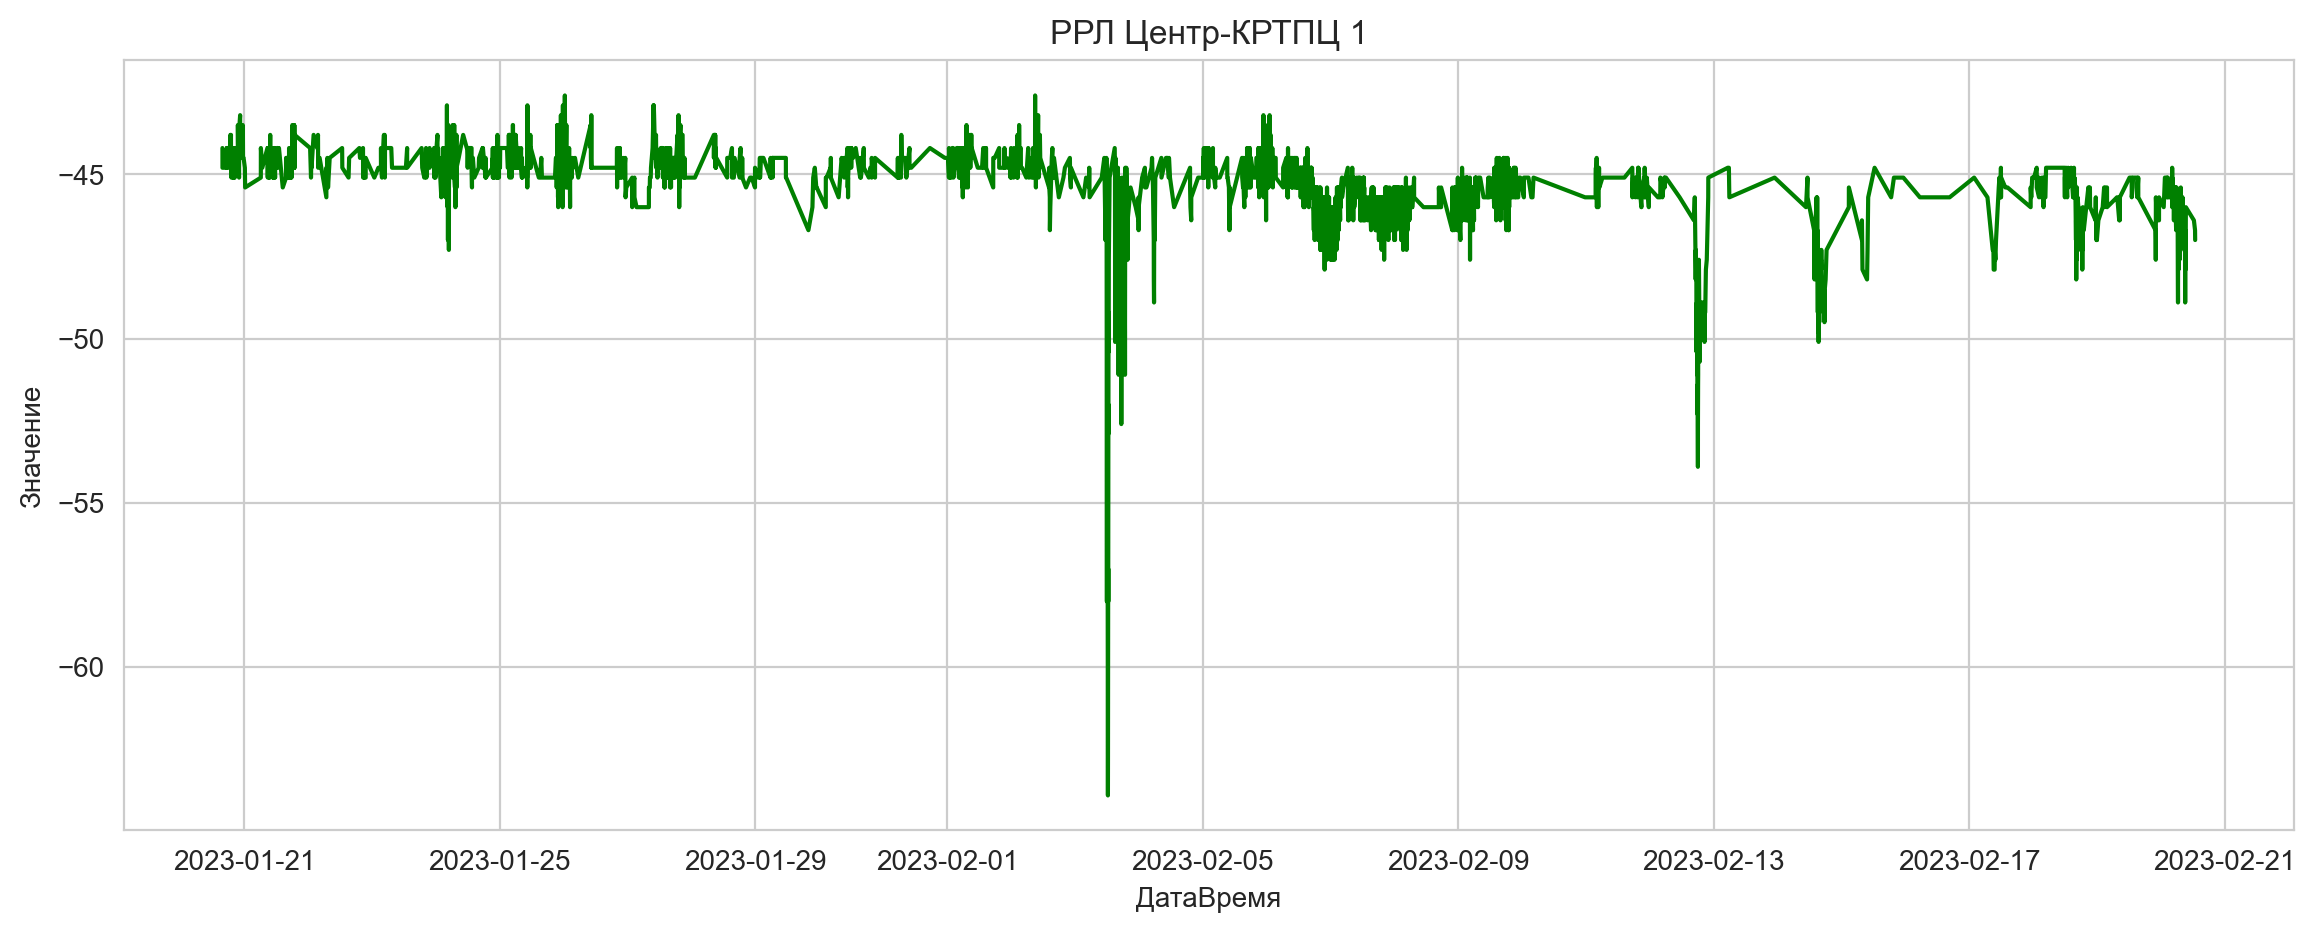

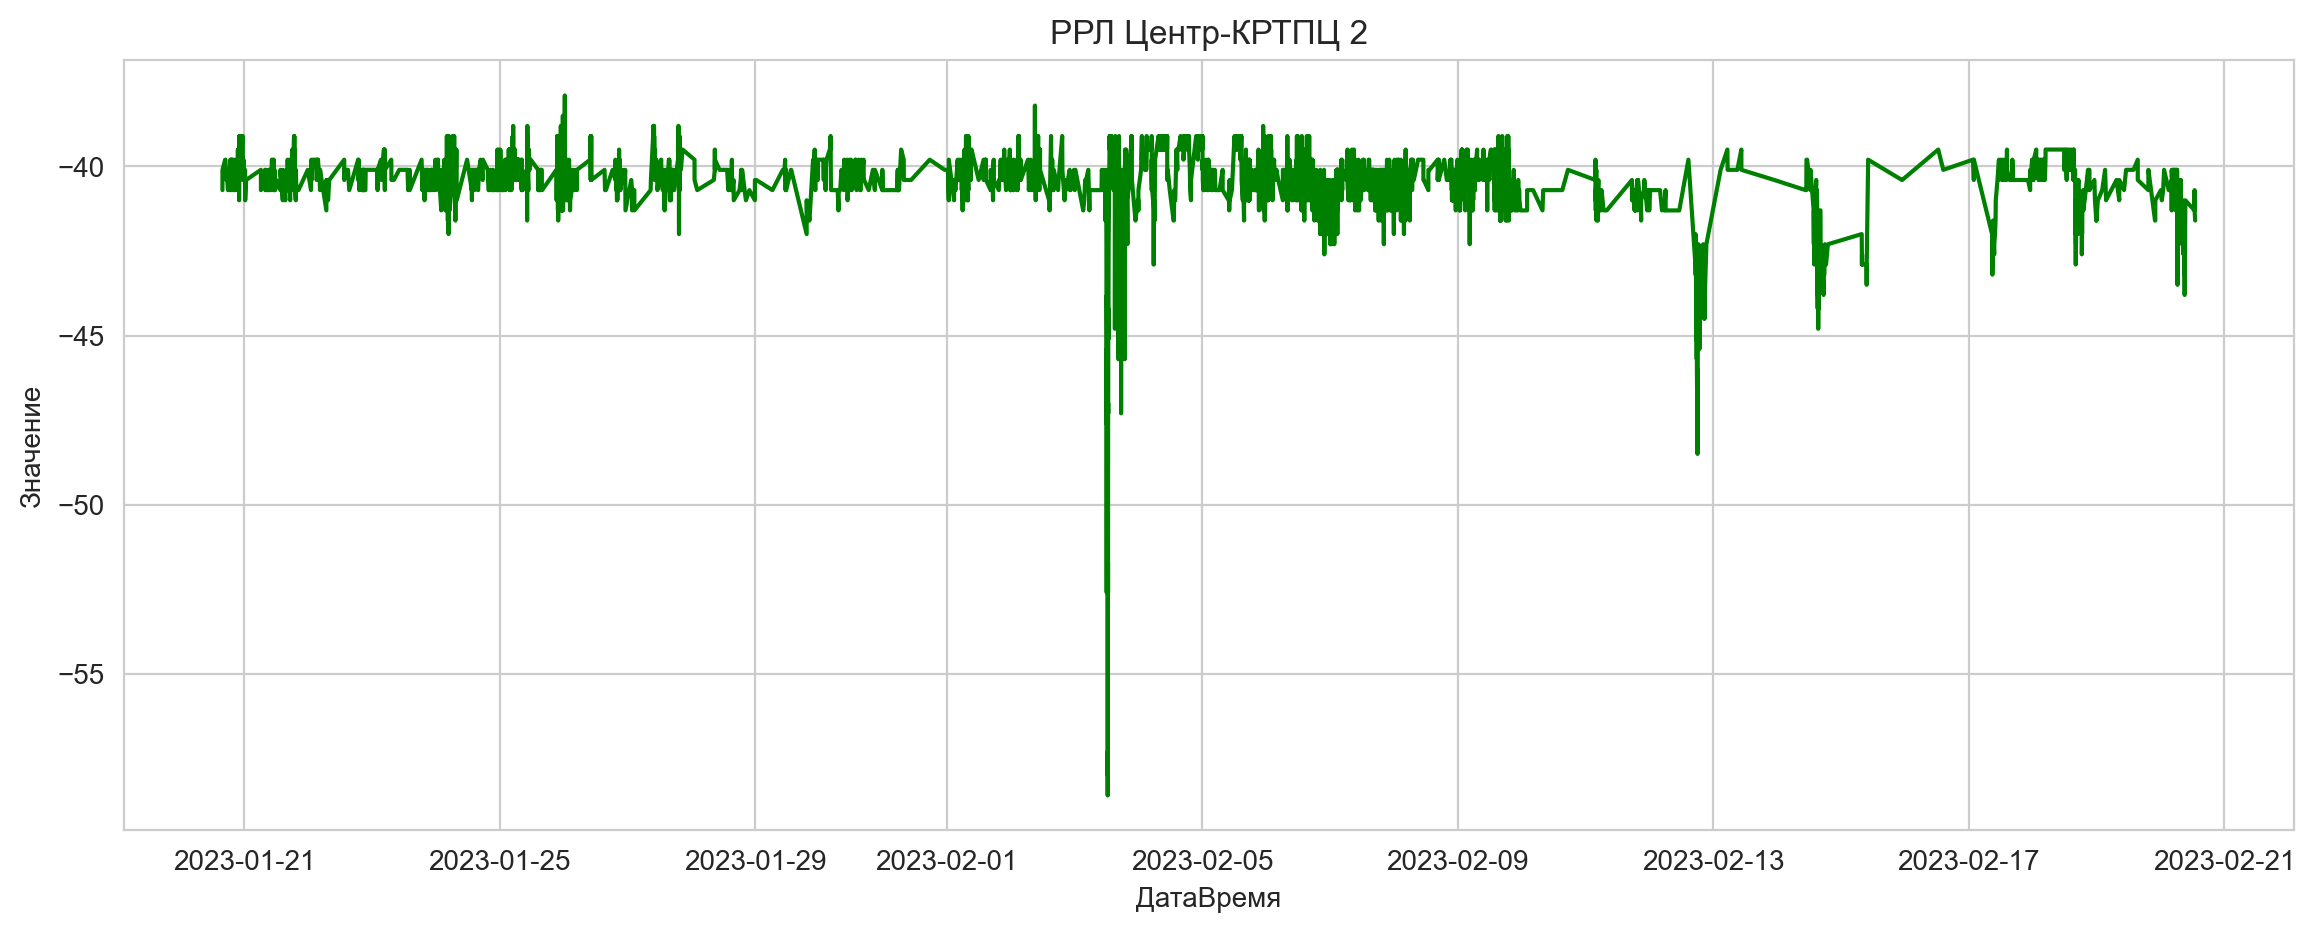

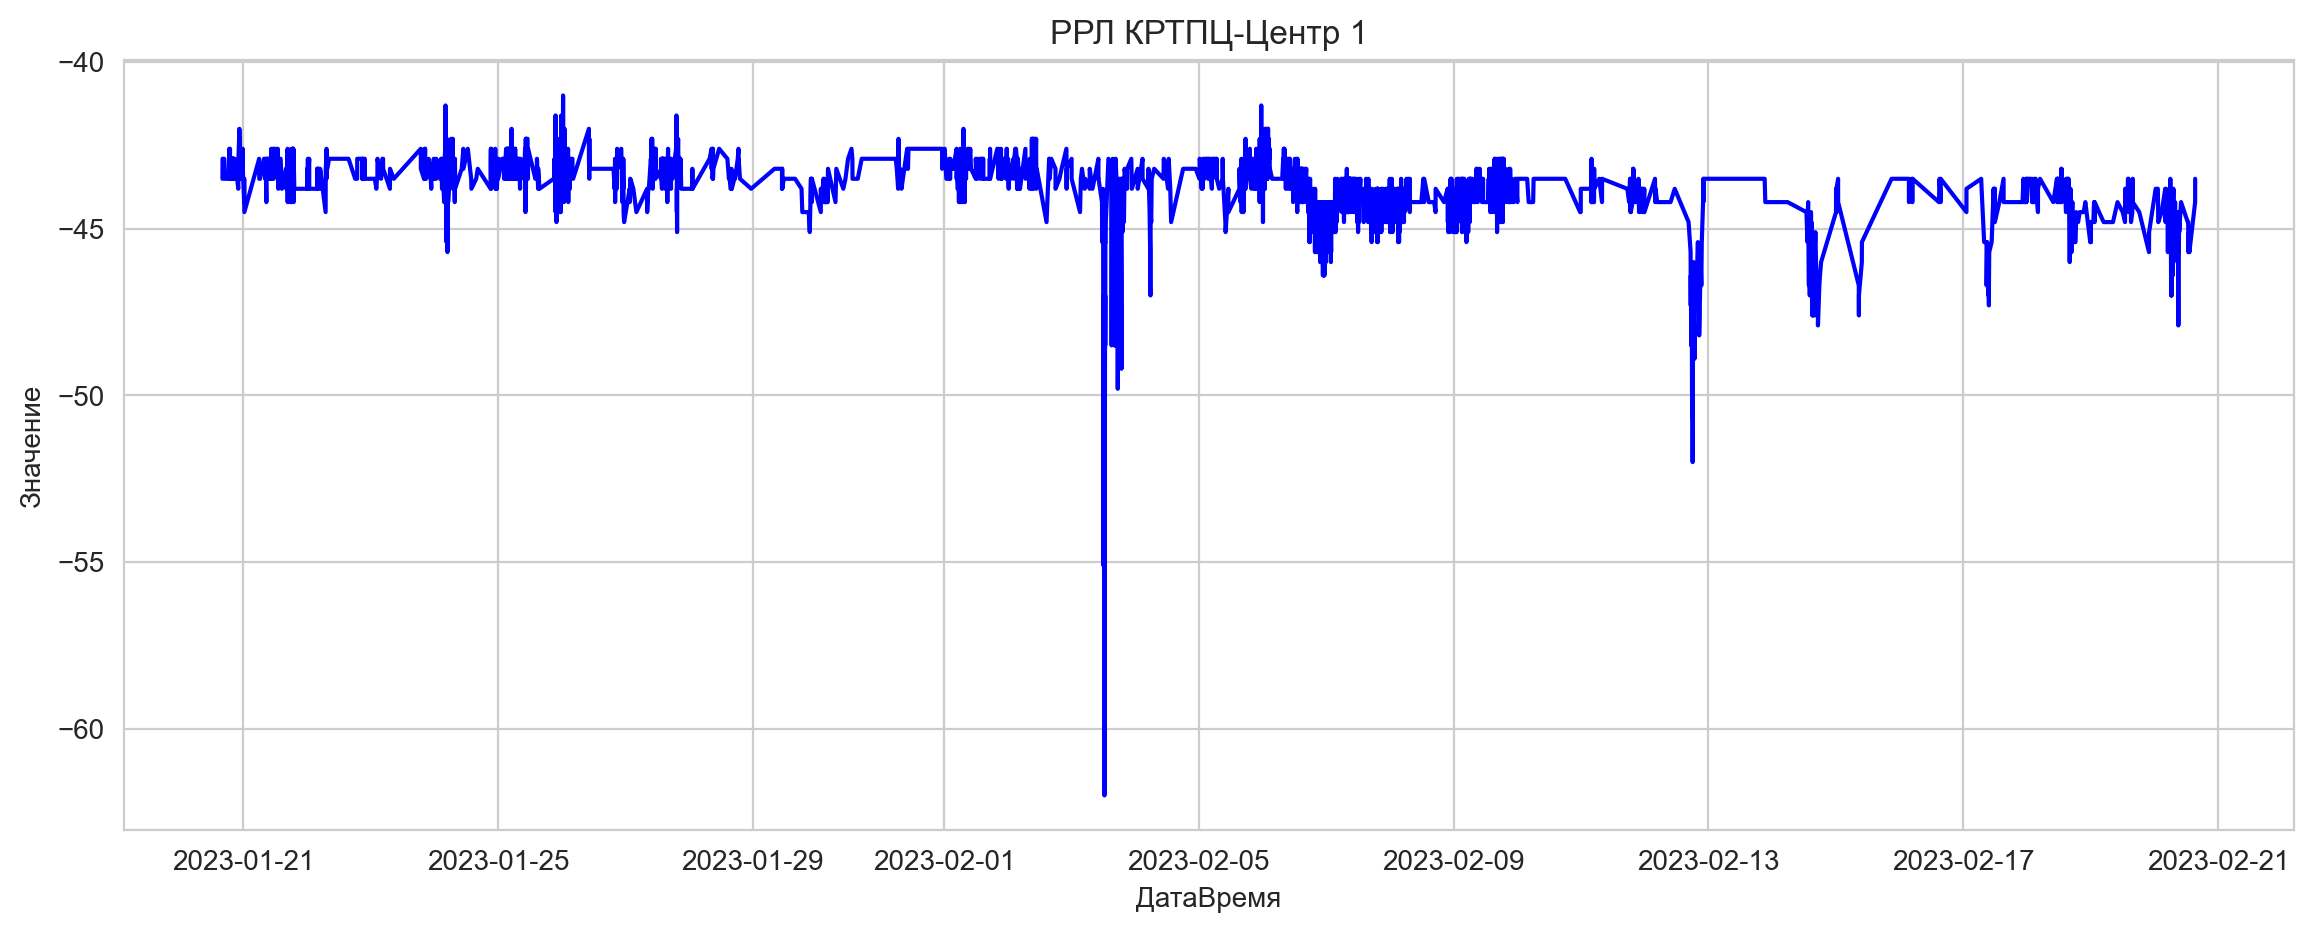

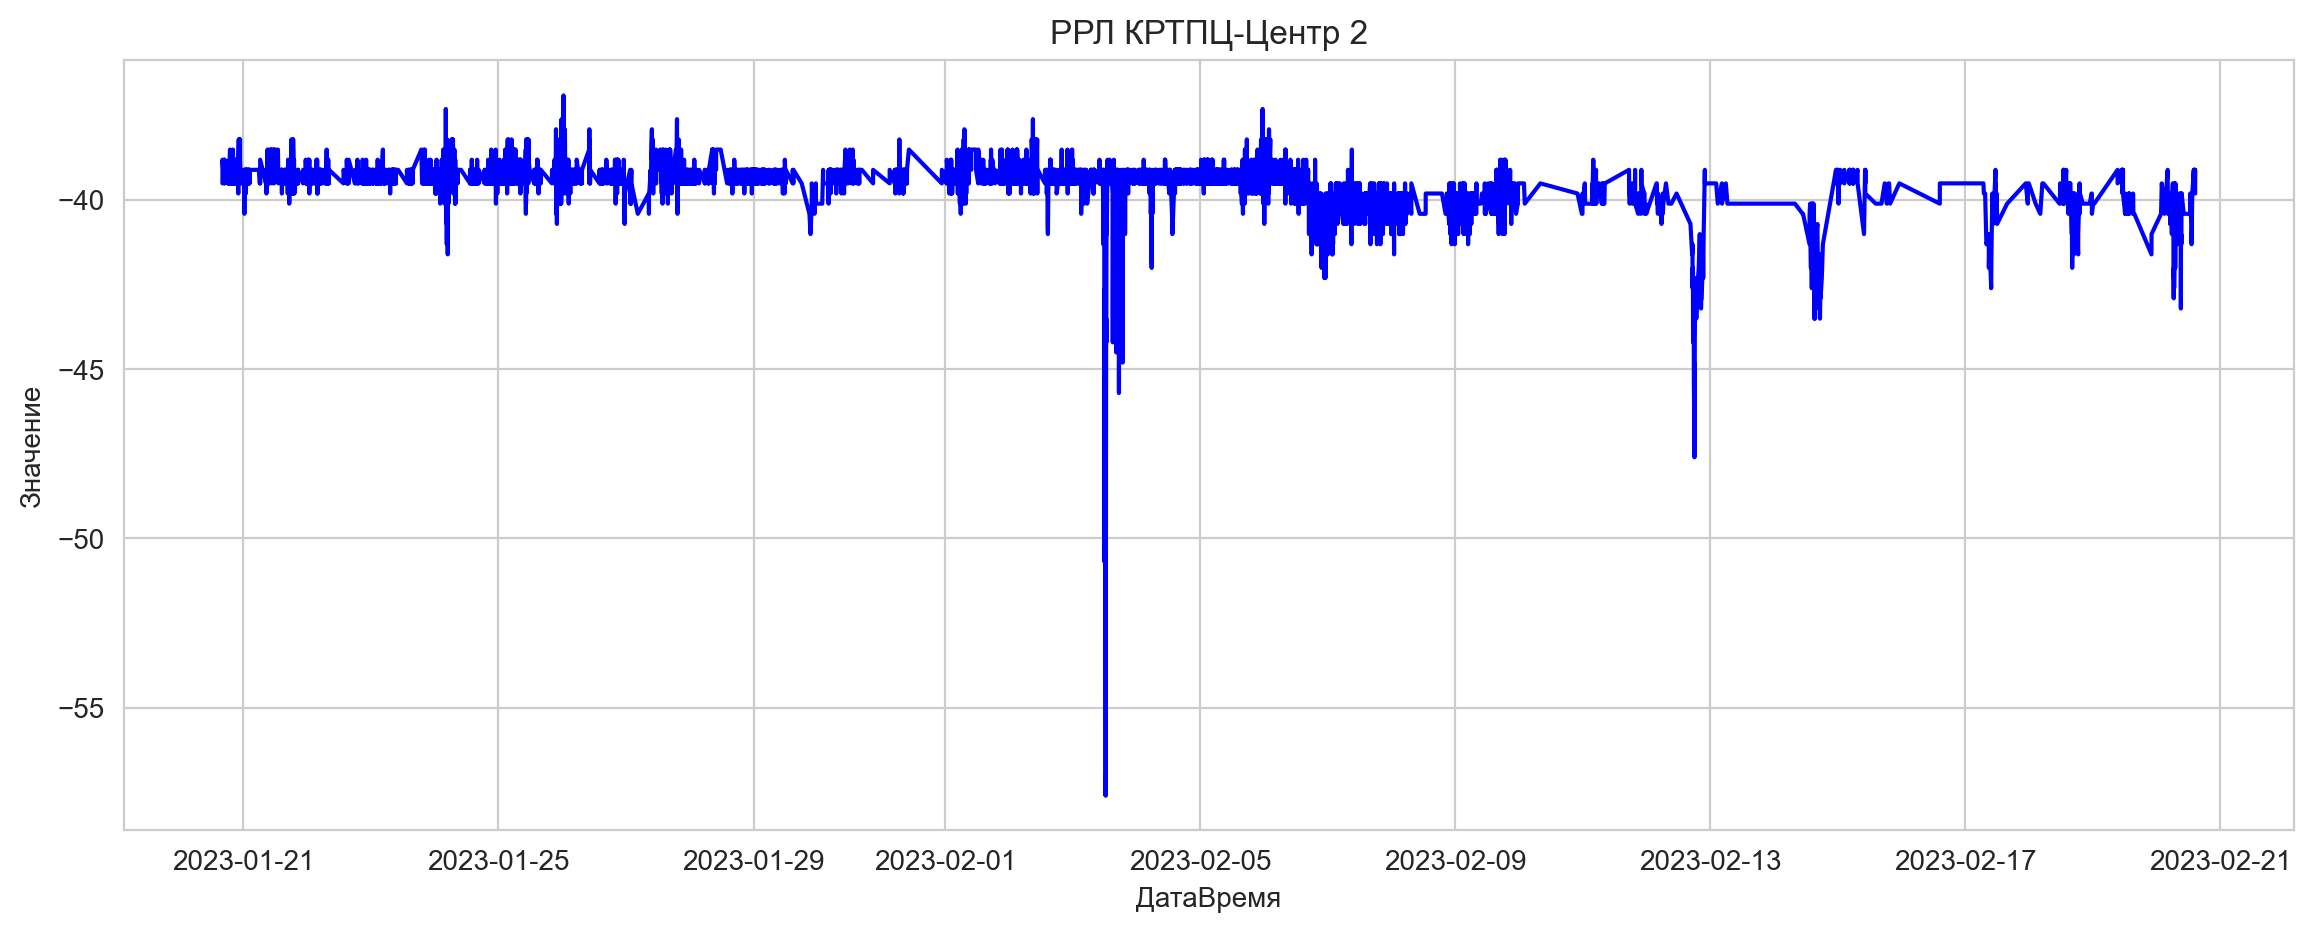

In [88]:
for i in range (0, len(spisok_df1)):
    get_plot1(spisok_df1,colors1,spisok_title1)
    

### Интервалы между записями в БД сигнала РРЛ между ЦСУДС и КРТПЦ.

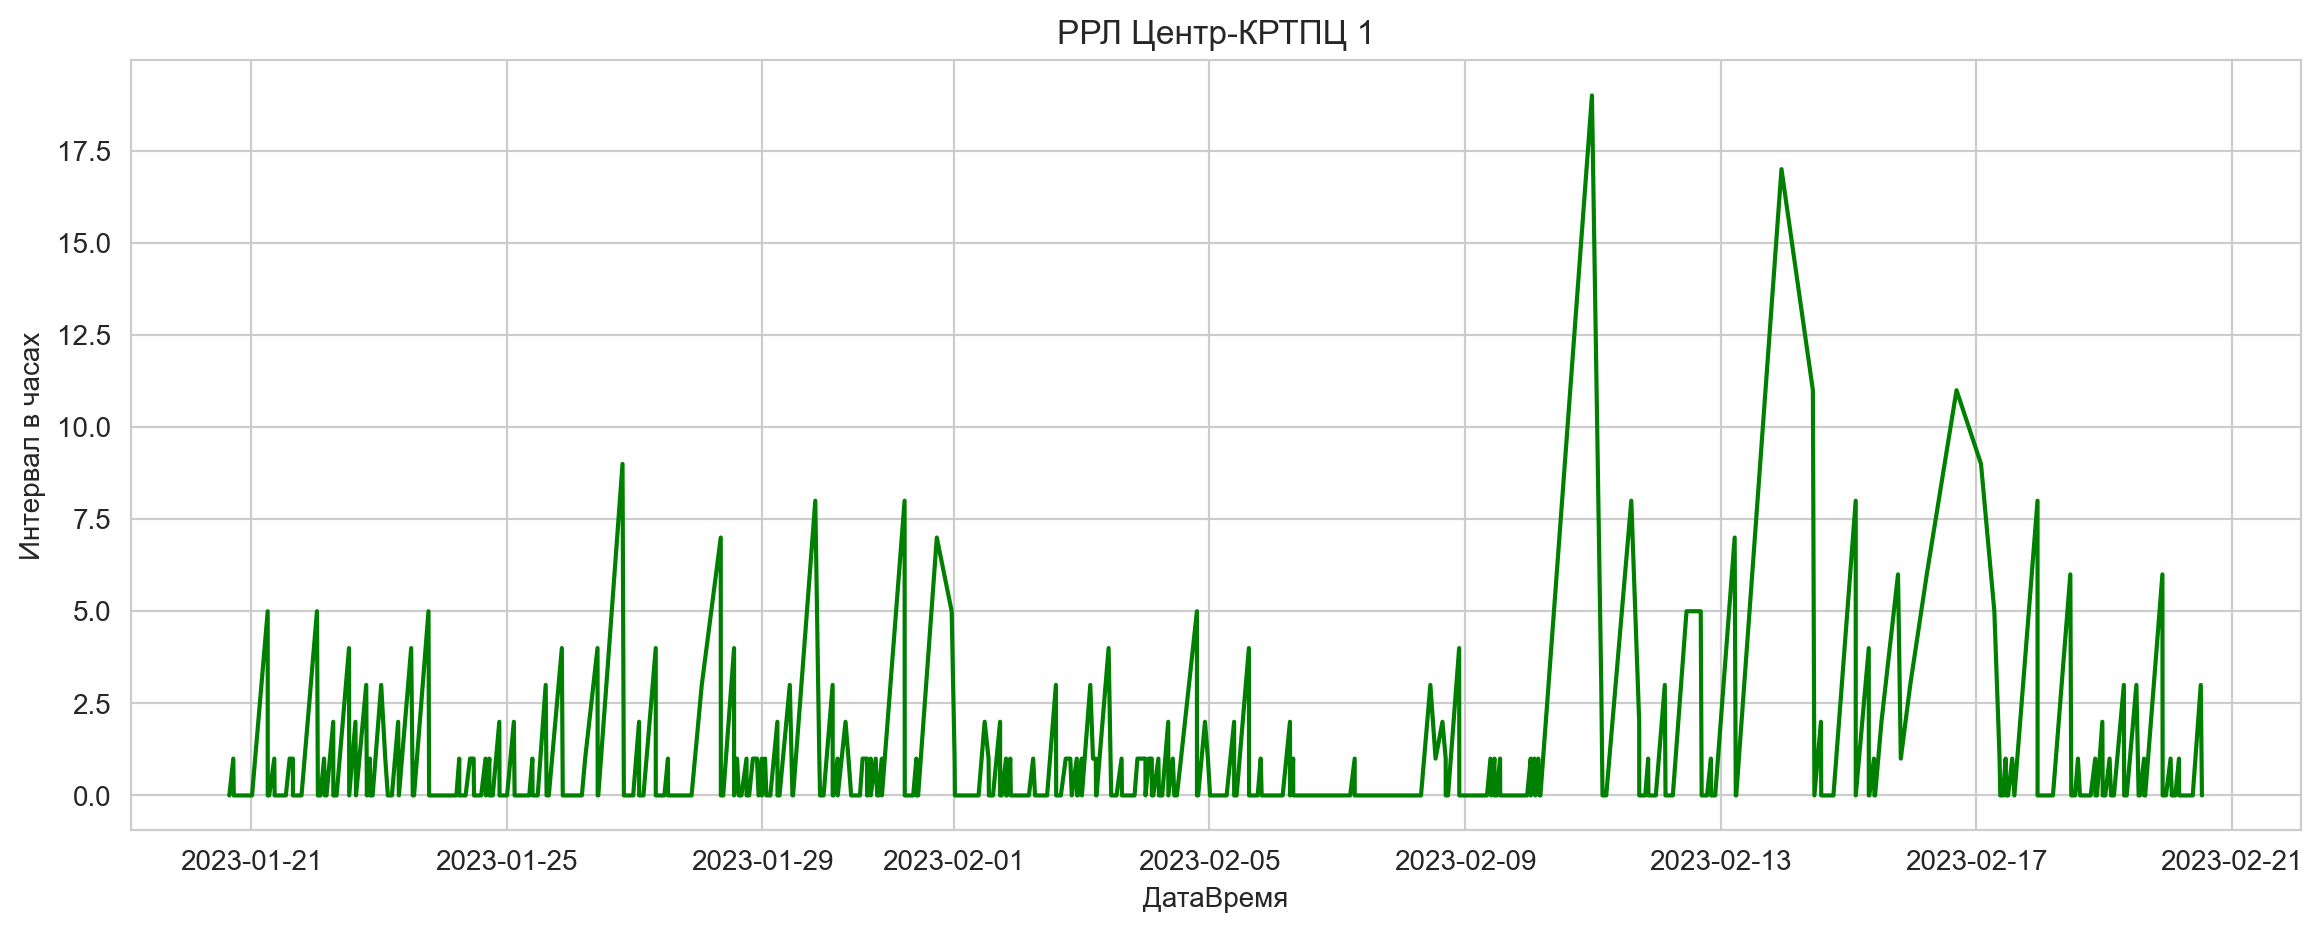

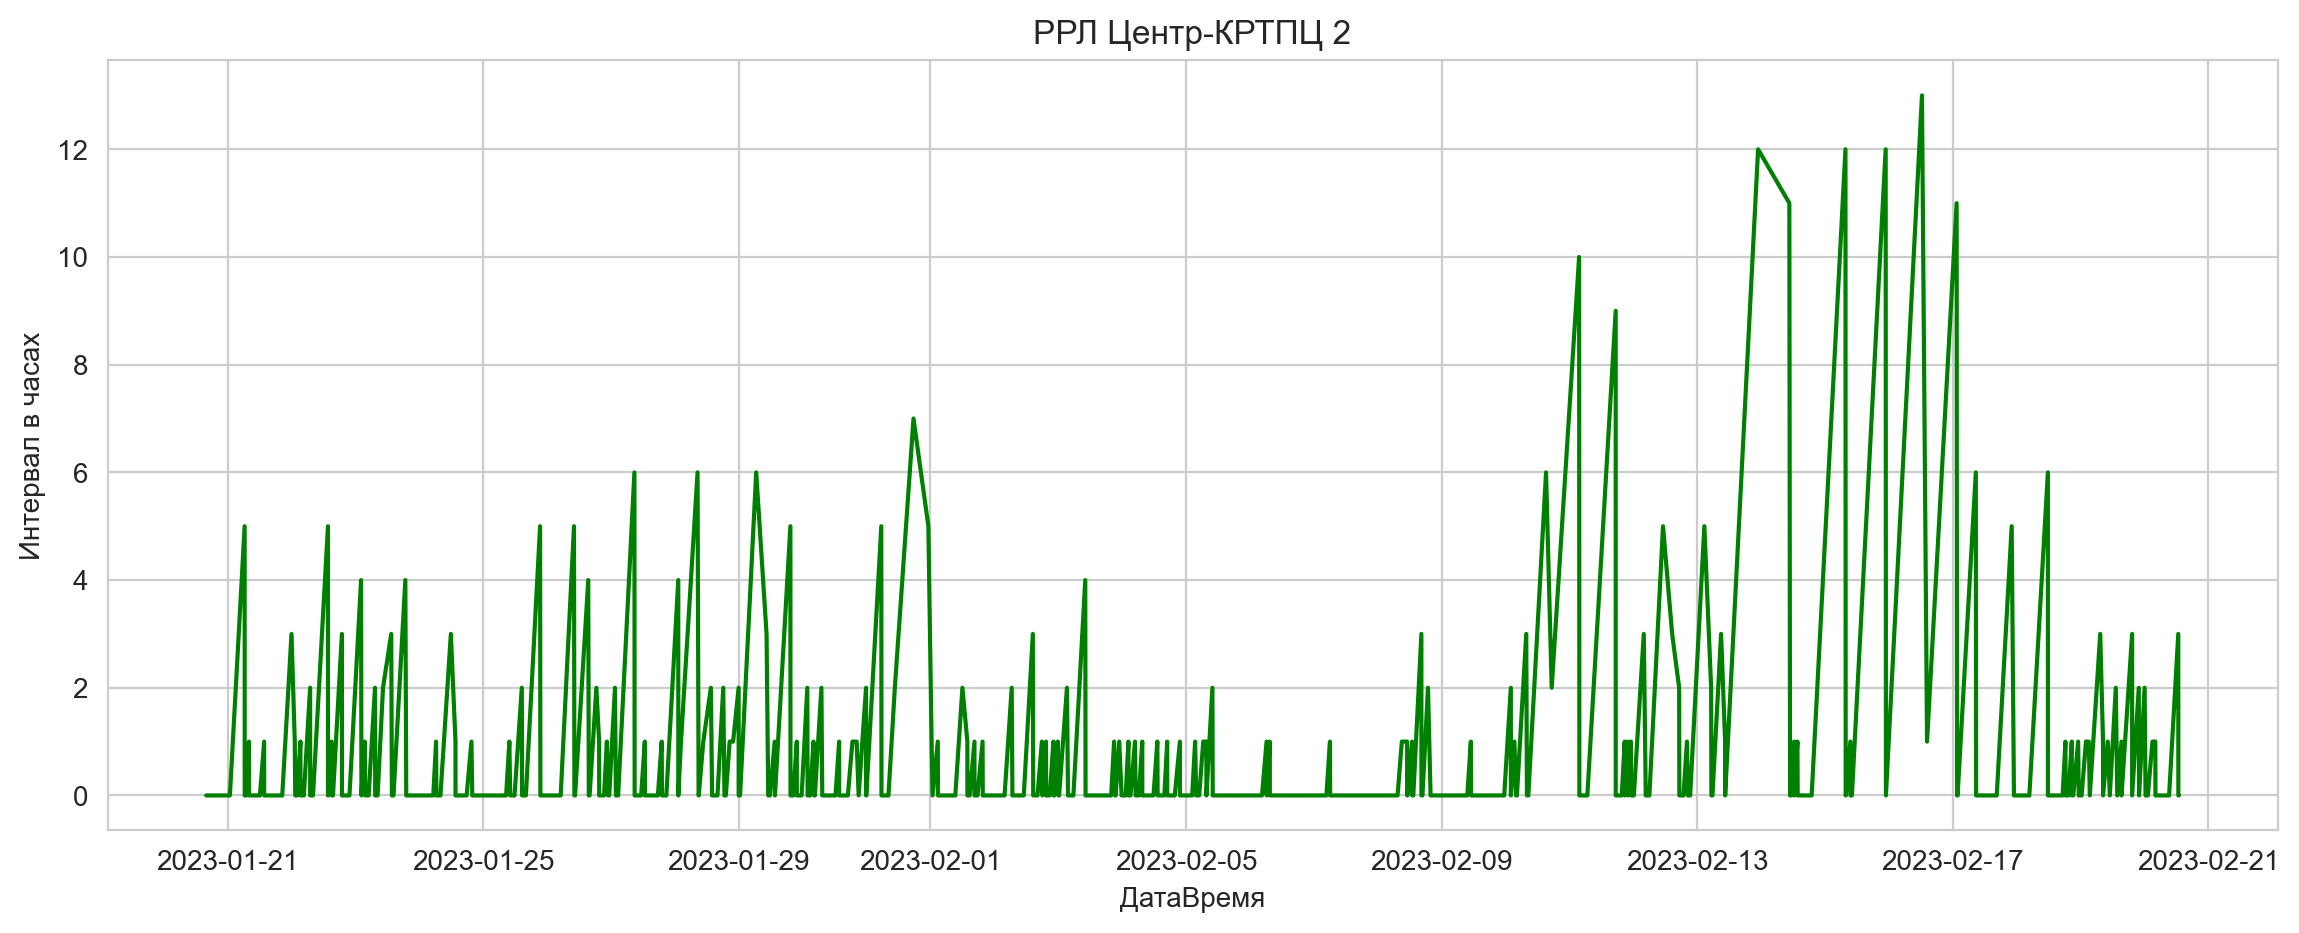

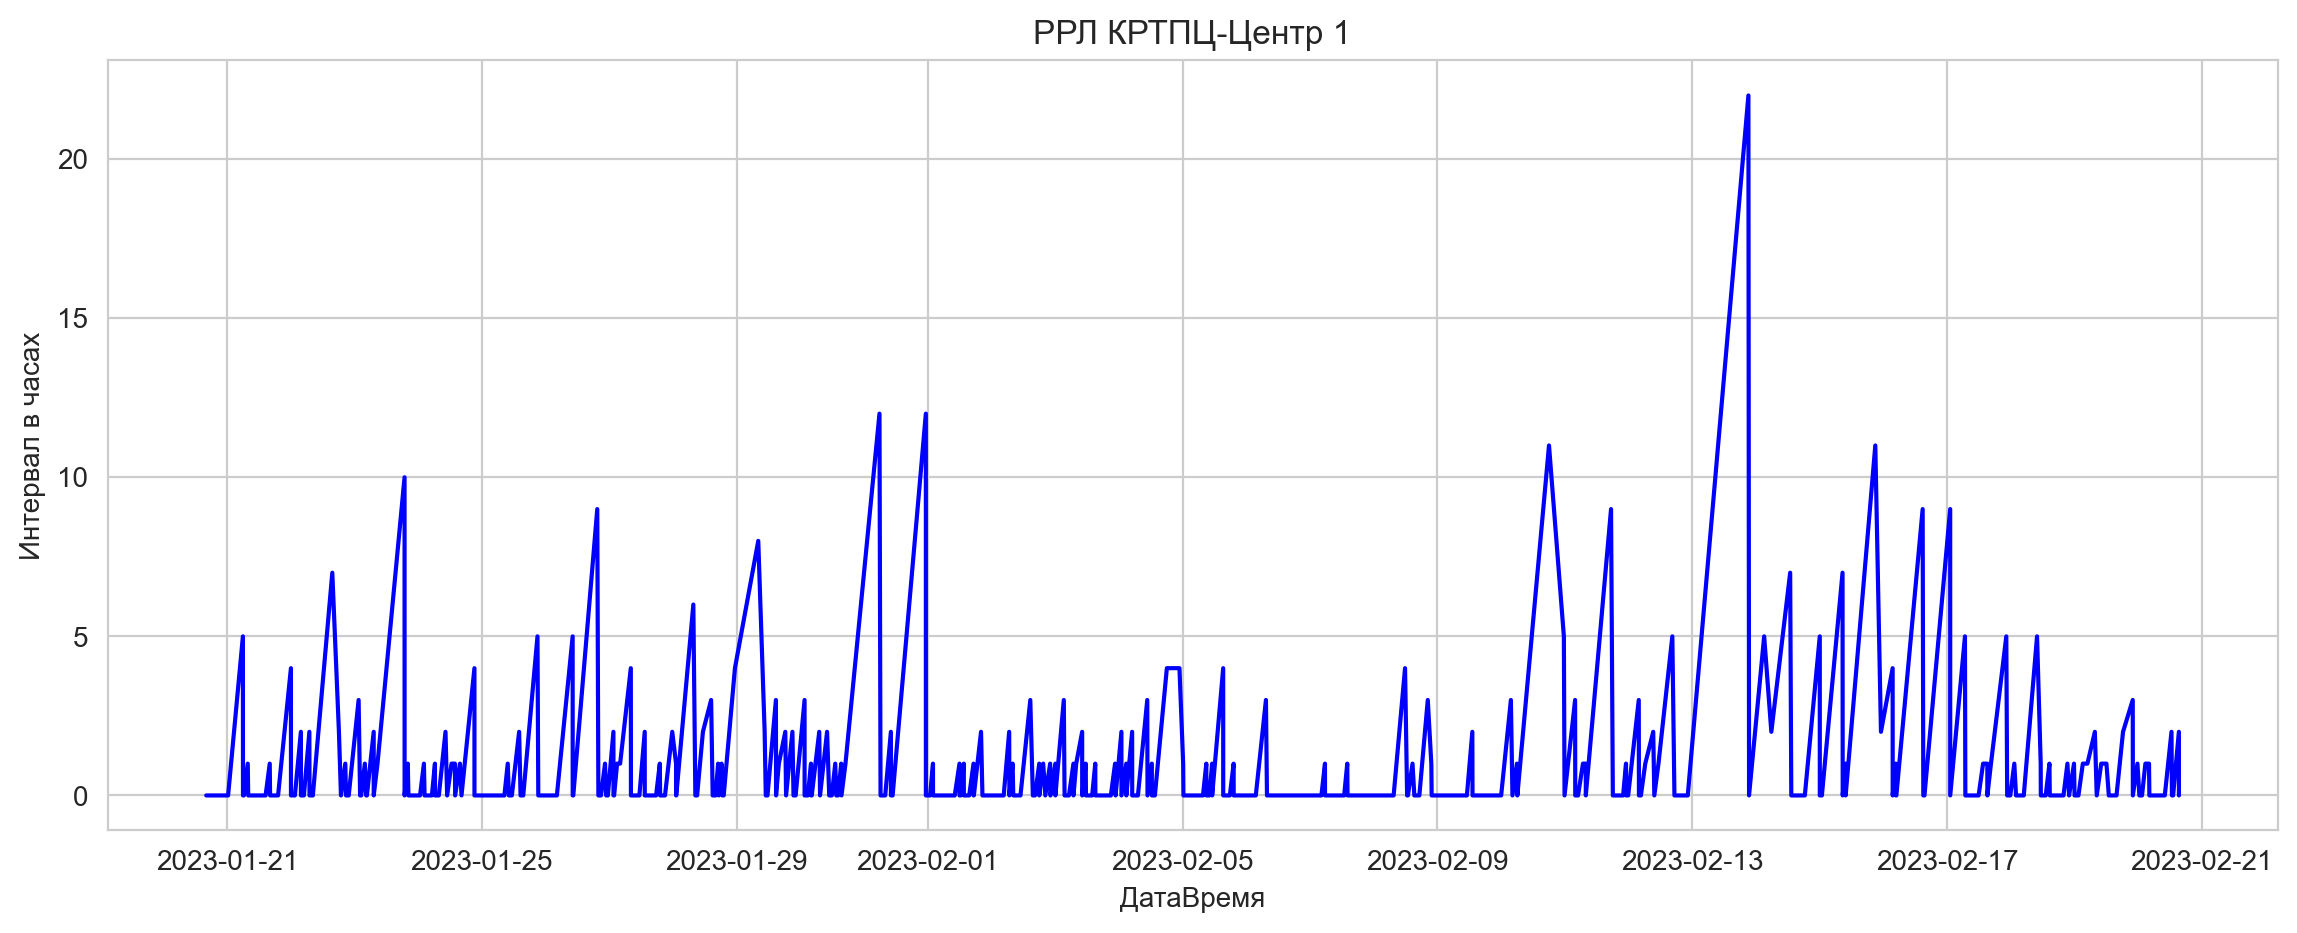

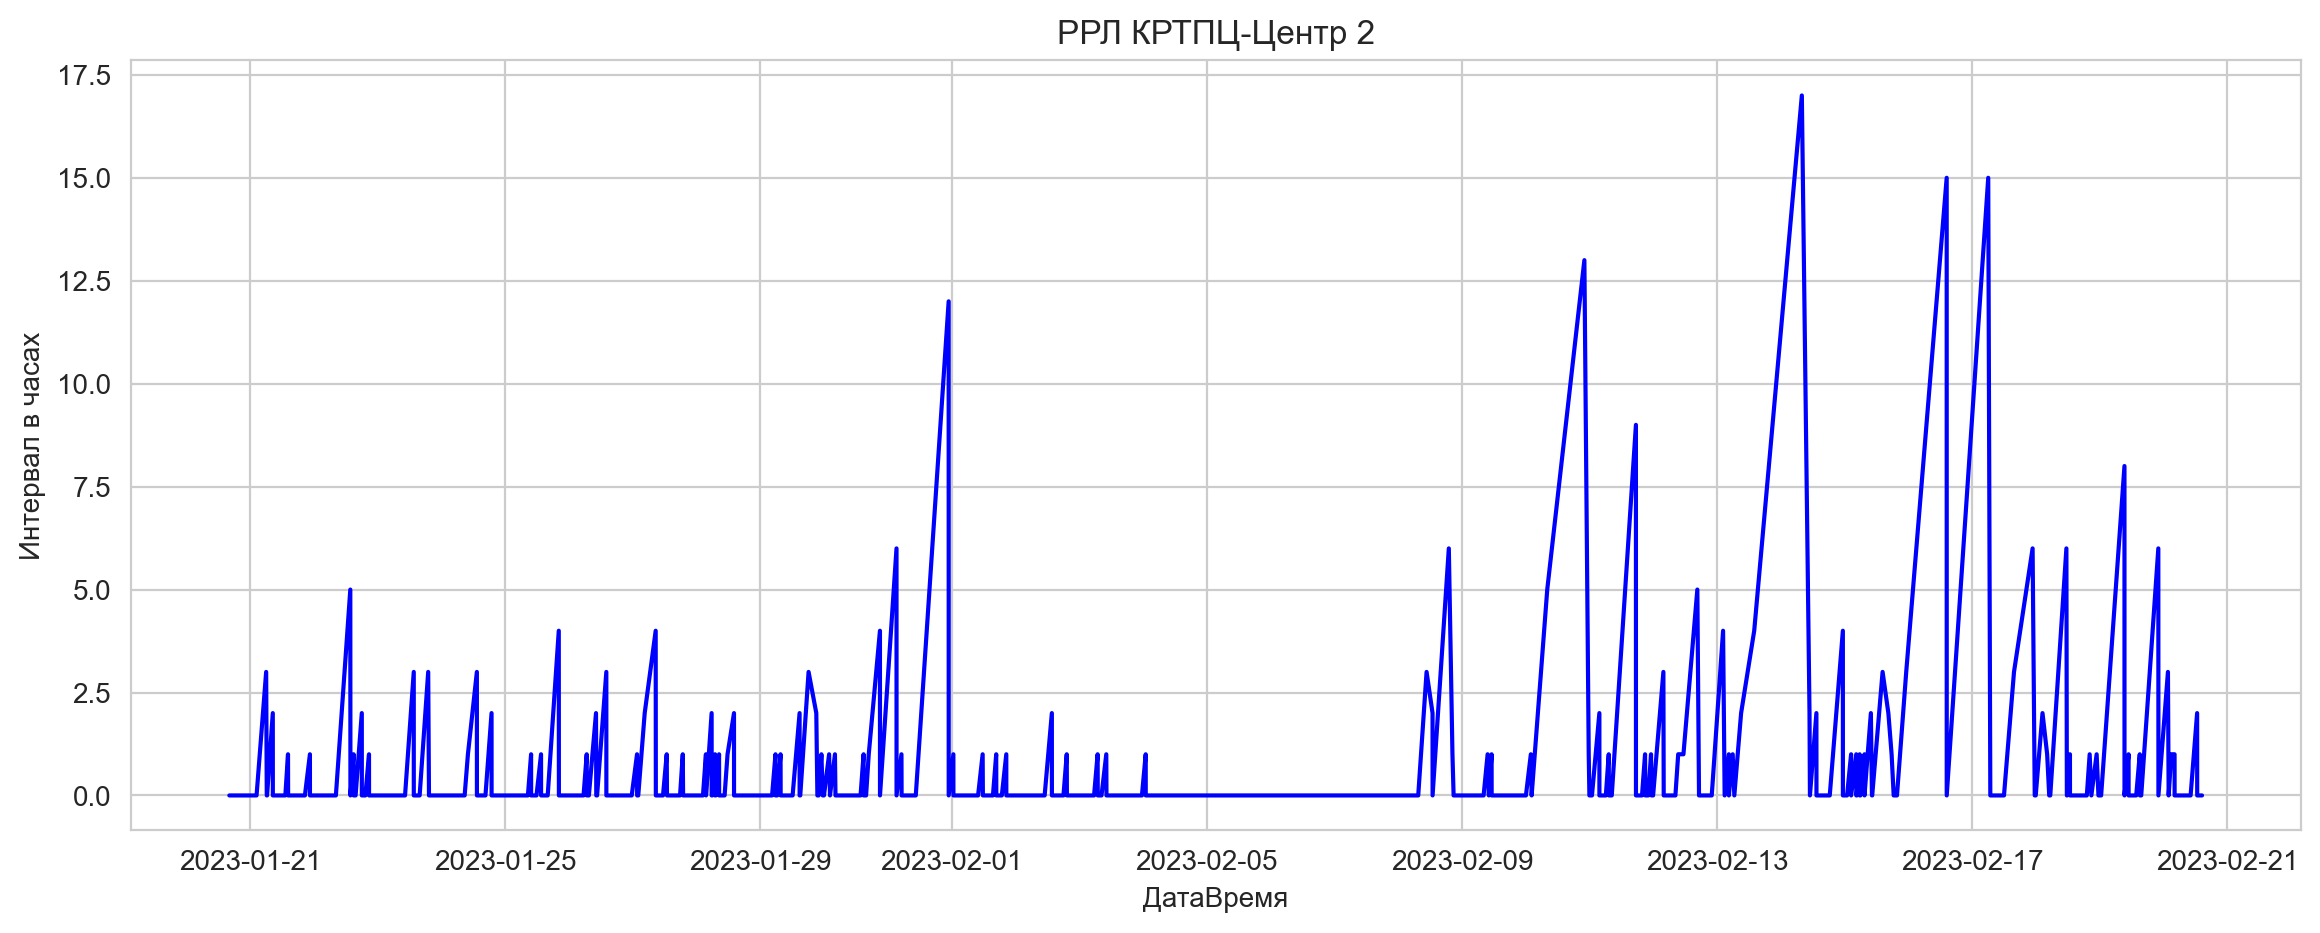

In [89]:
for i in range (0, len(spisok_df1)):
    get_plot1_int(spisok_df1,colors1,spisok_title1)
    

### Уровни сигнала РРЛ между Абрау и КРТПЦ.

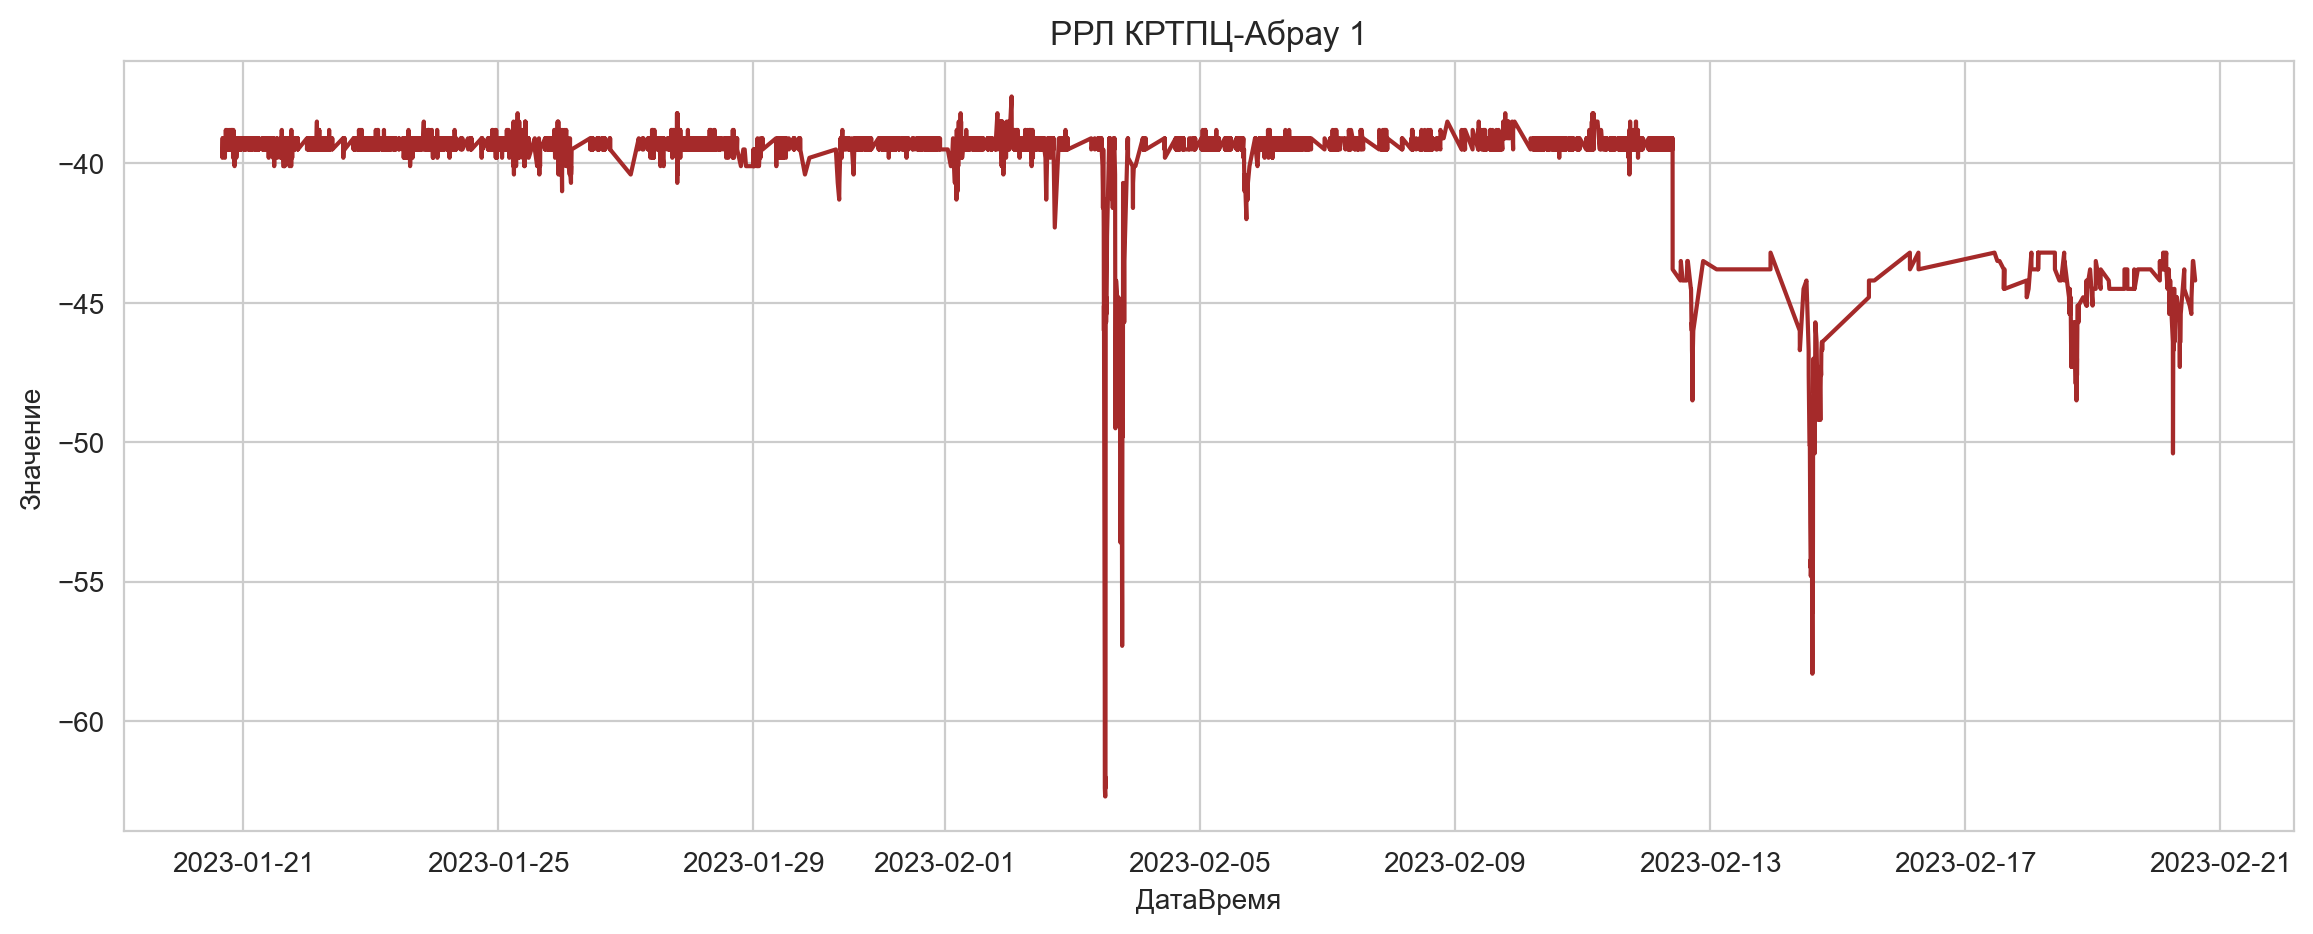

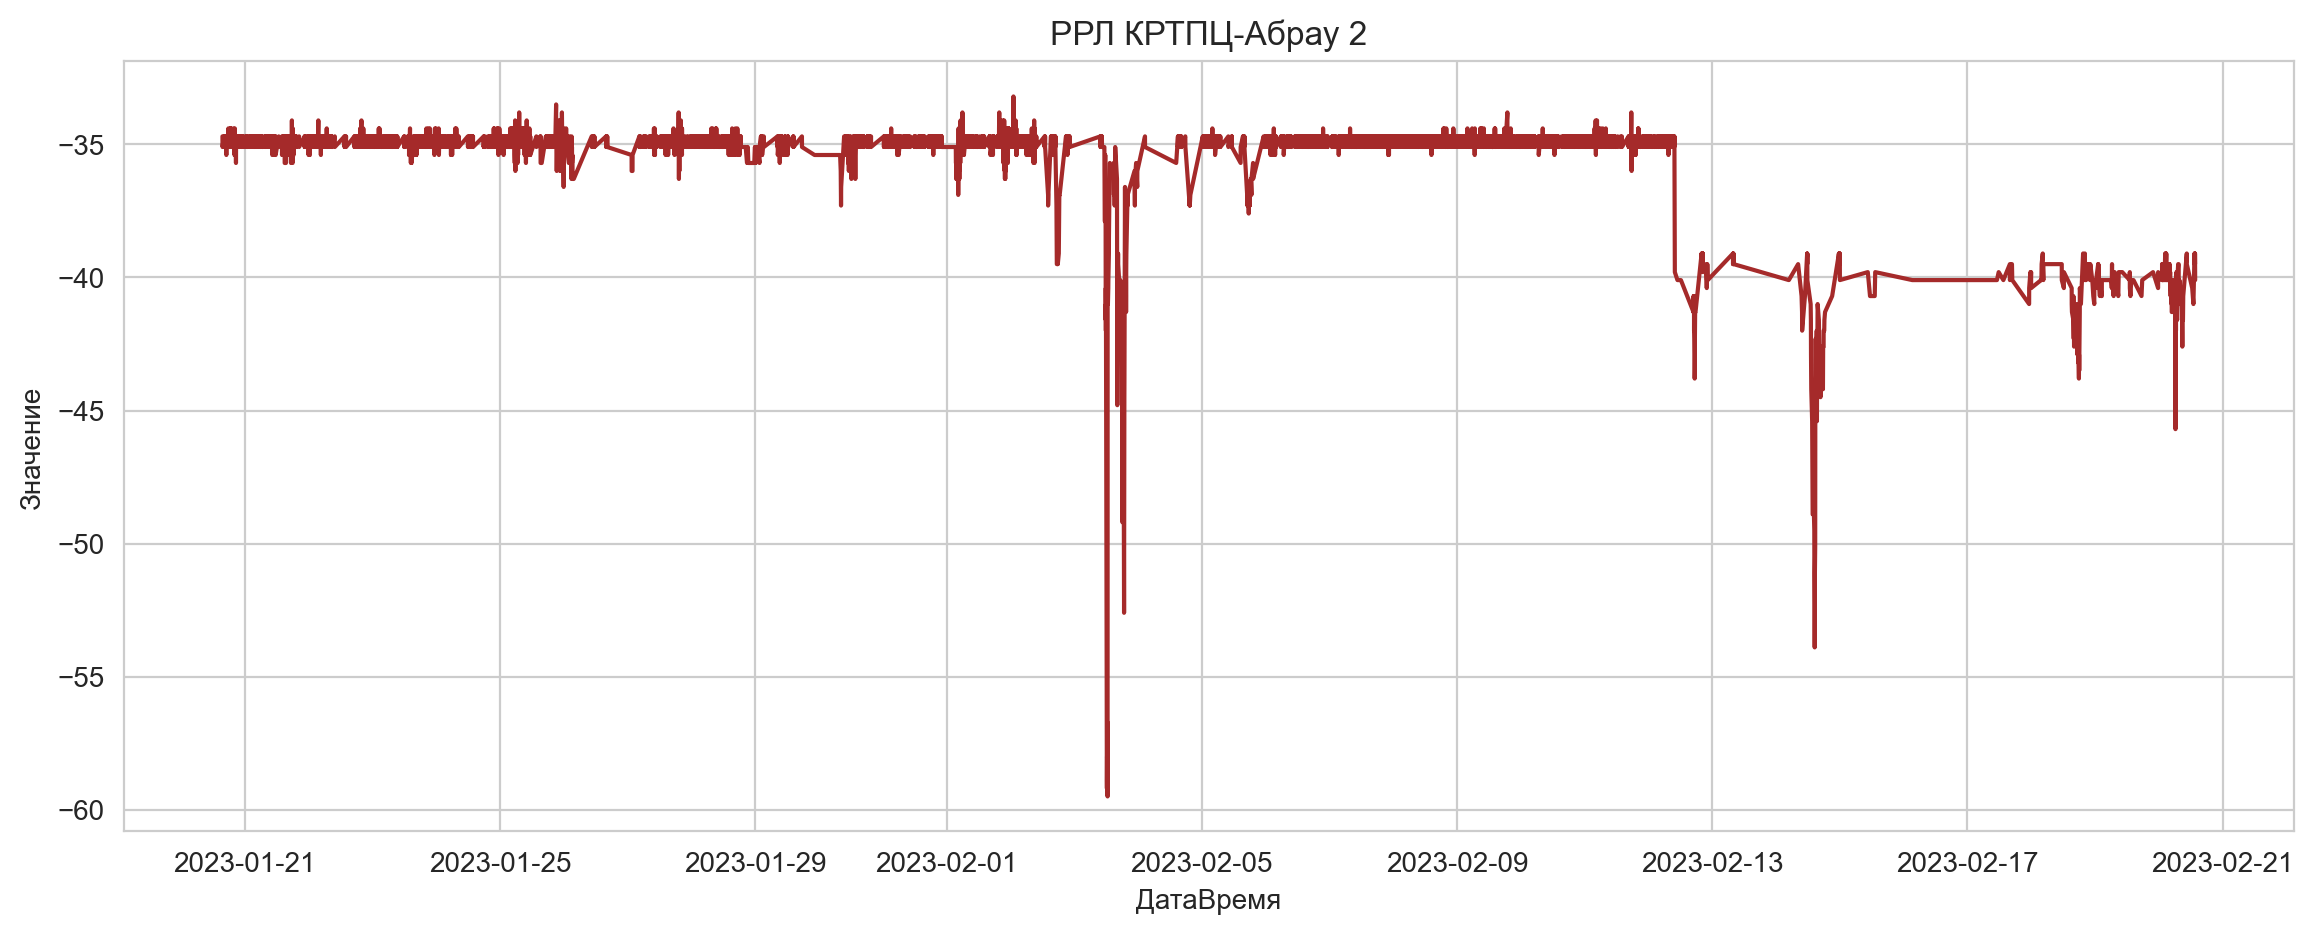

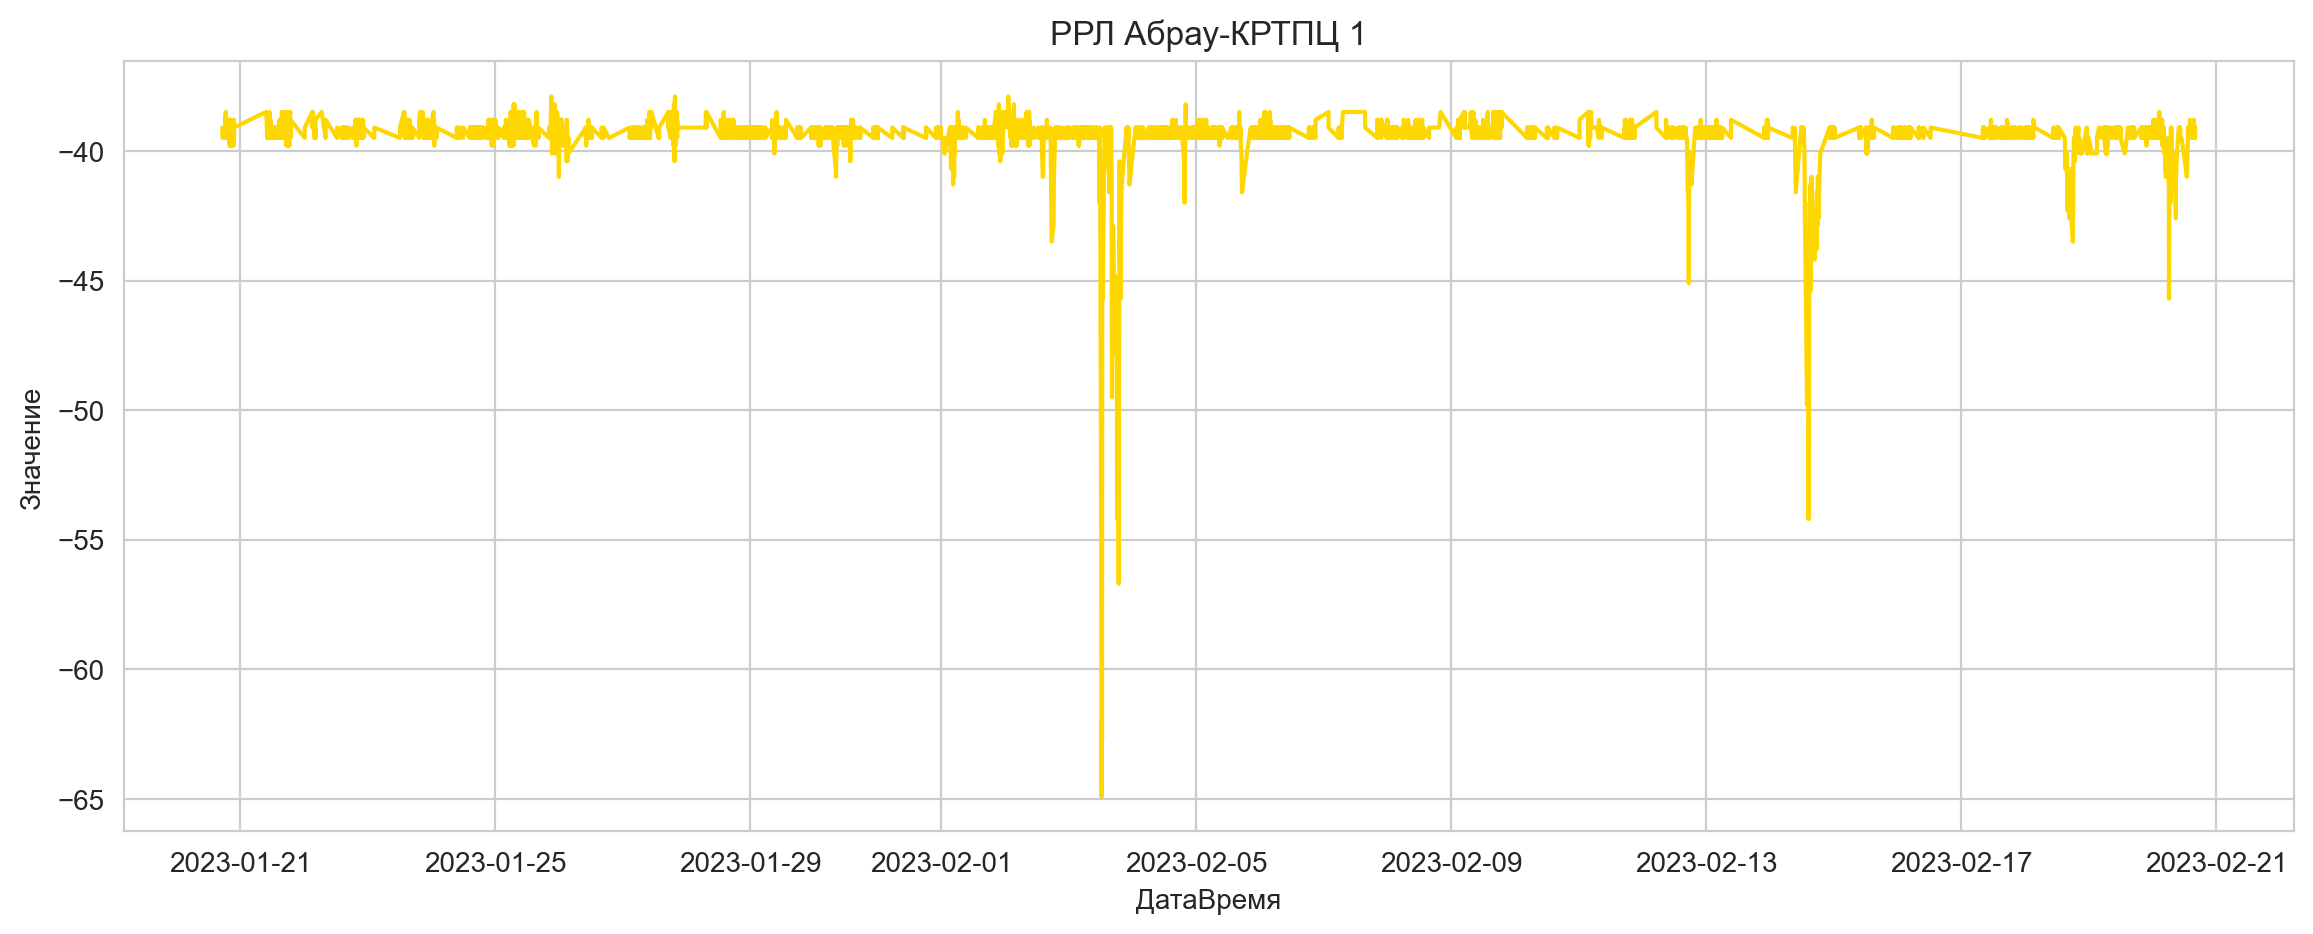

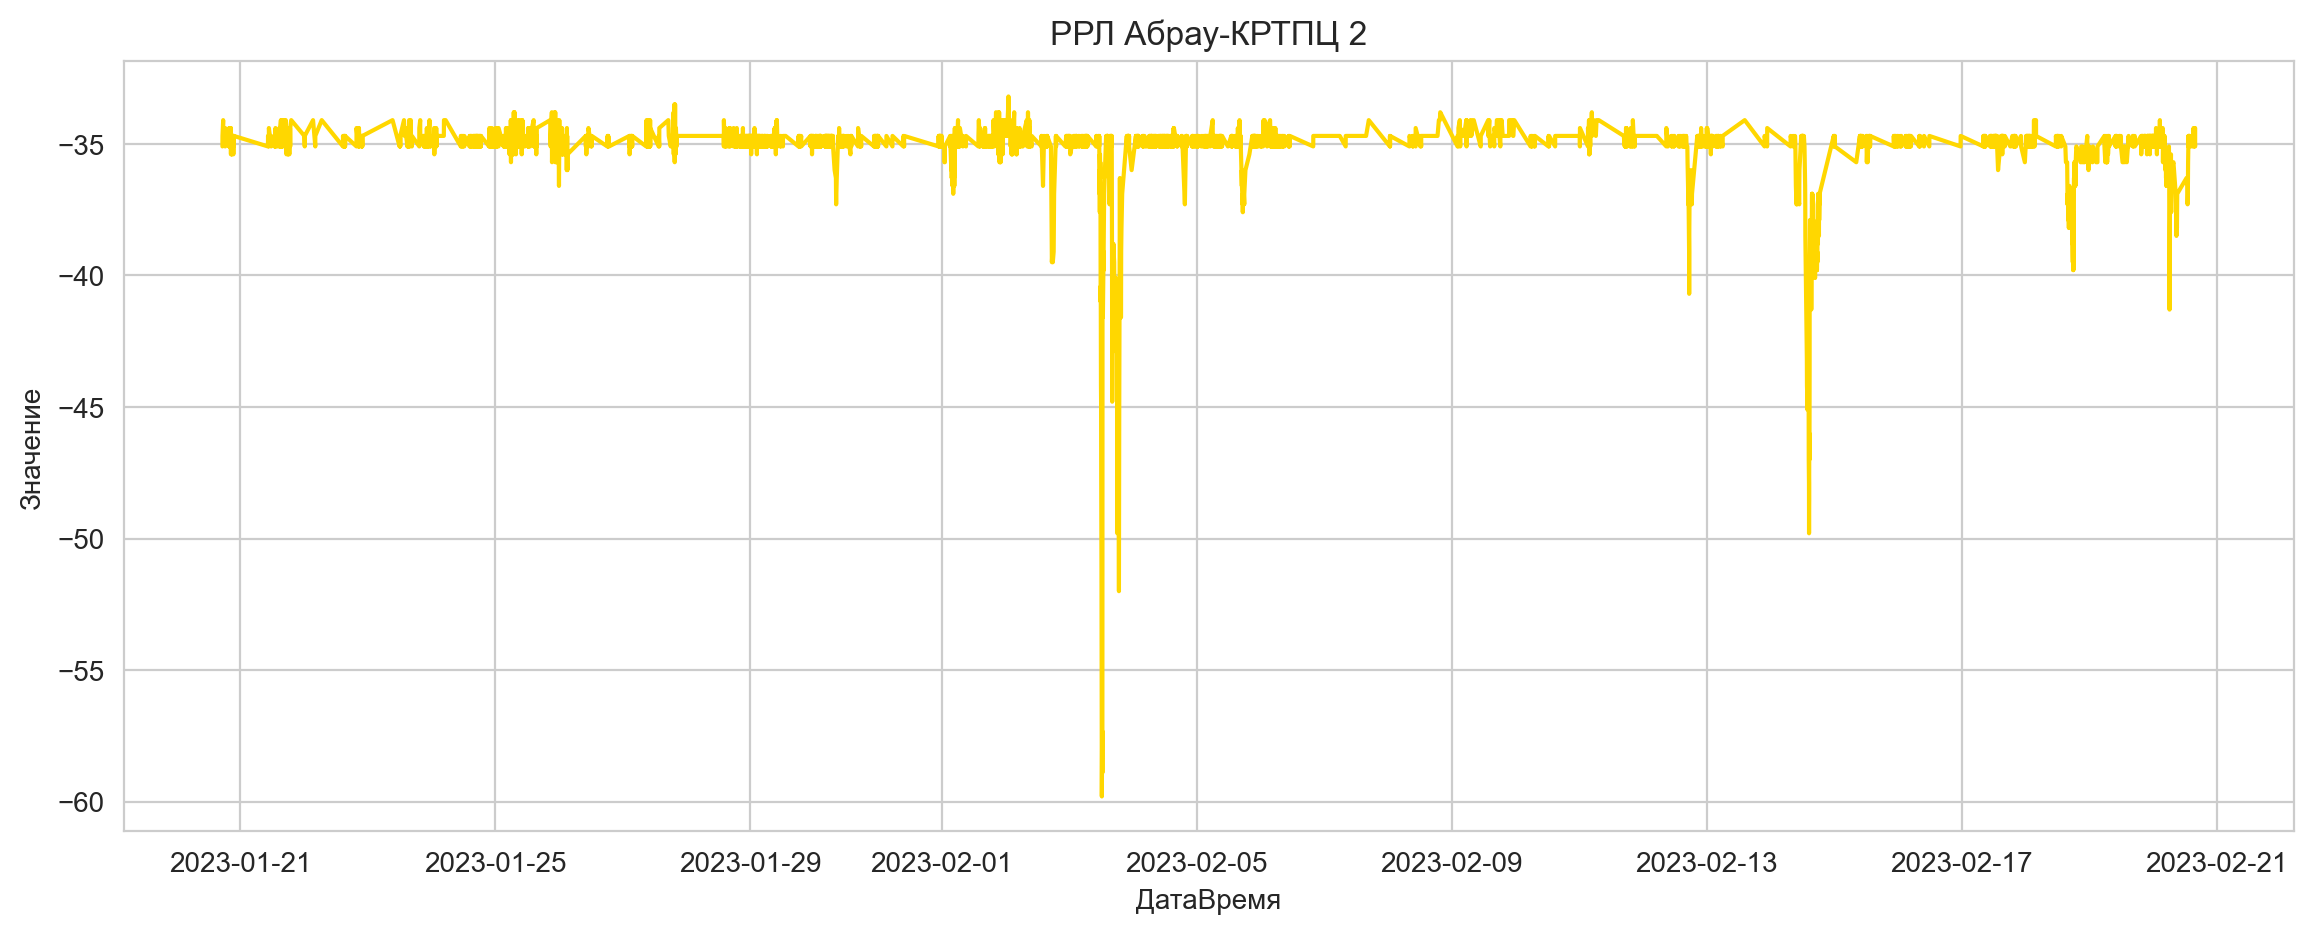

In [90]:
for i in range (0, len(spisok_df2)):
    get_plot1(spisok_df2,colors2,spisok_title2)
    

### Интервалы между записями в БД сигнала РРЛ между Абрау и КРТПЦ.

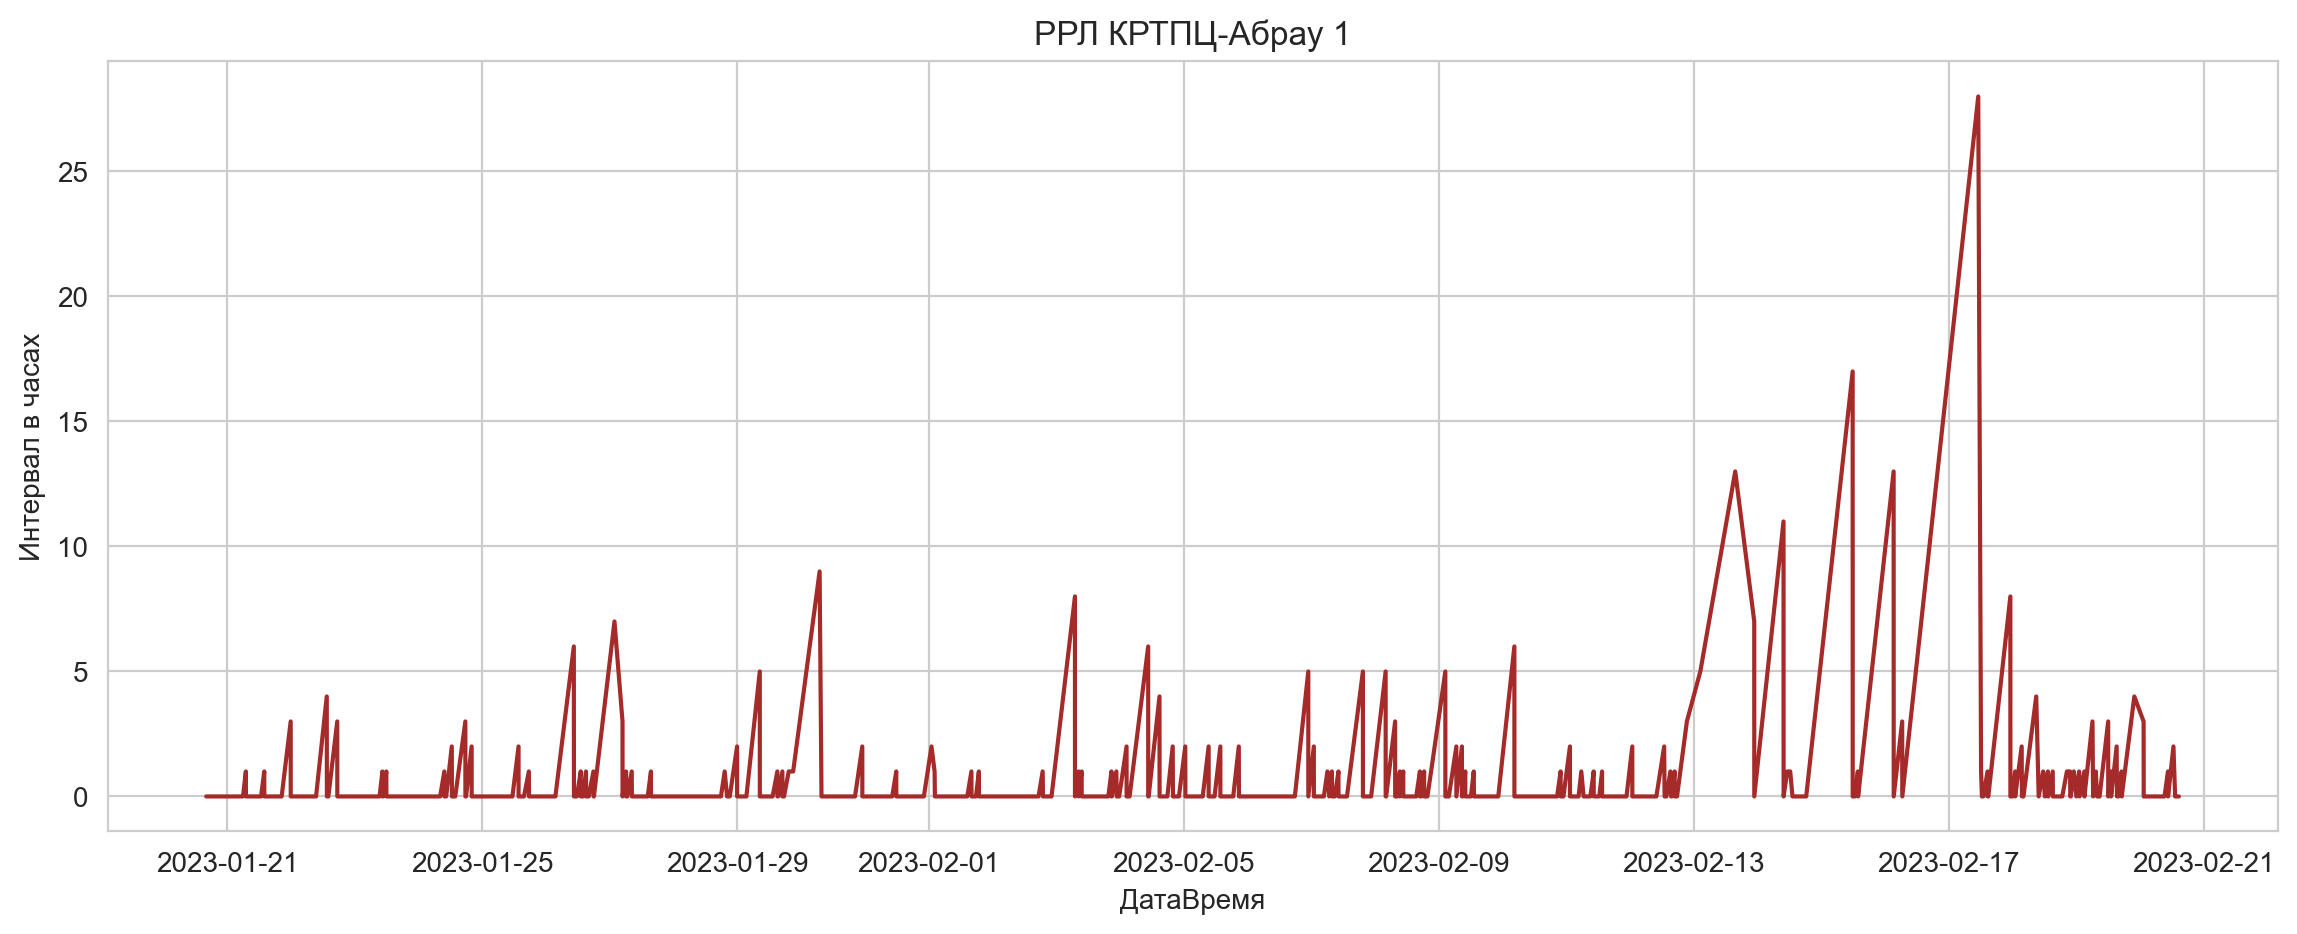

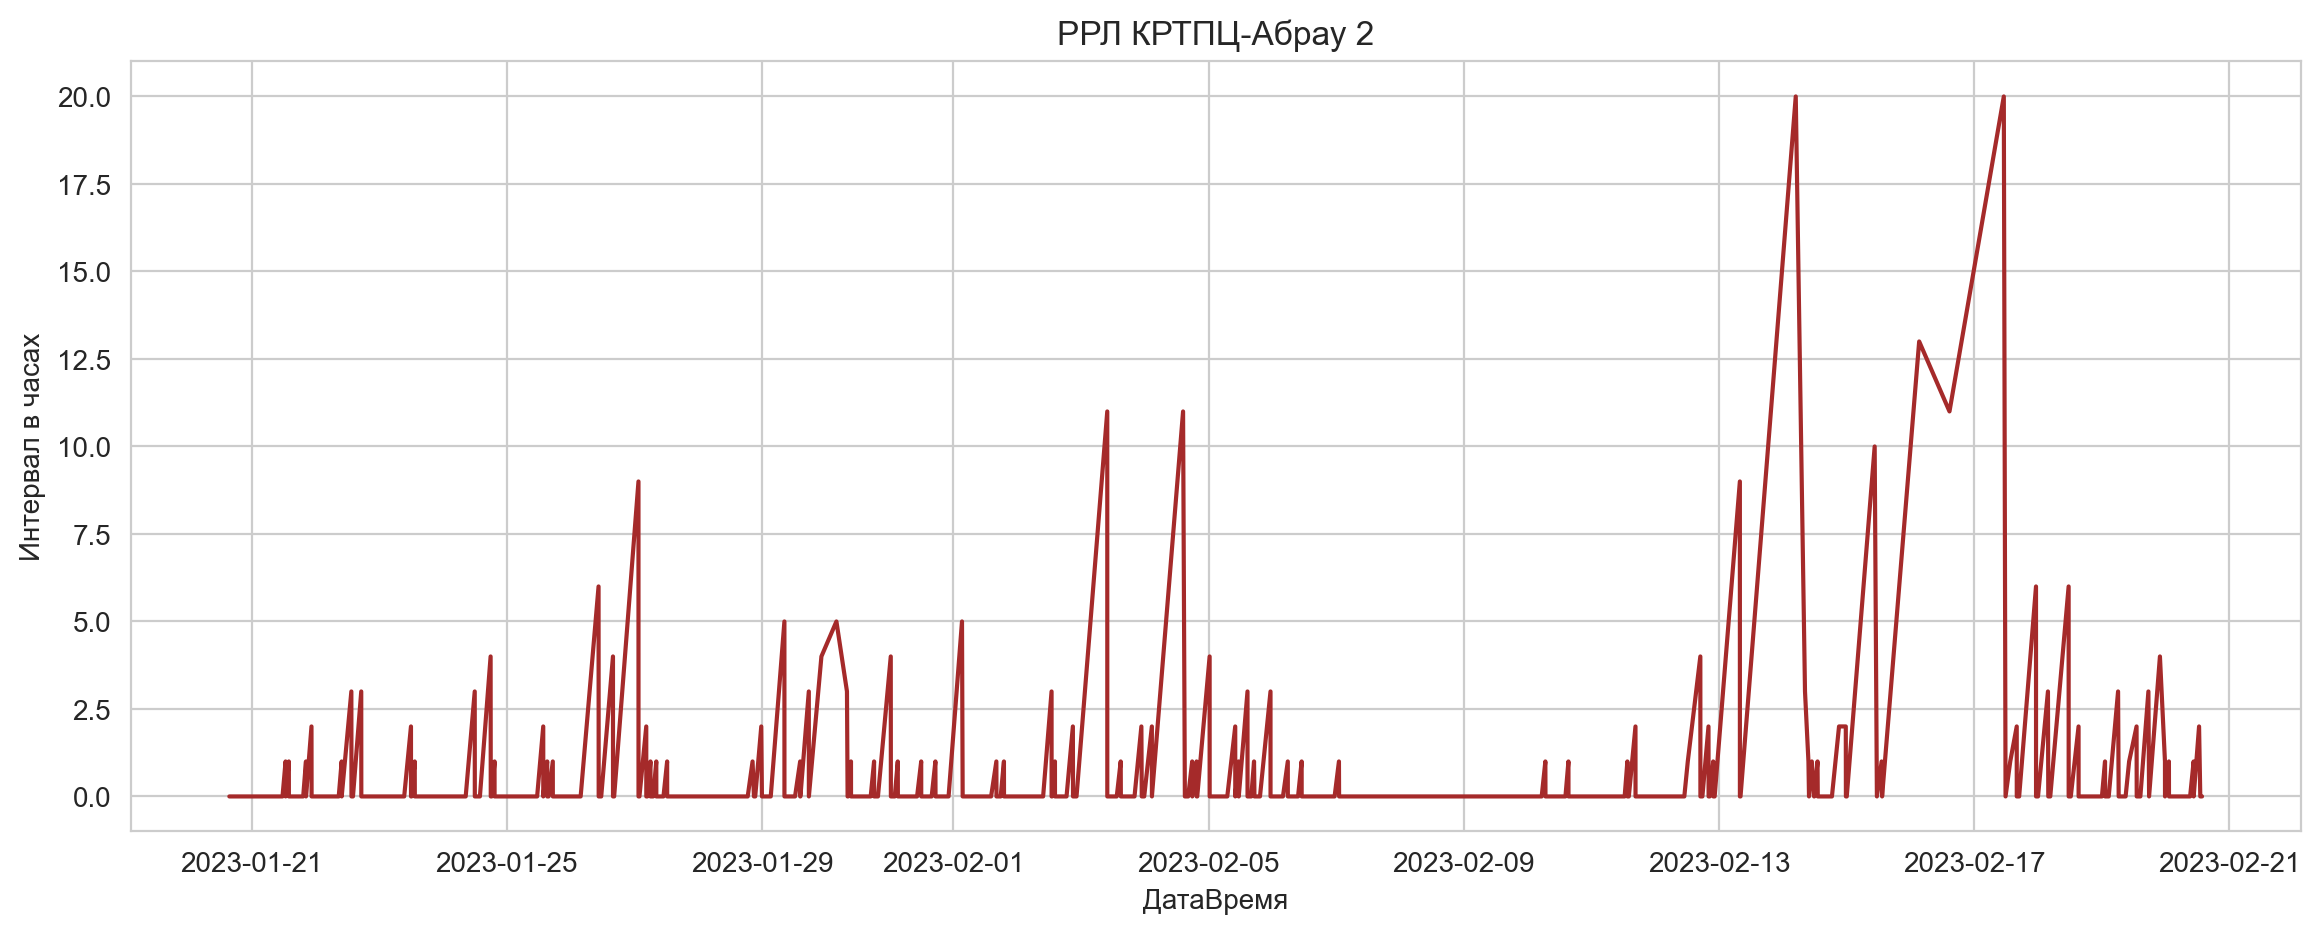

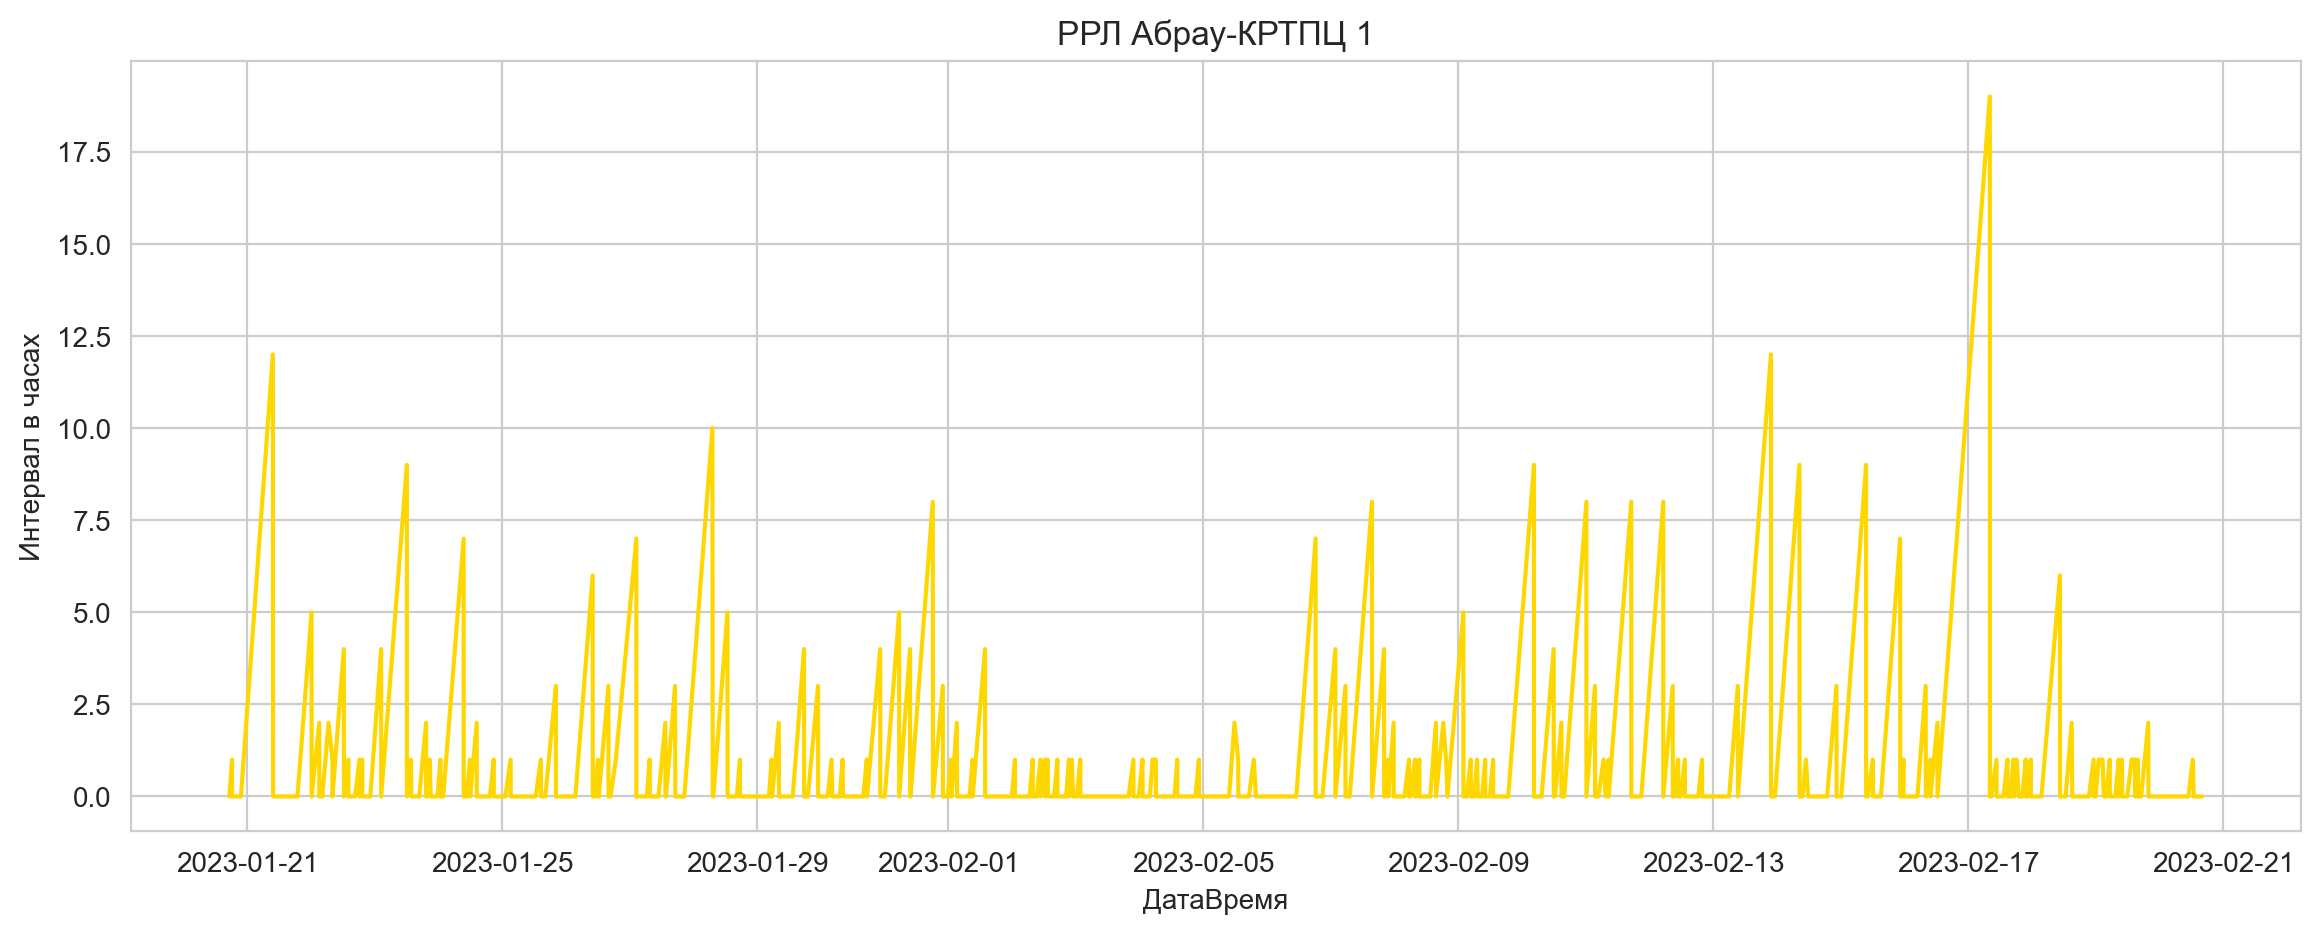

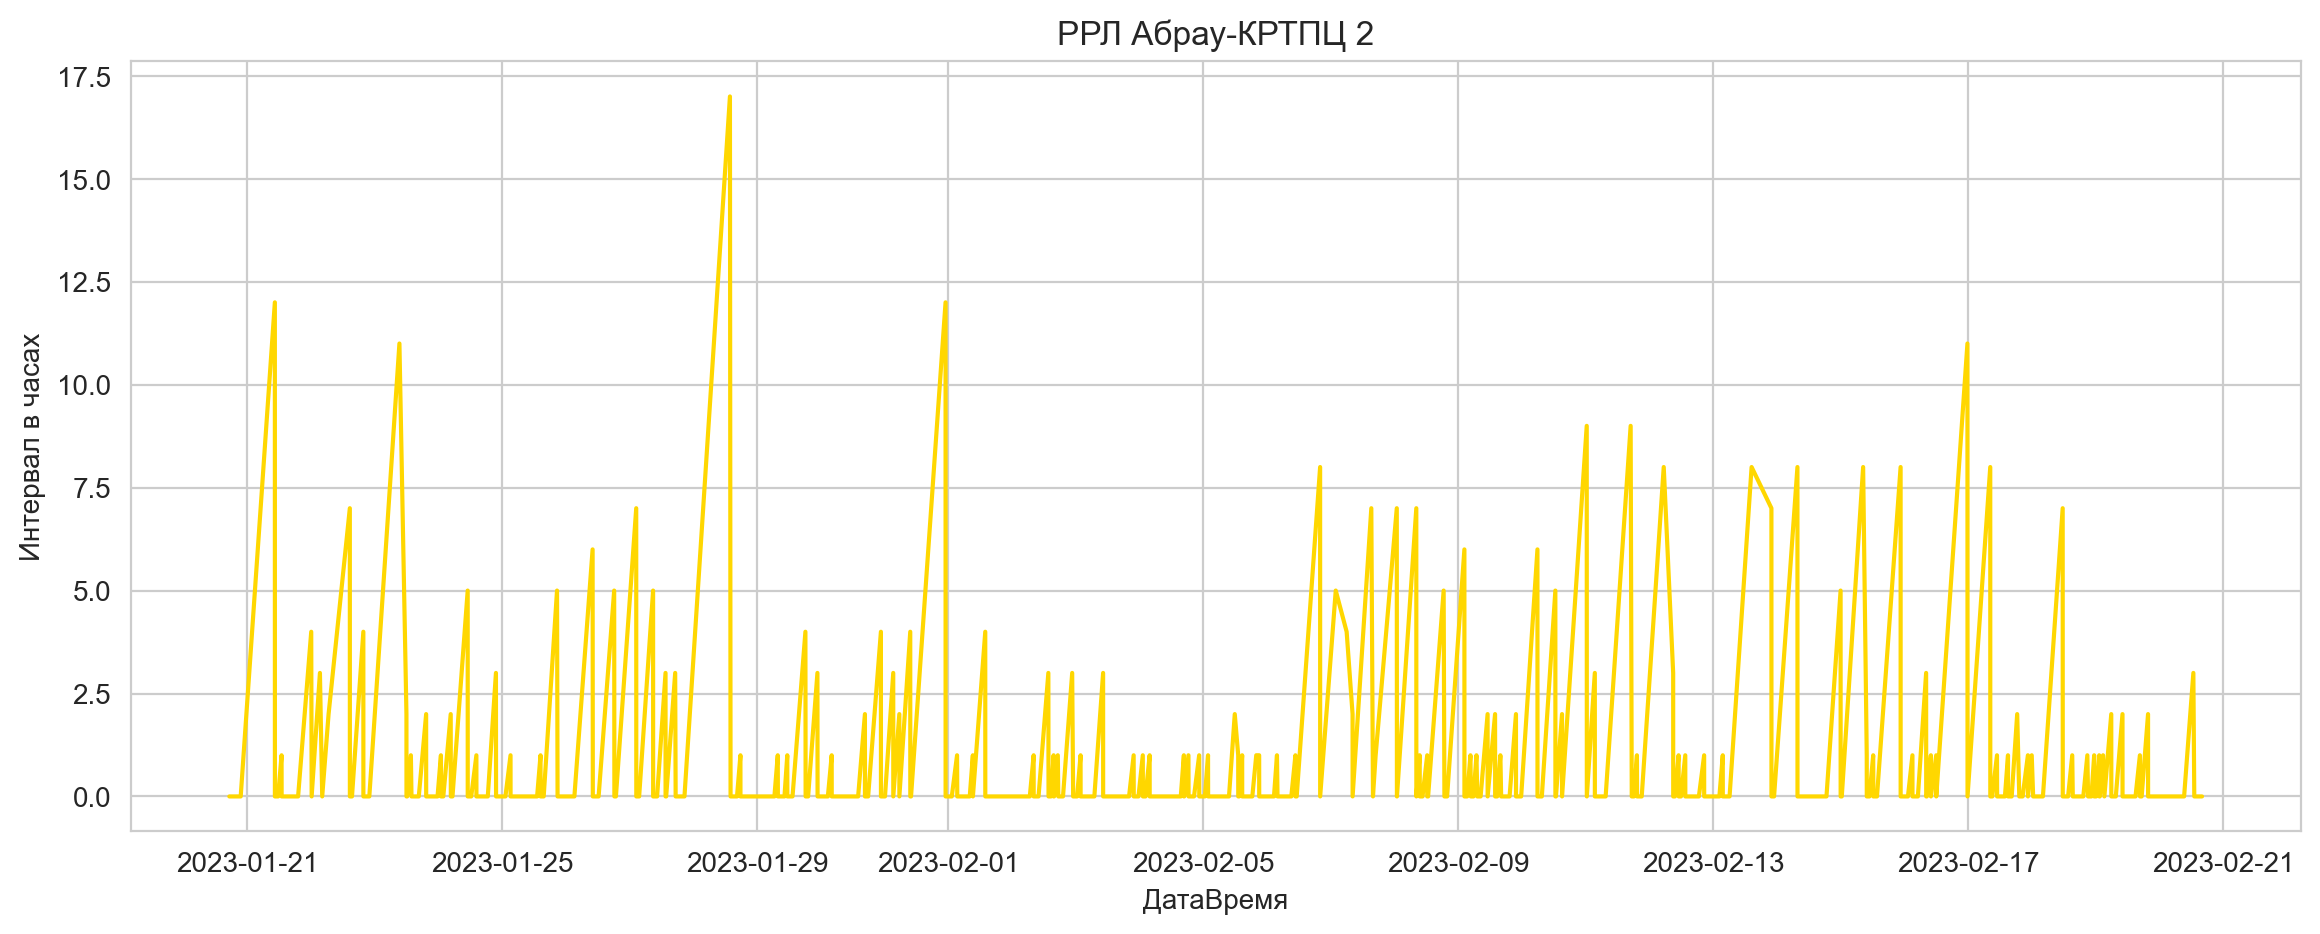

In [91]:
for i in range (0, len(spisok_df2)):
    get_plot1_int(spisok_df2,colors2,spisok_title2)
    

### Уровни сигнала РРЛ между Абрау и Ю.Озереевка.

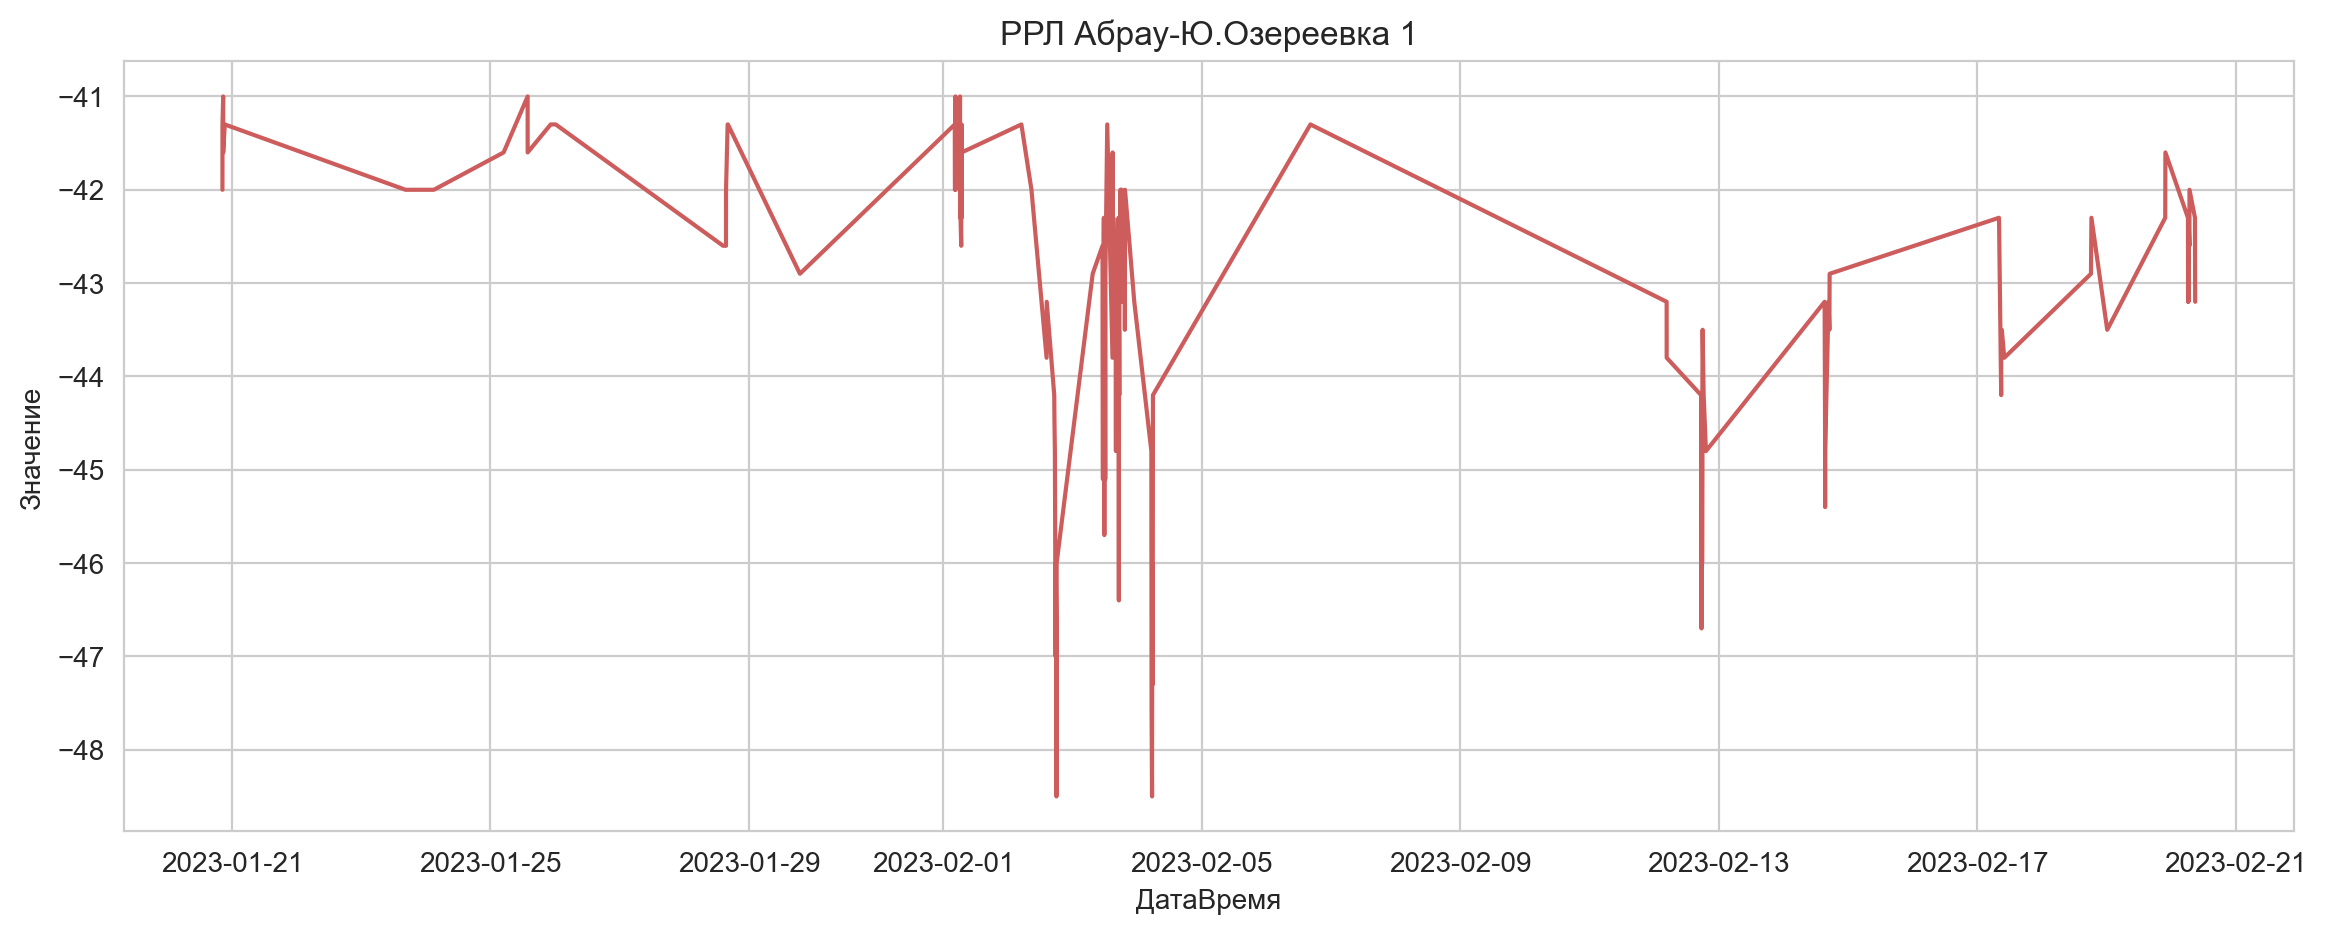

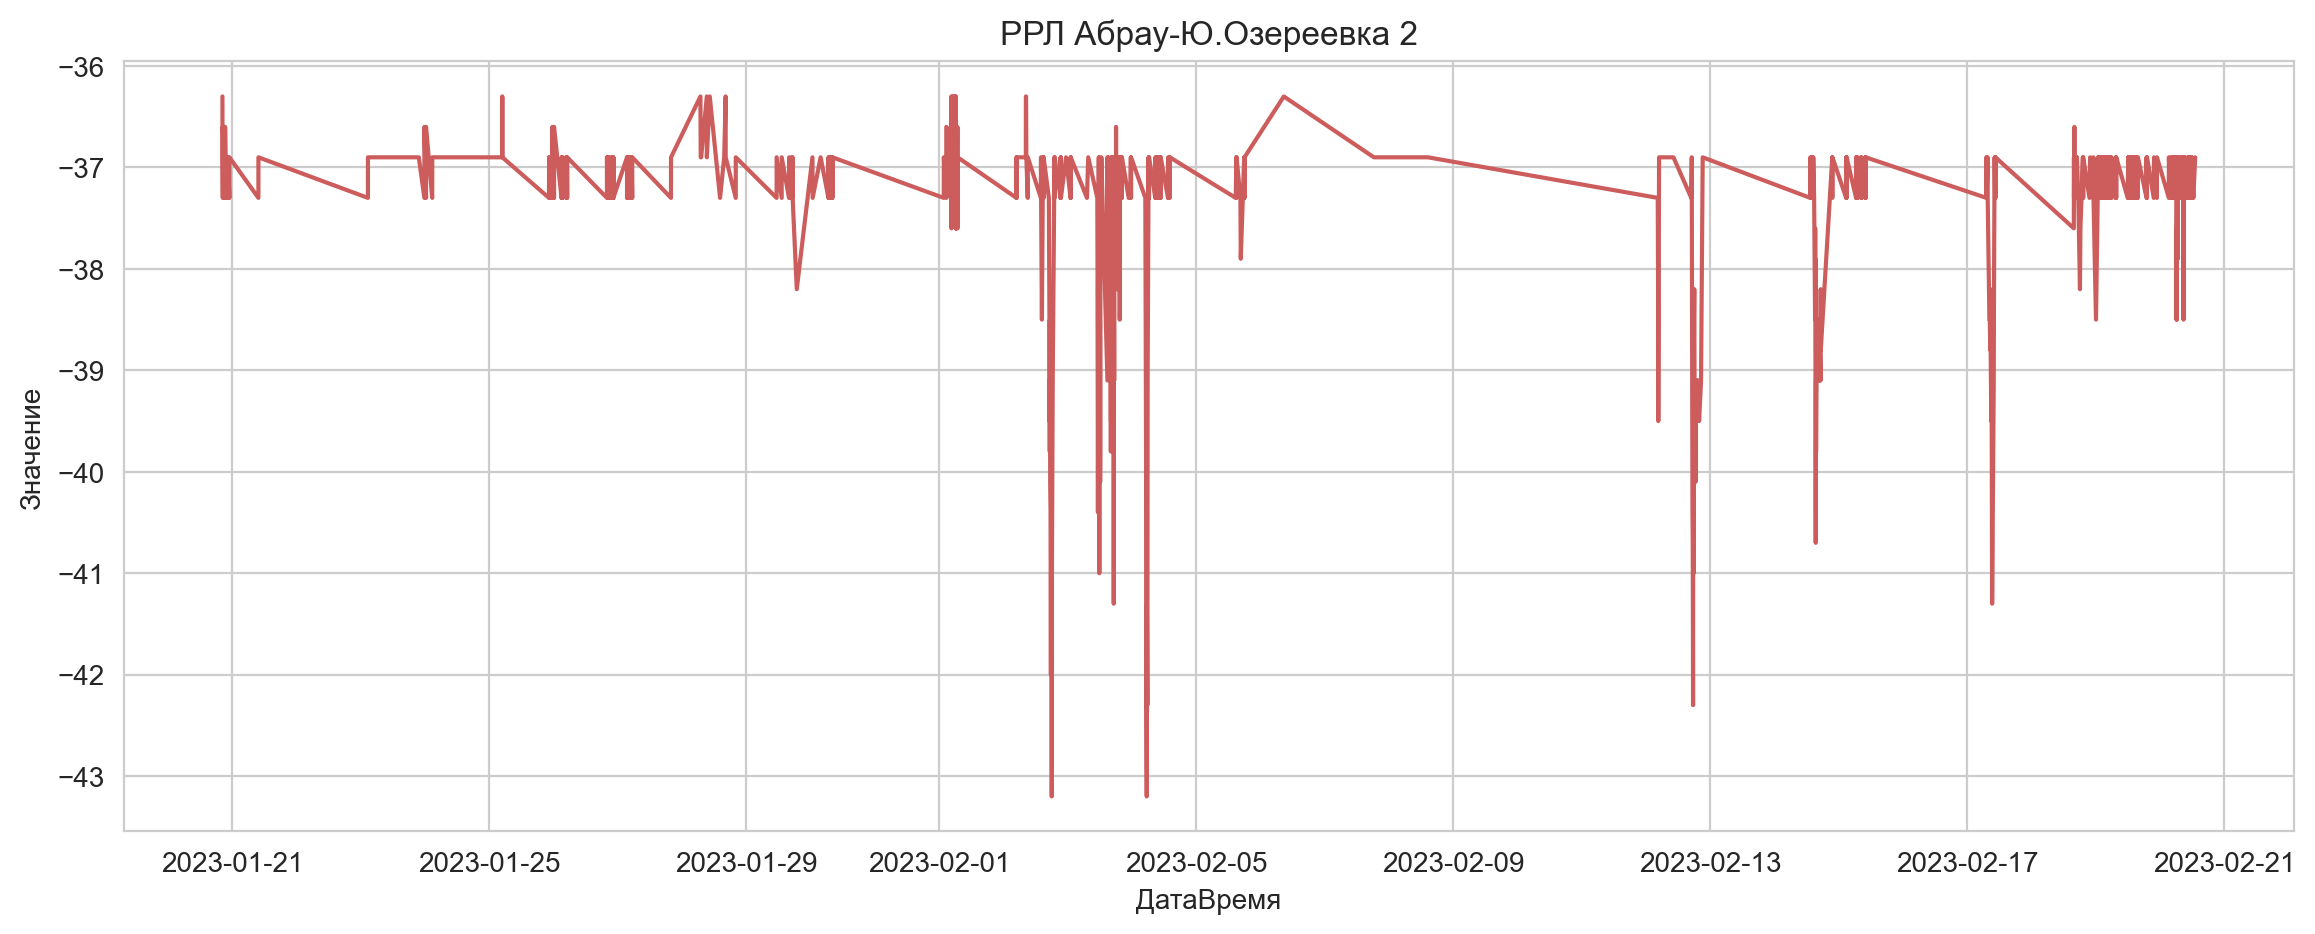

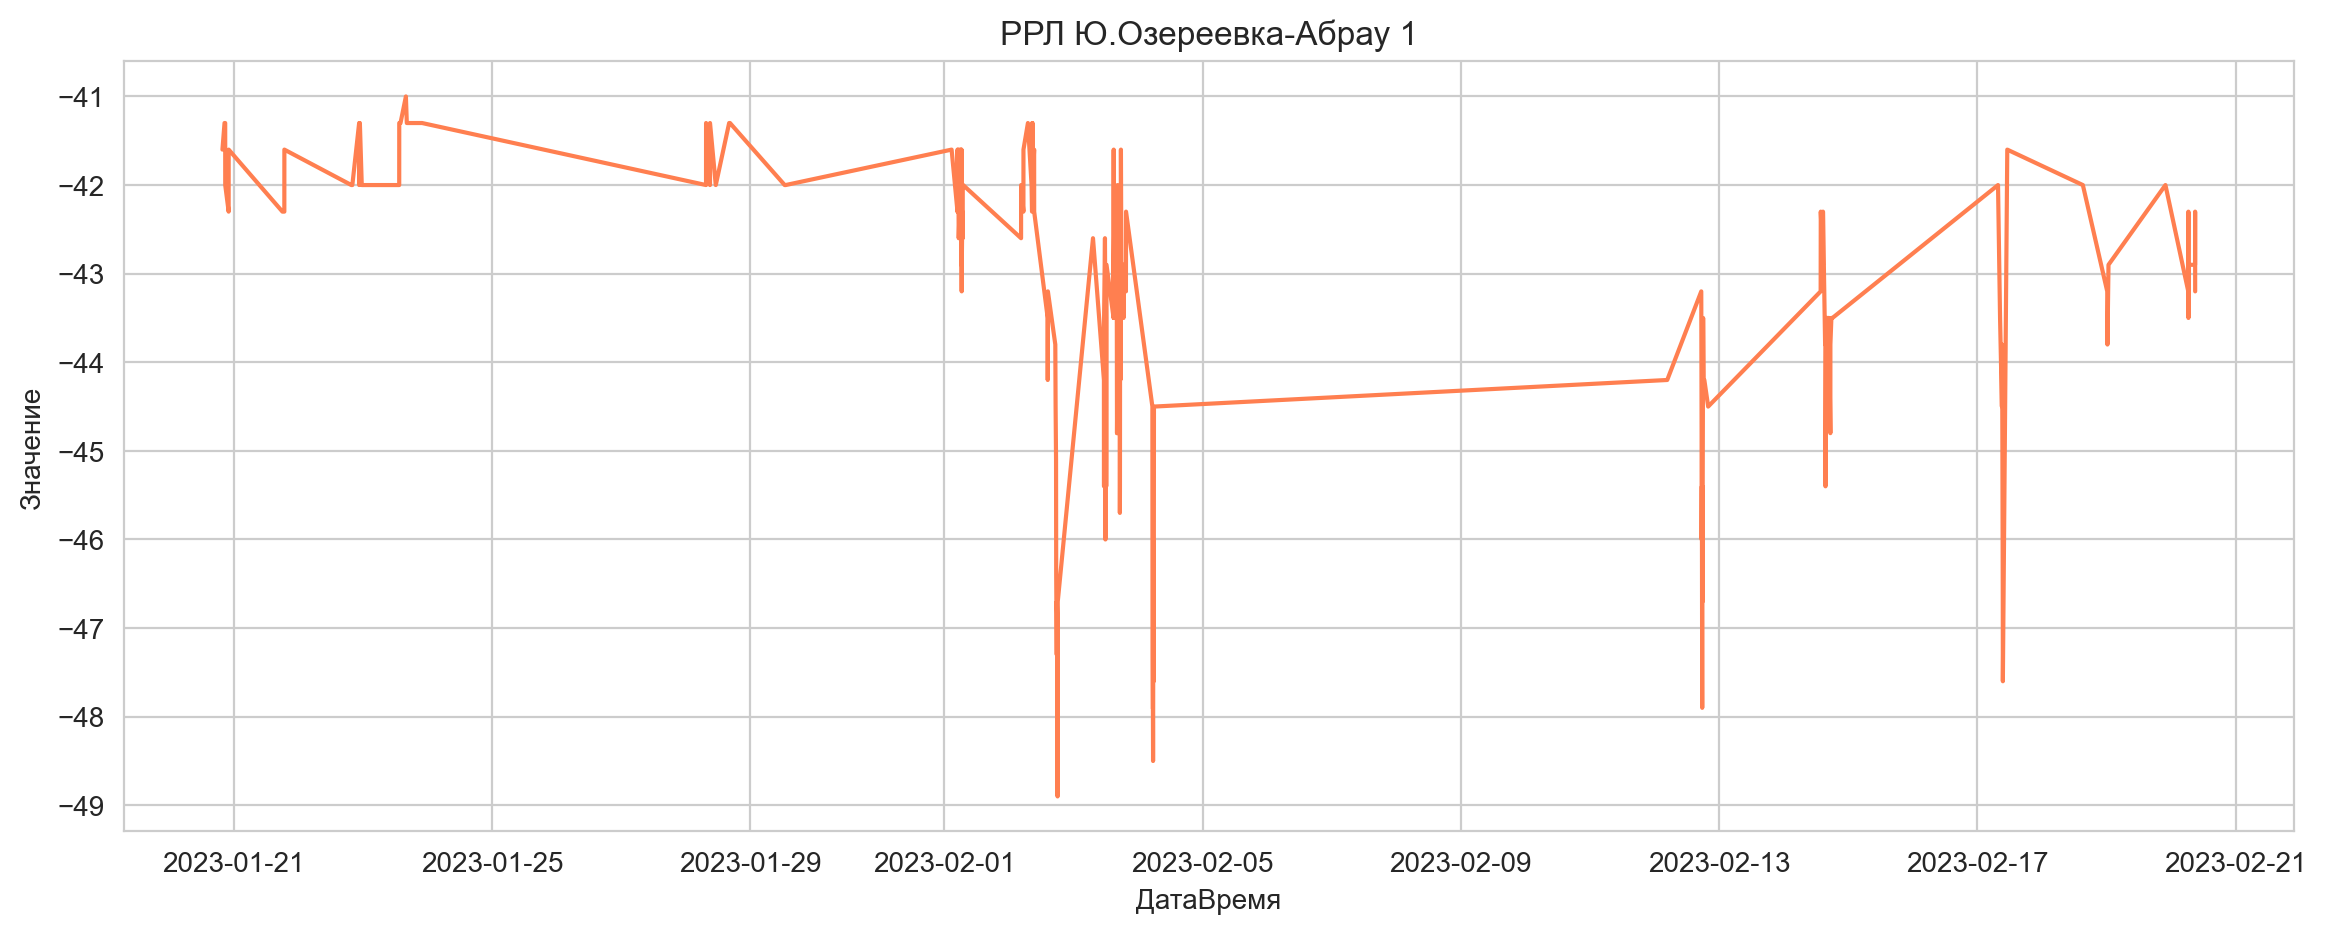

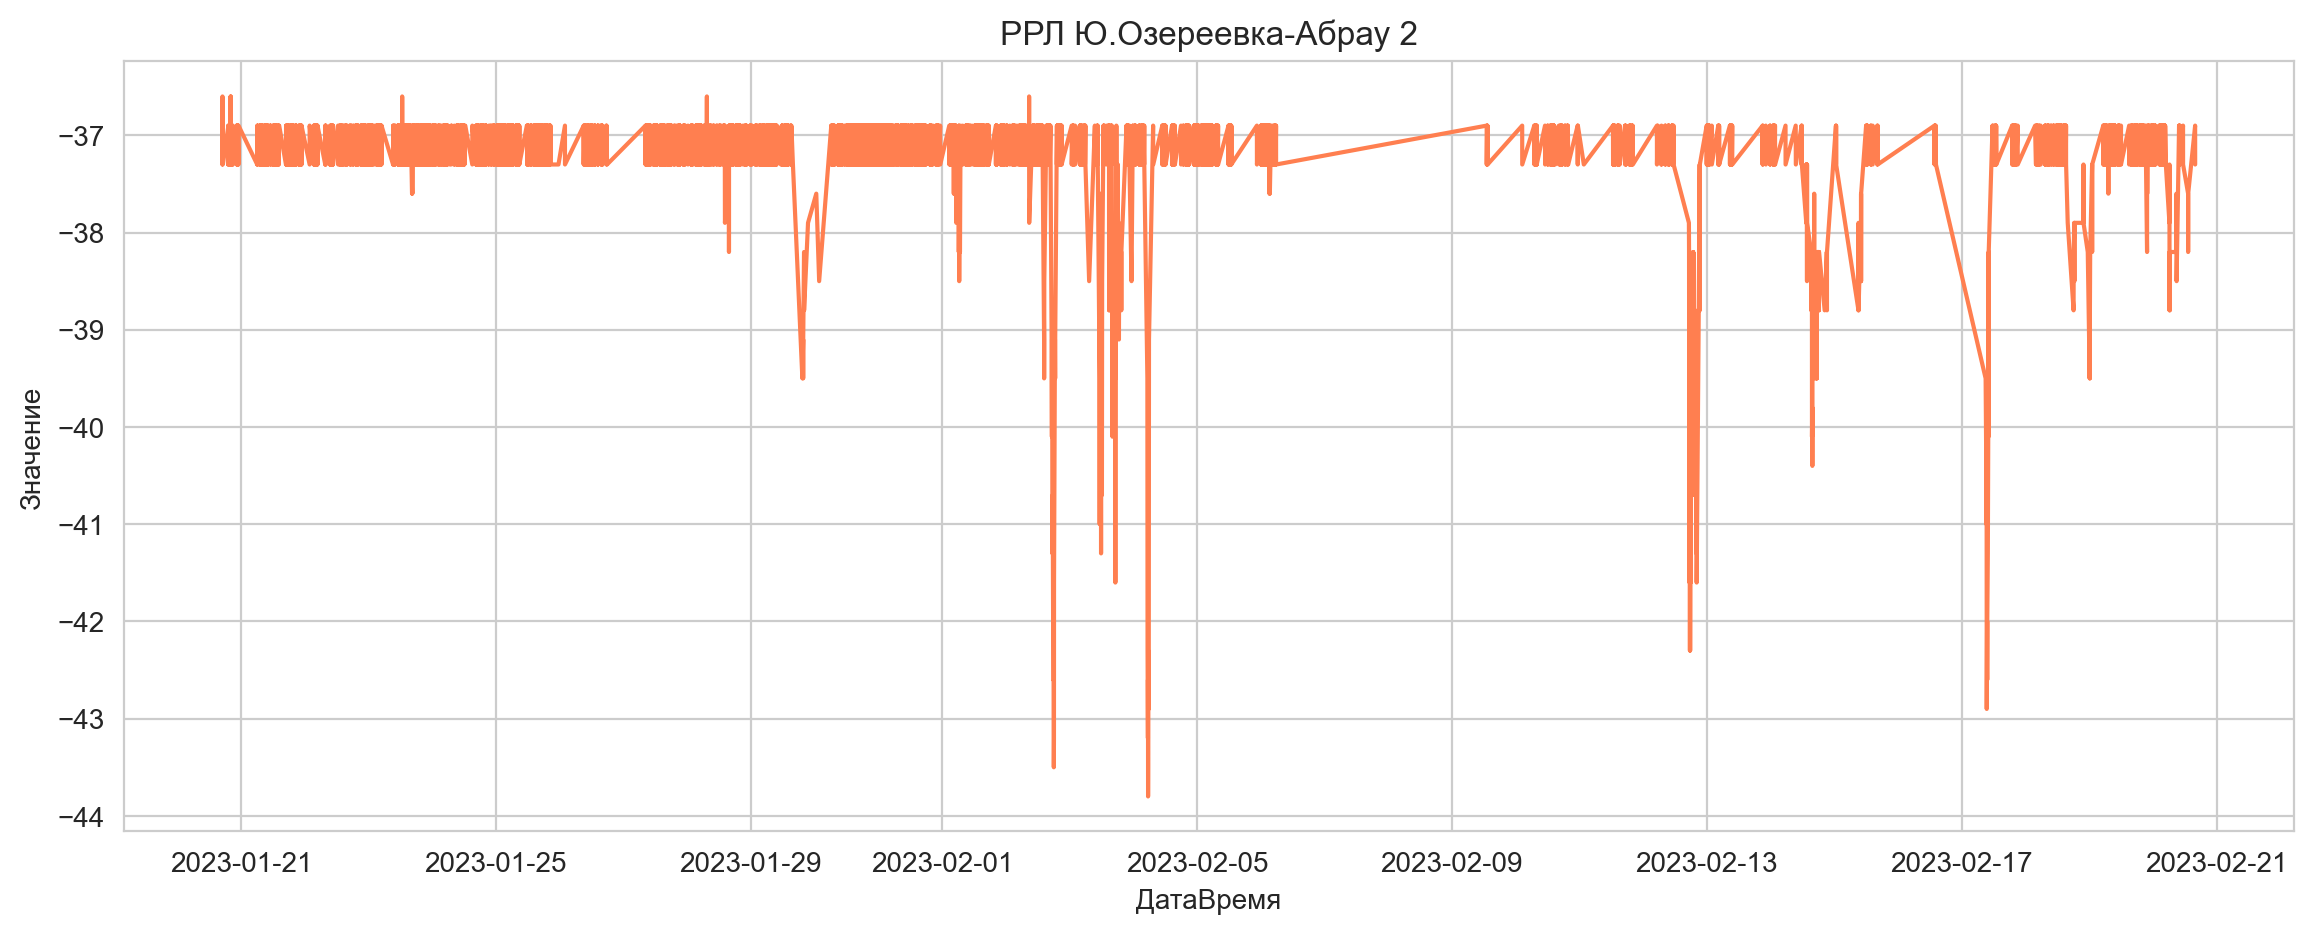

In [92]:
for i in range (0, len(spisok_df3)):
    get_plot1(spisok_df3,colors3,spisok_title3)


### Интервалы между записями в БД сигнала РРЛ между Абрау и Ю.Озереевка.

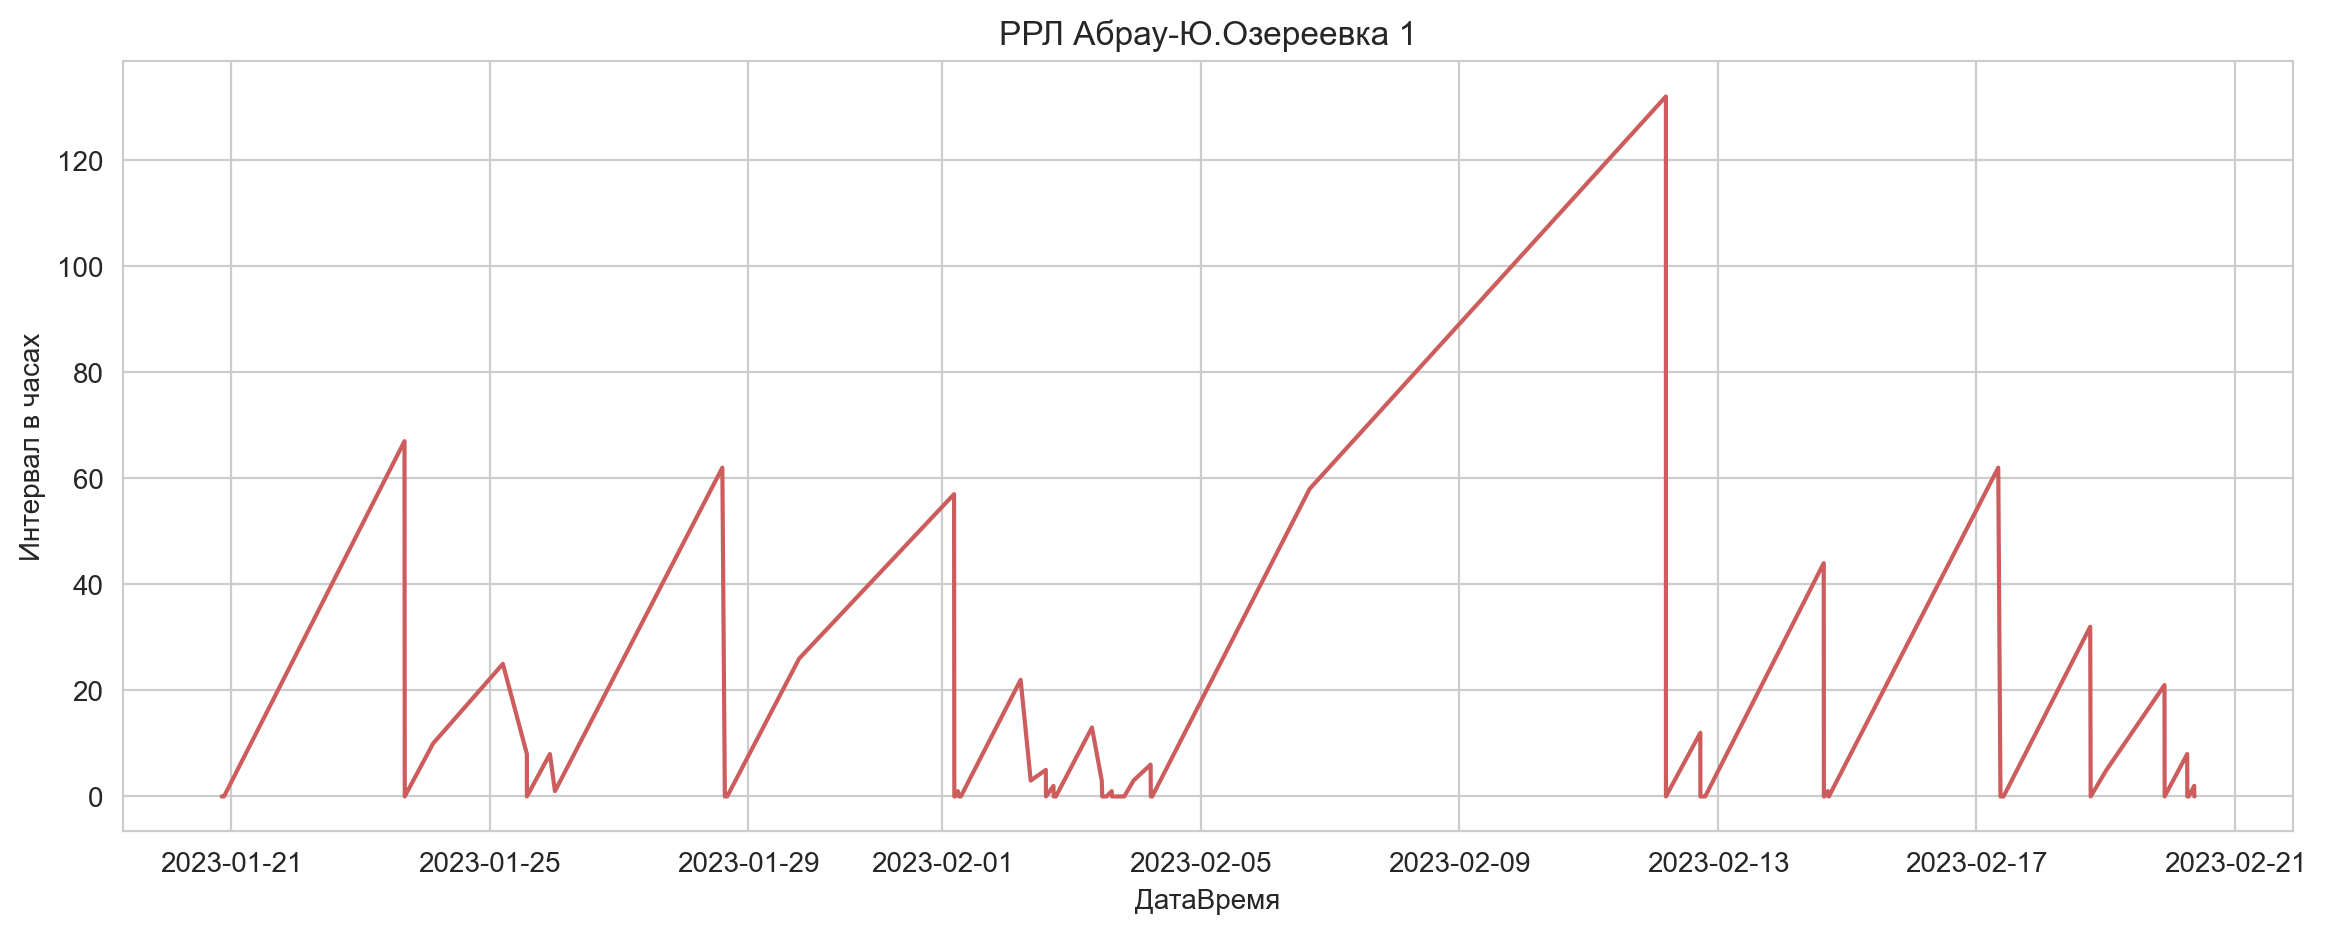

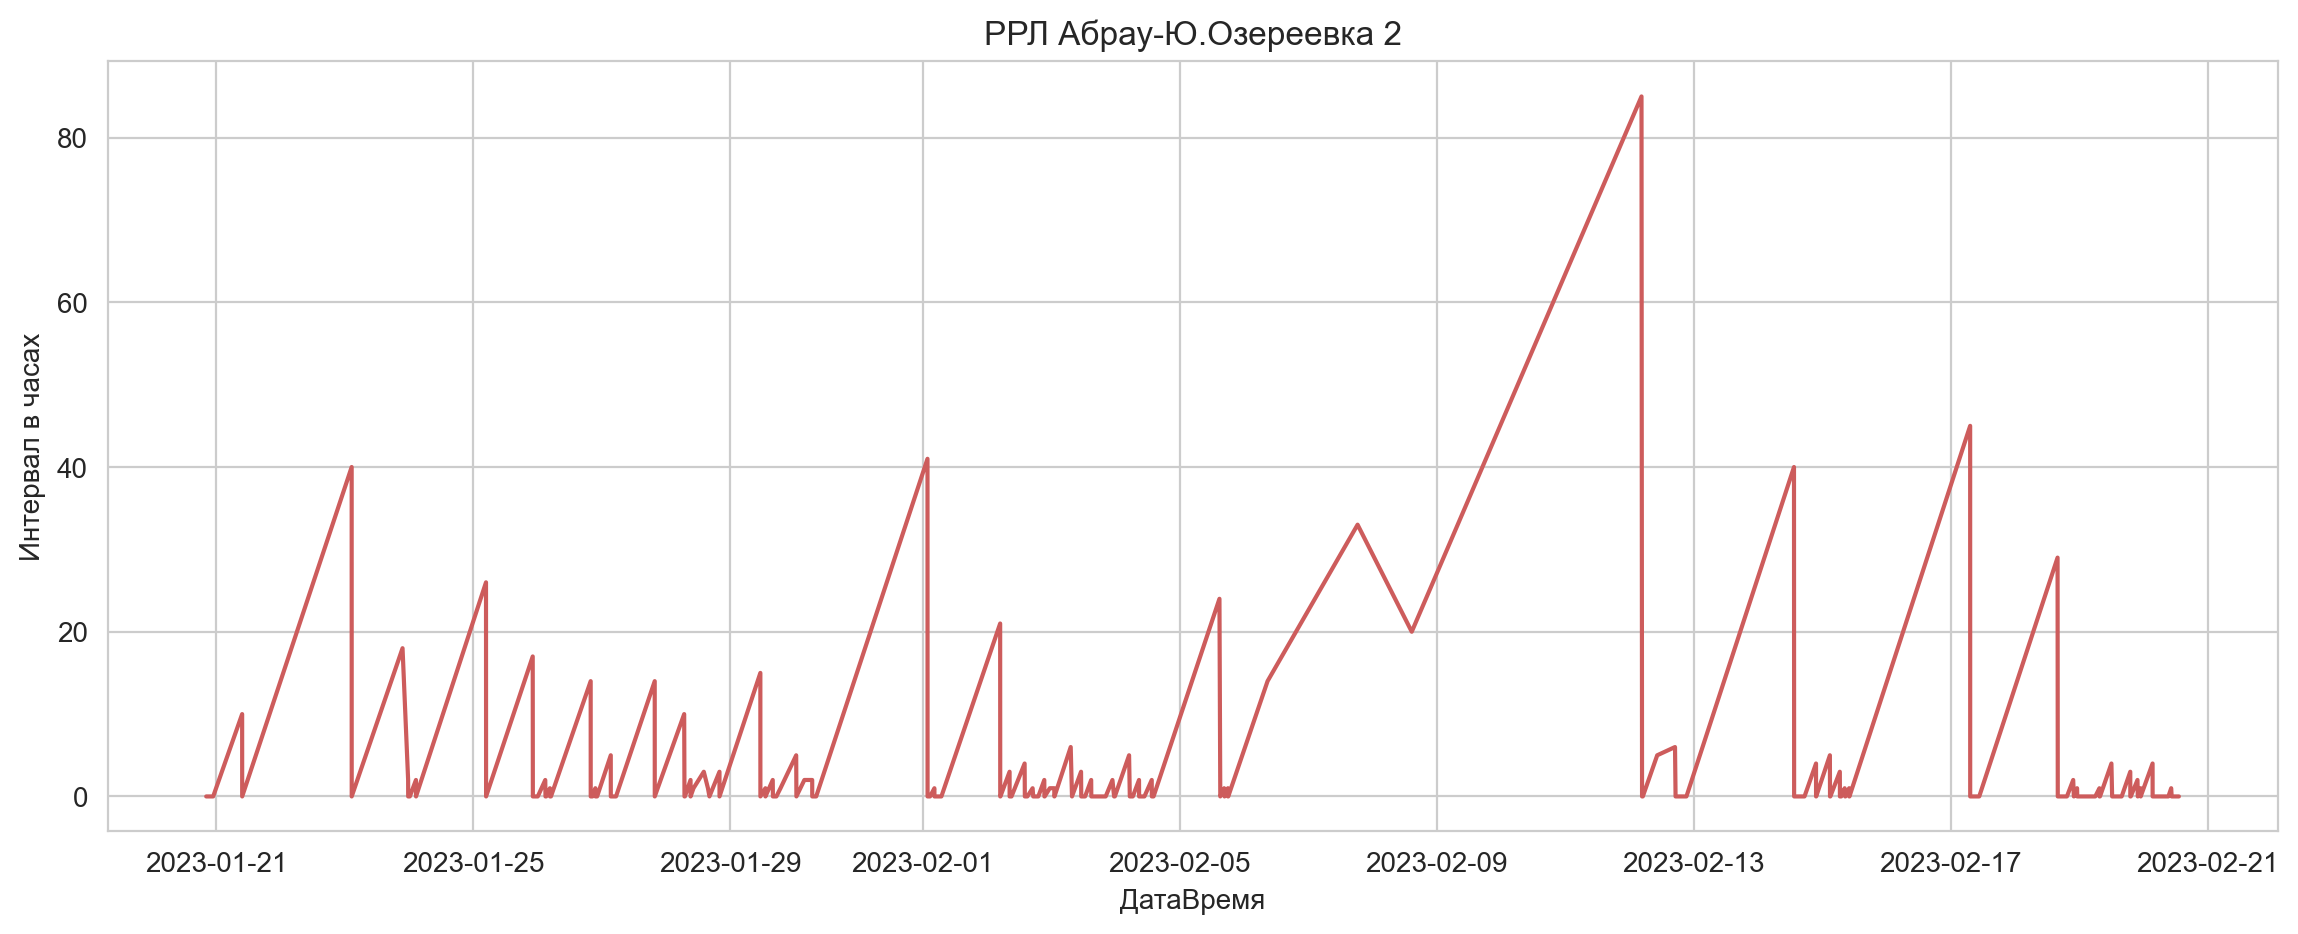

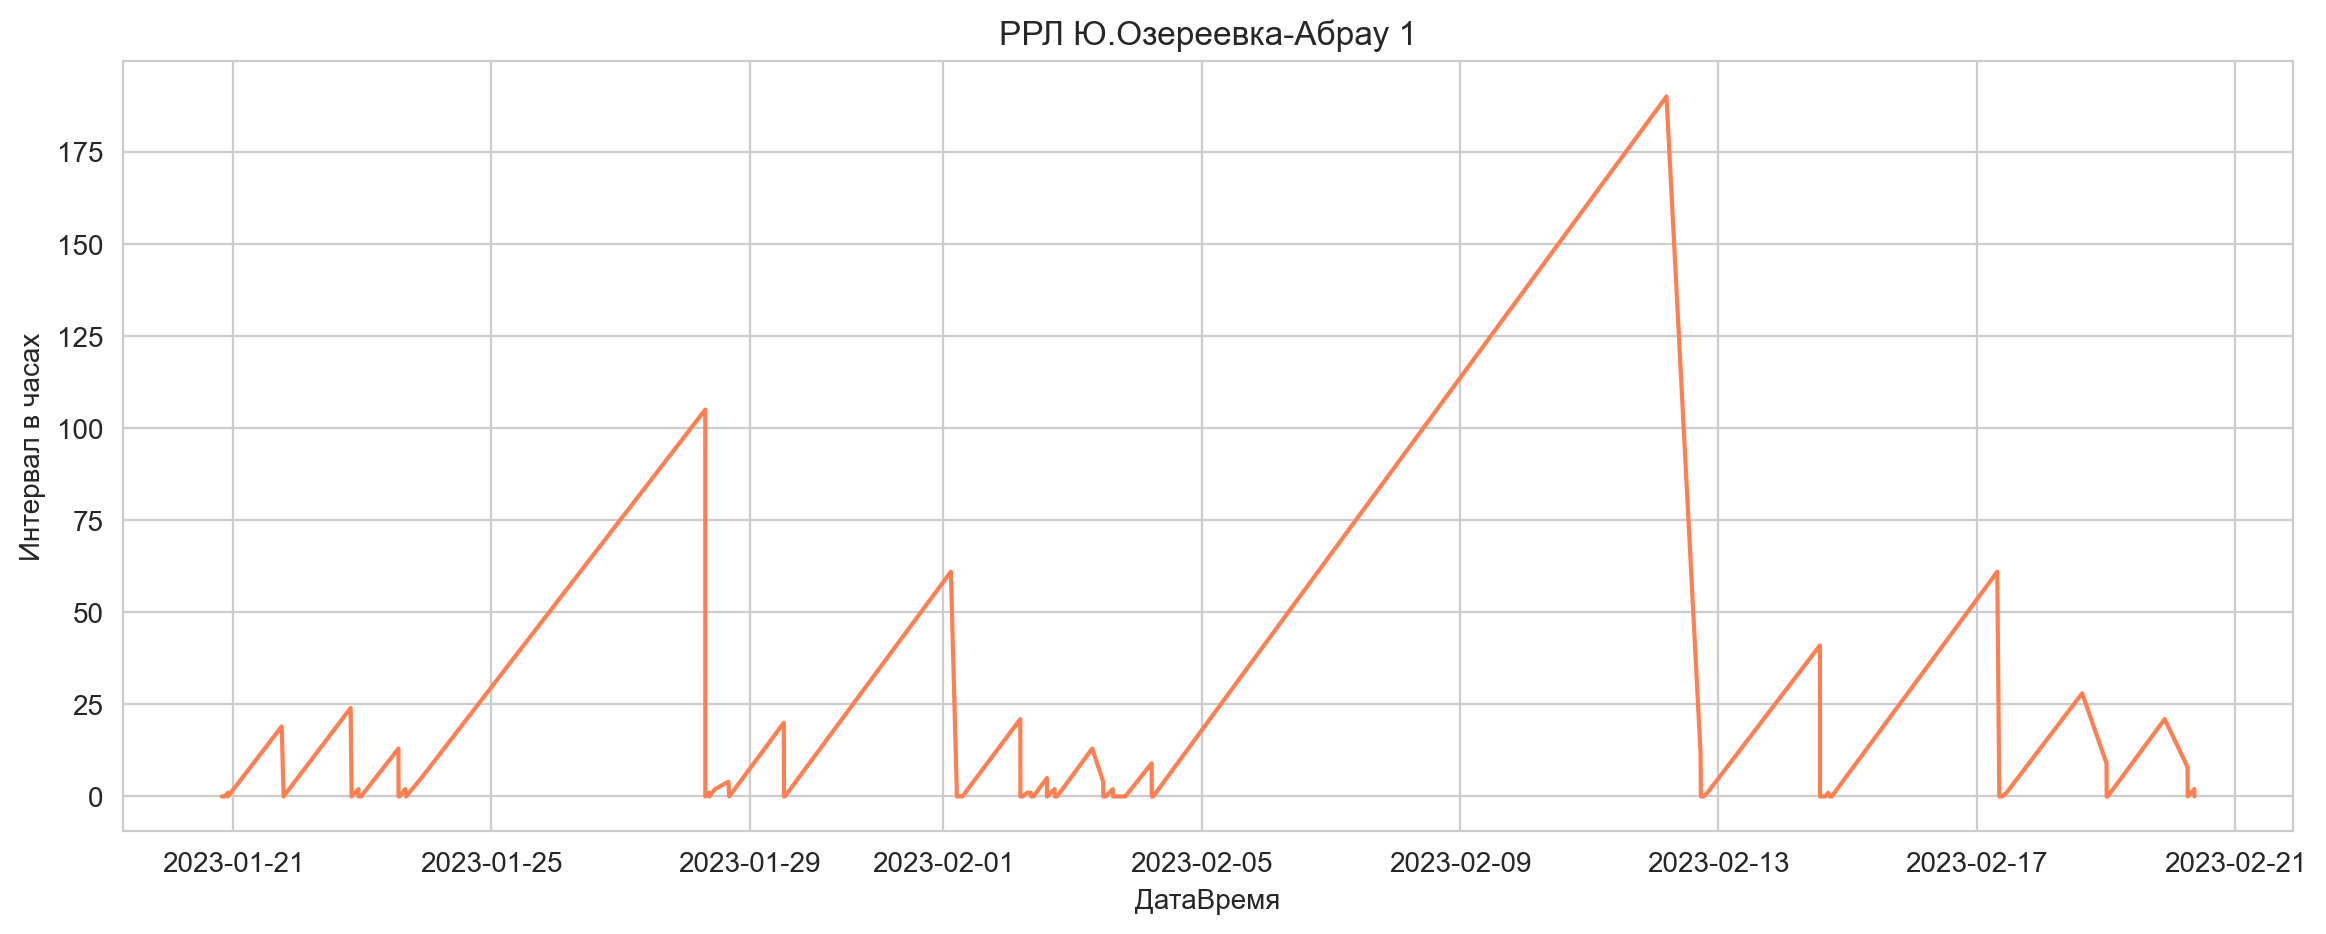

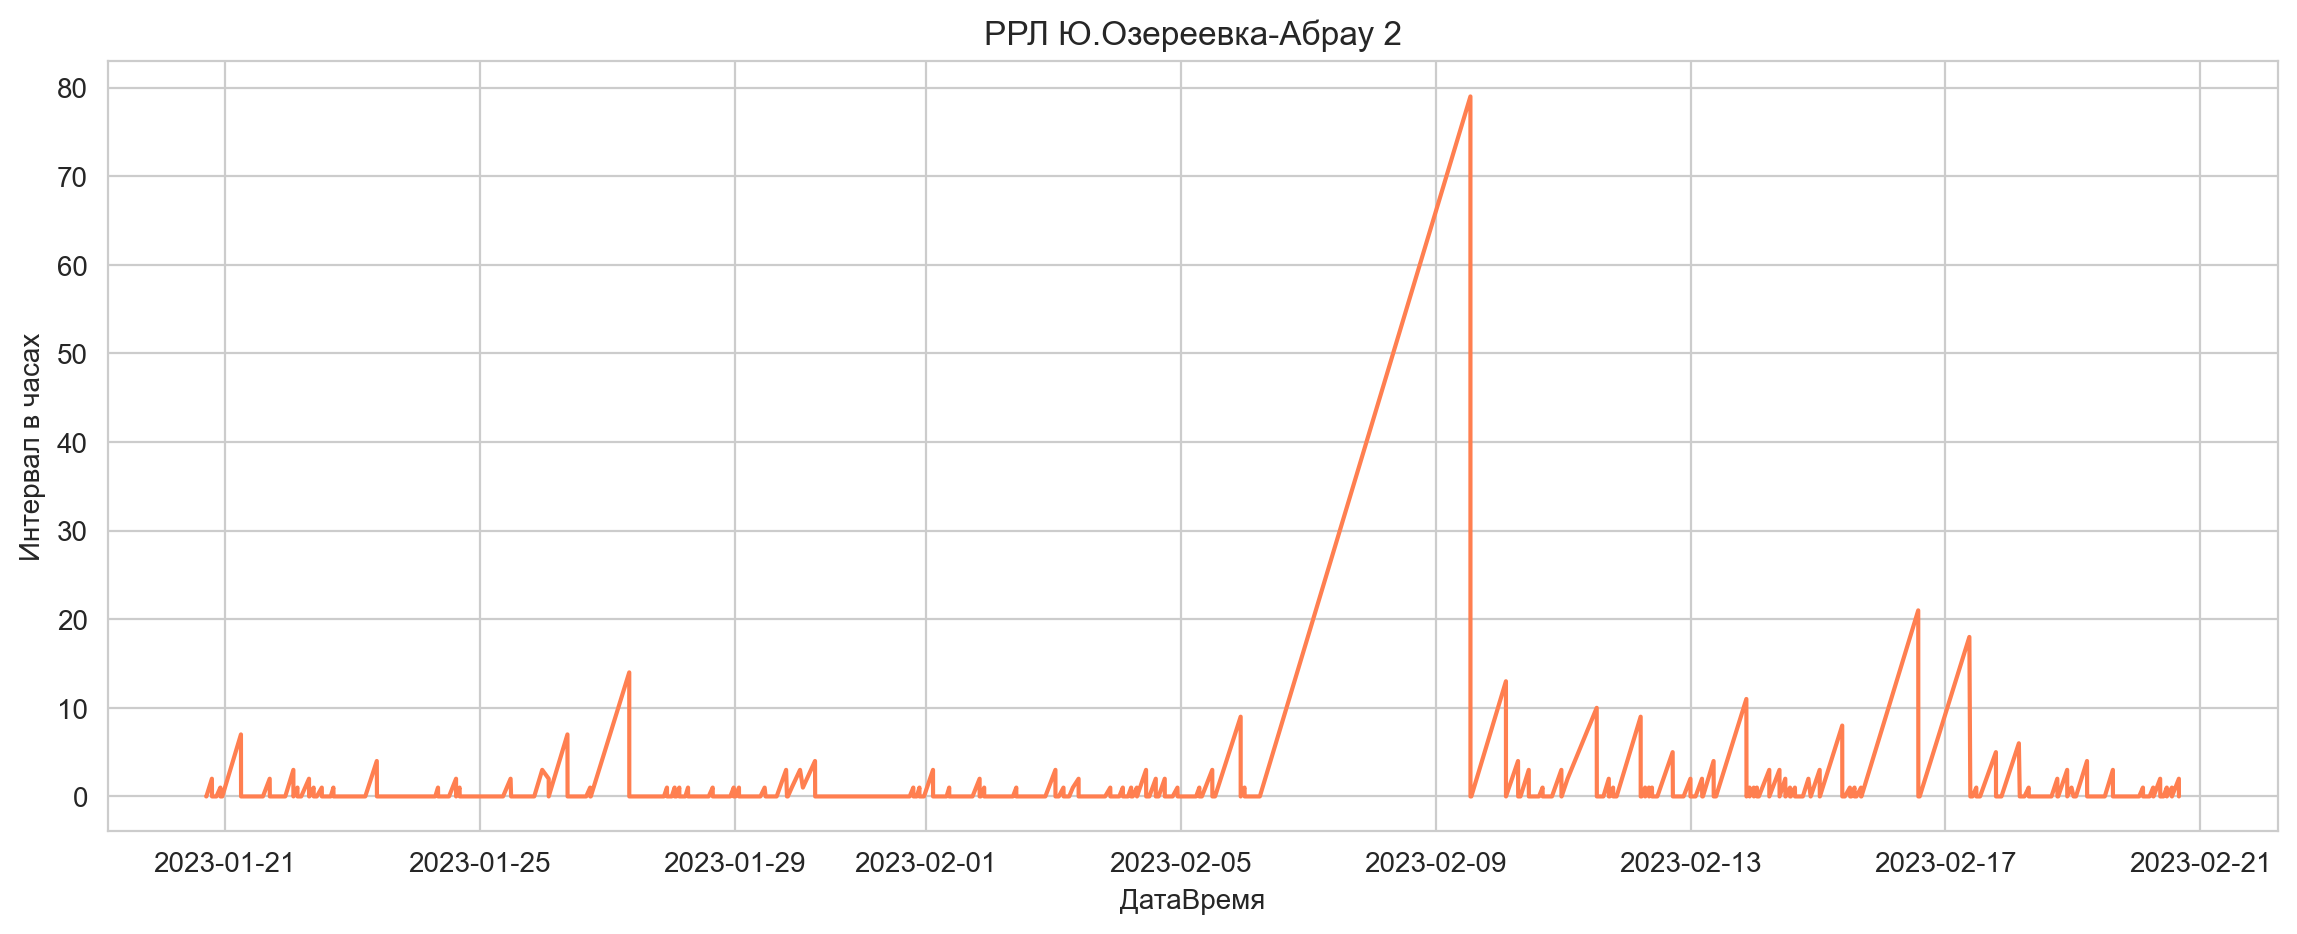

In [93]:
for i in range (0, len(spisok_df3)):
    get_plot1_int(spisok_df3,colors3,spisok_title3)
